<a href="https://colab.research.google.com/github/kluless13/corallive/blob/test/SAMyolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# !pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/166.8 GB disk)


In [1]:
!nvidia-smi

Thu Jan 18 06:00:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
# !mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2dnFoL2vjwfFBNkIUxLZ")
project = rf.workspace("lini-foundation").project("lini-coral-forms-3.0")
dataset = project.version(10).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to LINI-Coral-Forms-3.0-10 in yolov8:: 100%|██████████| 470/470 [00:00<00:00, 3311.53it/s]


In [6]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=35 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.1.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/LINI-Coral-Forms-3.0-10/data.yaml, epochs=35, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=Non

In [7]:
!ls {HOME}/runs/segment/train2/

args.yaml					    labels.jpg	      train_batch275.jpg
BoxF1_curve.png					    MaskF1_curve.png  train_batch276.jpg
BoxP_curve.png					    MaskP_curve.png   train_batch277.jpg
BoxPR_curve.png					    MaskPR_curve.png  train_batch2.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       val_batch1_labels.jpg
events.out.tfevents.1705557764.e54d52ffd17f.4727.0  train_batch0.jpg  val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg  weights


/content


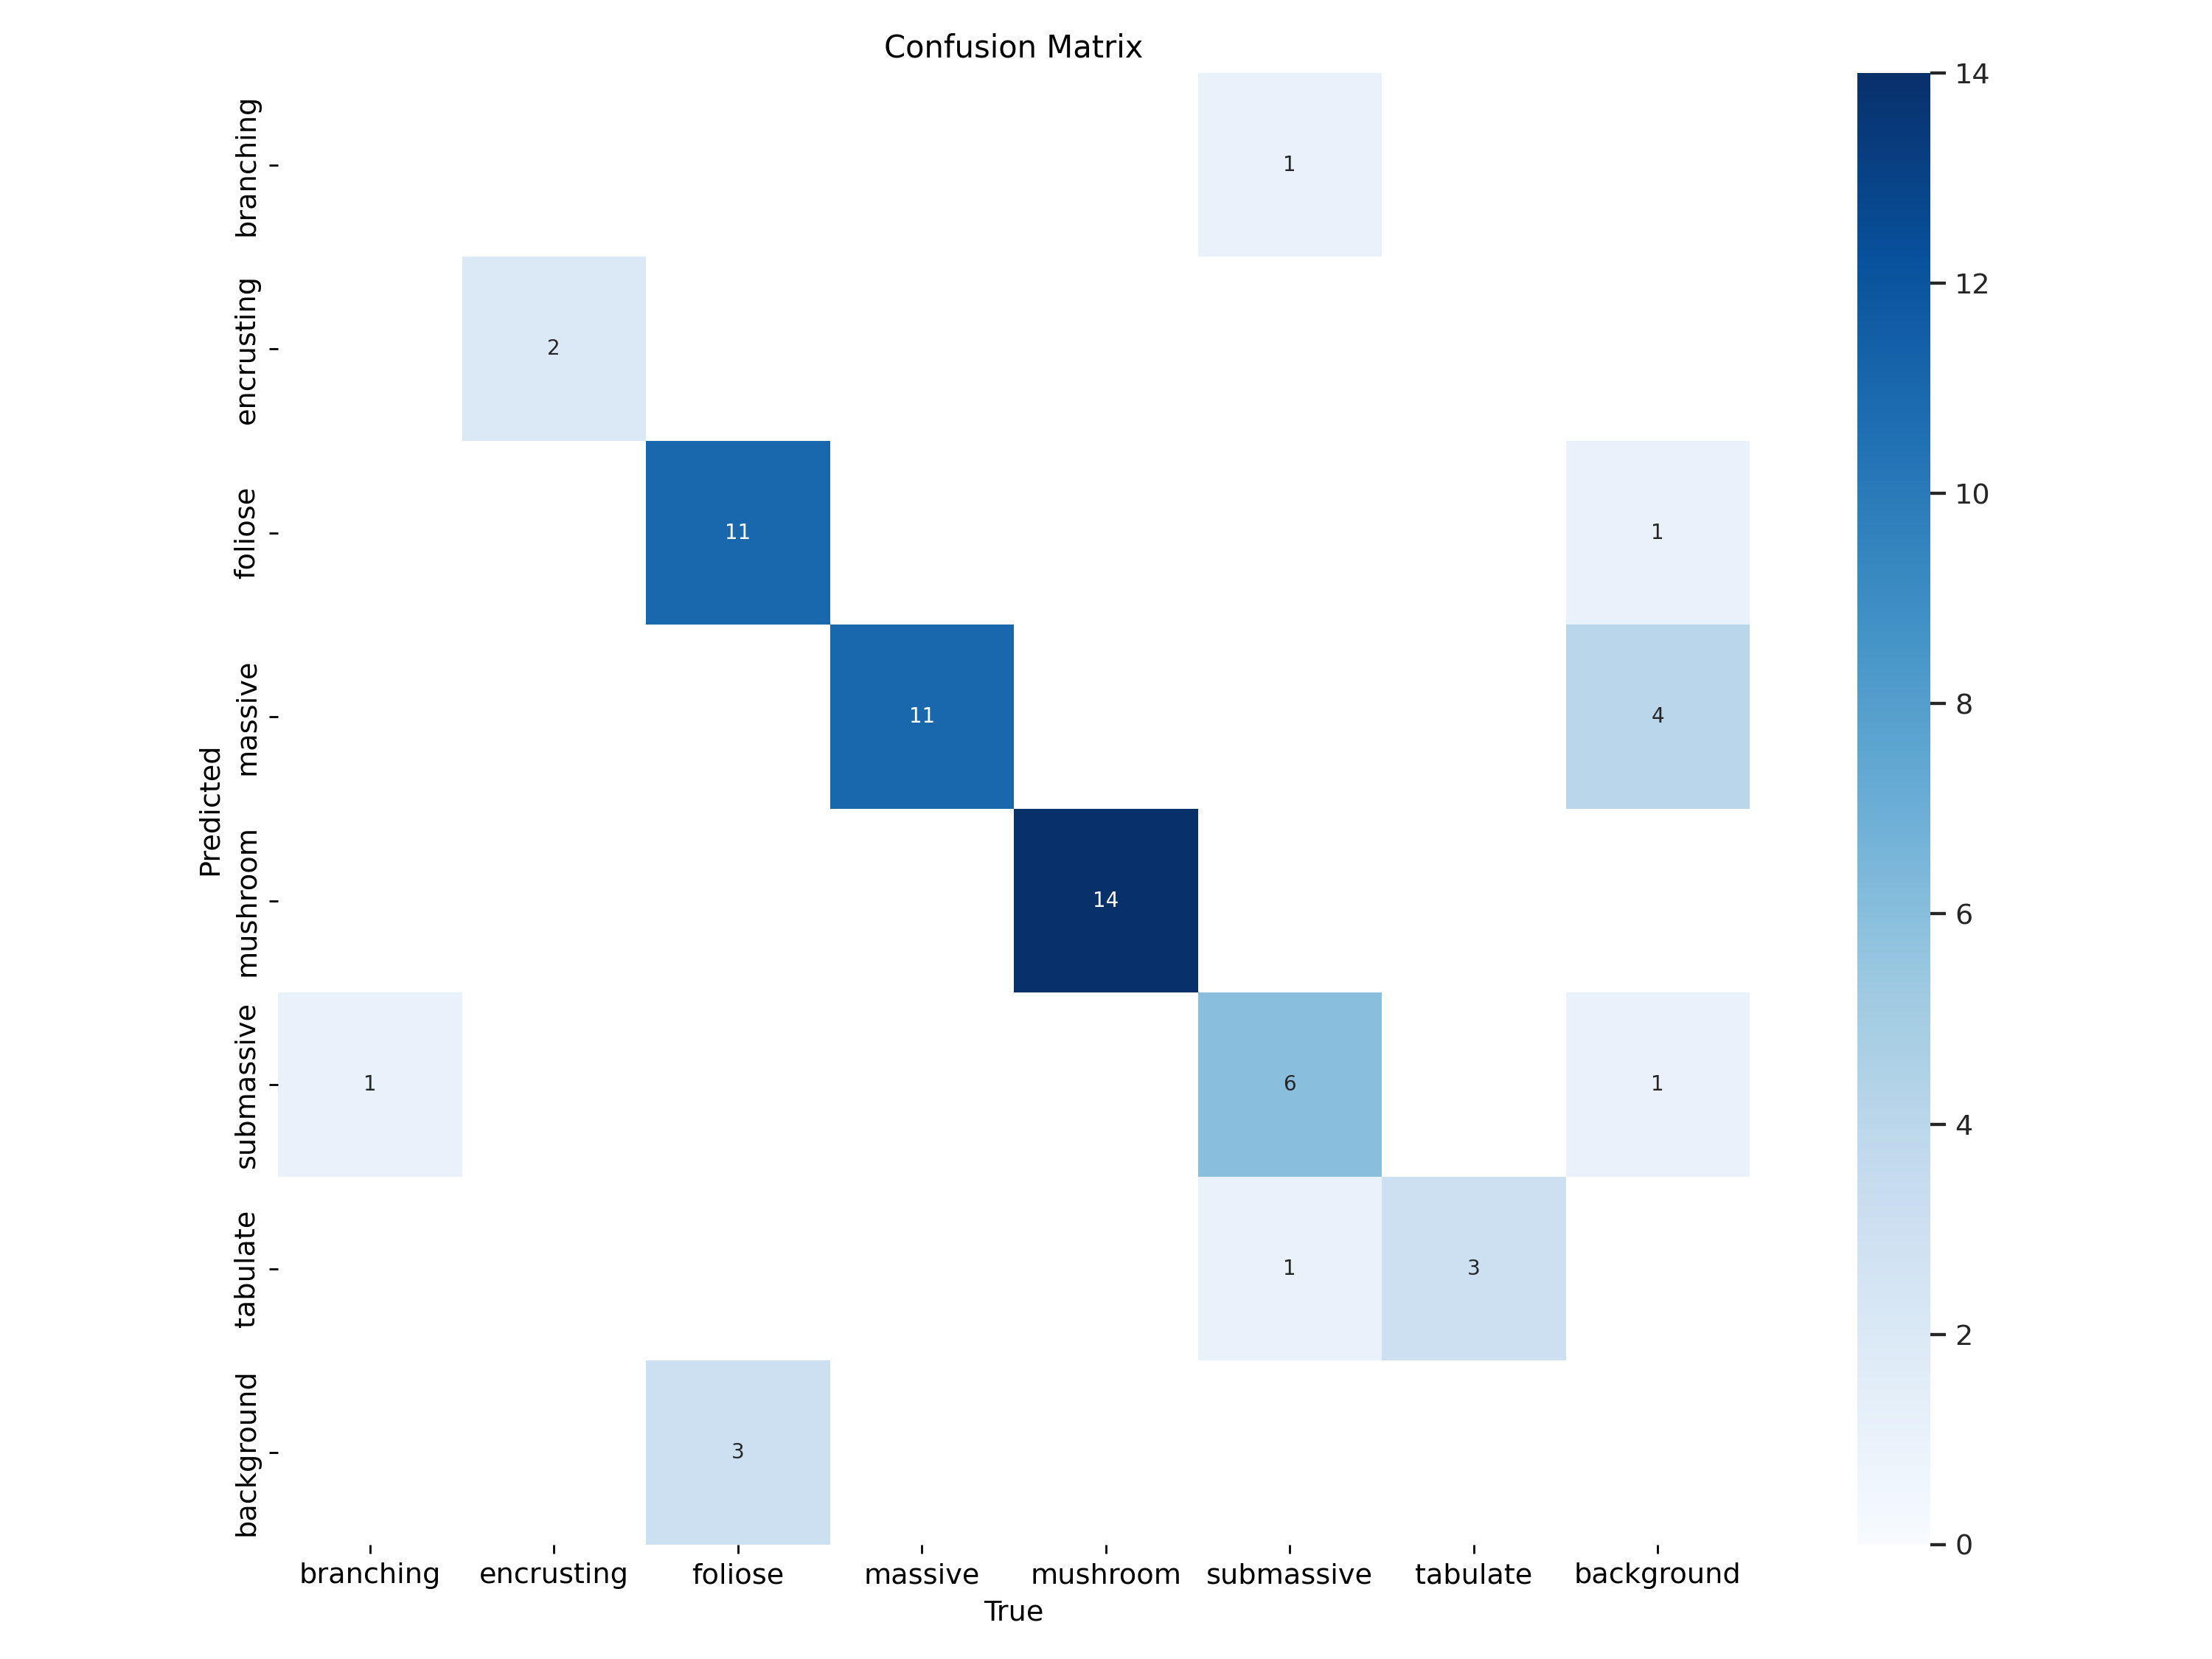

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

/content


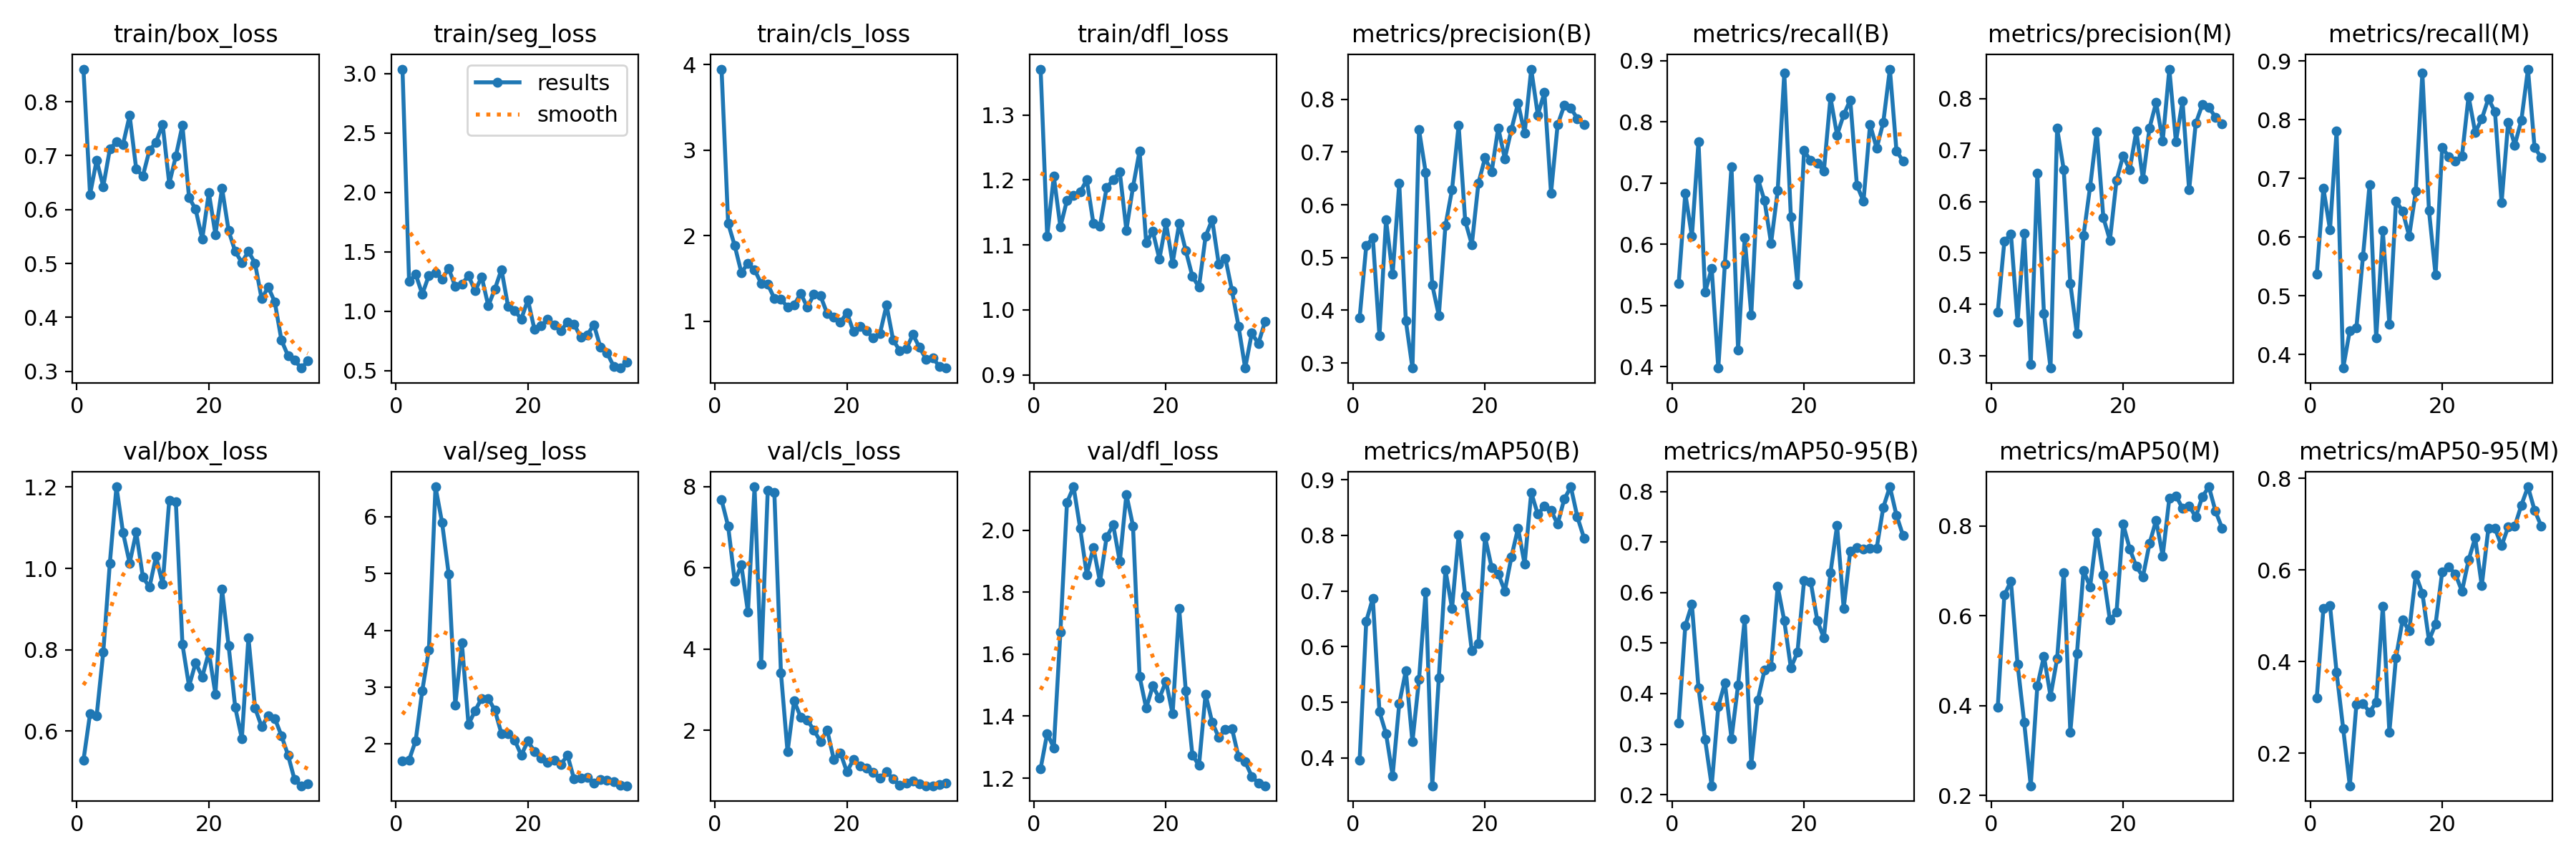

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=600)

/content


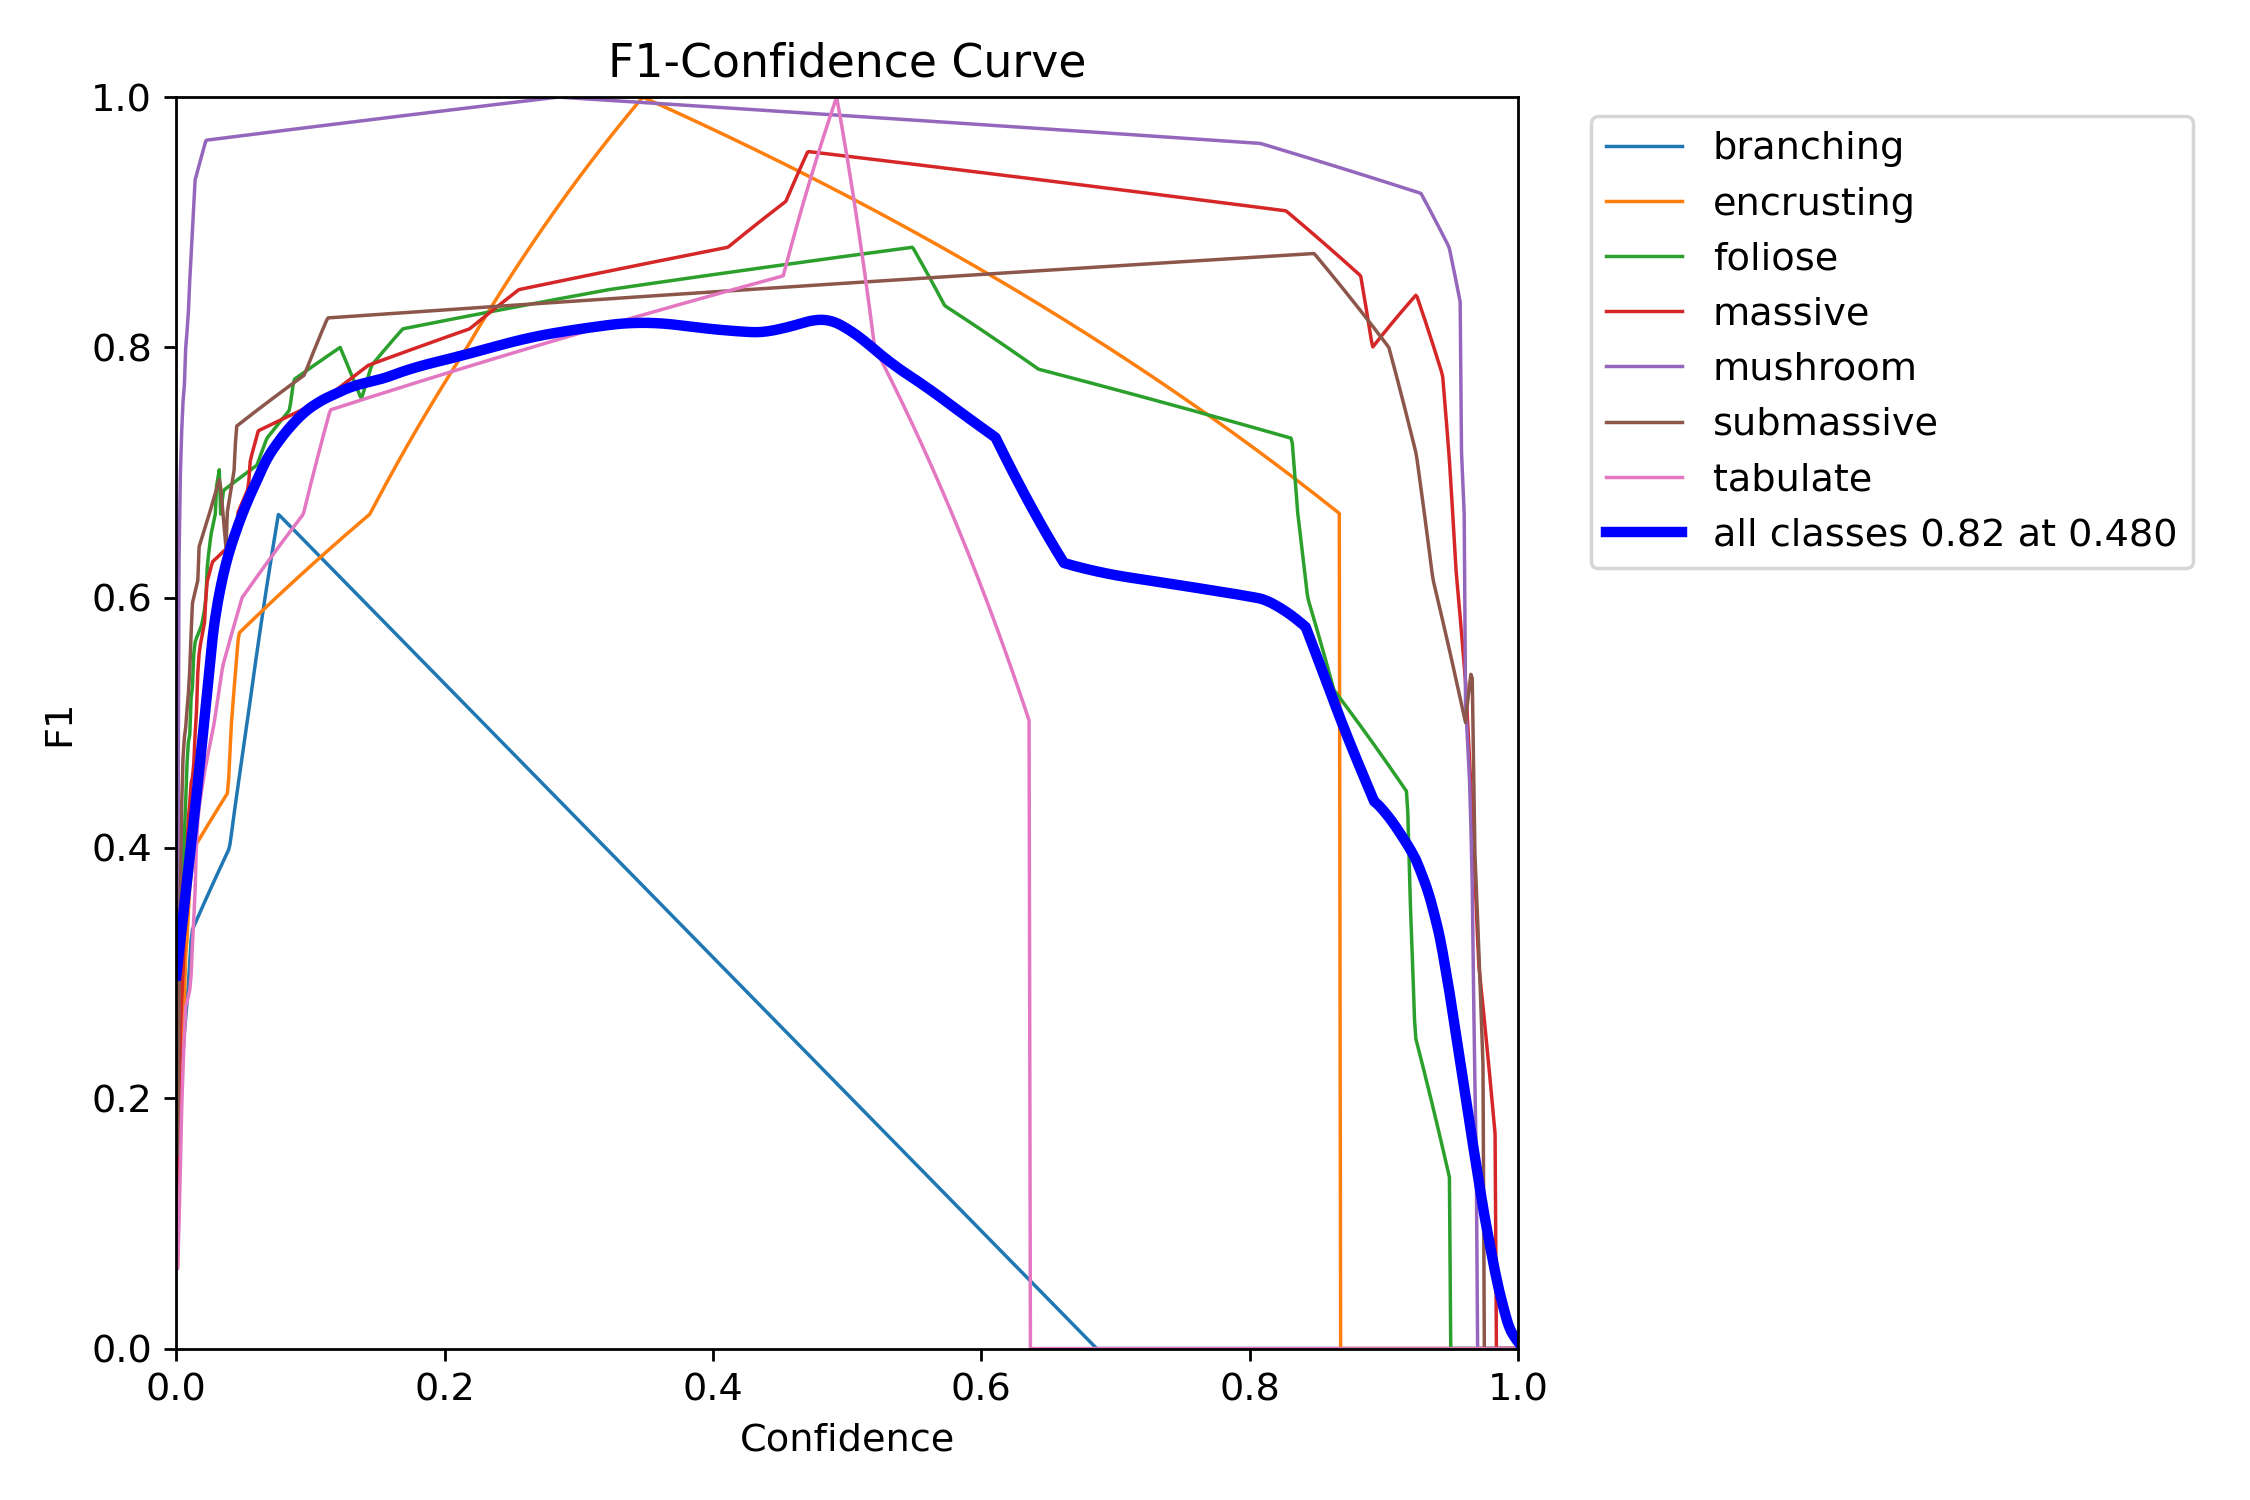

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/MaskF1_curve.png', width=600)

/content


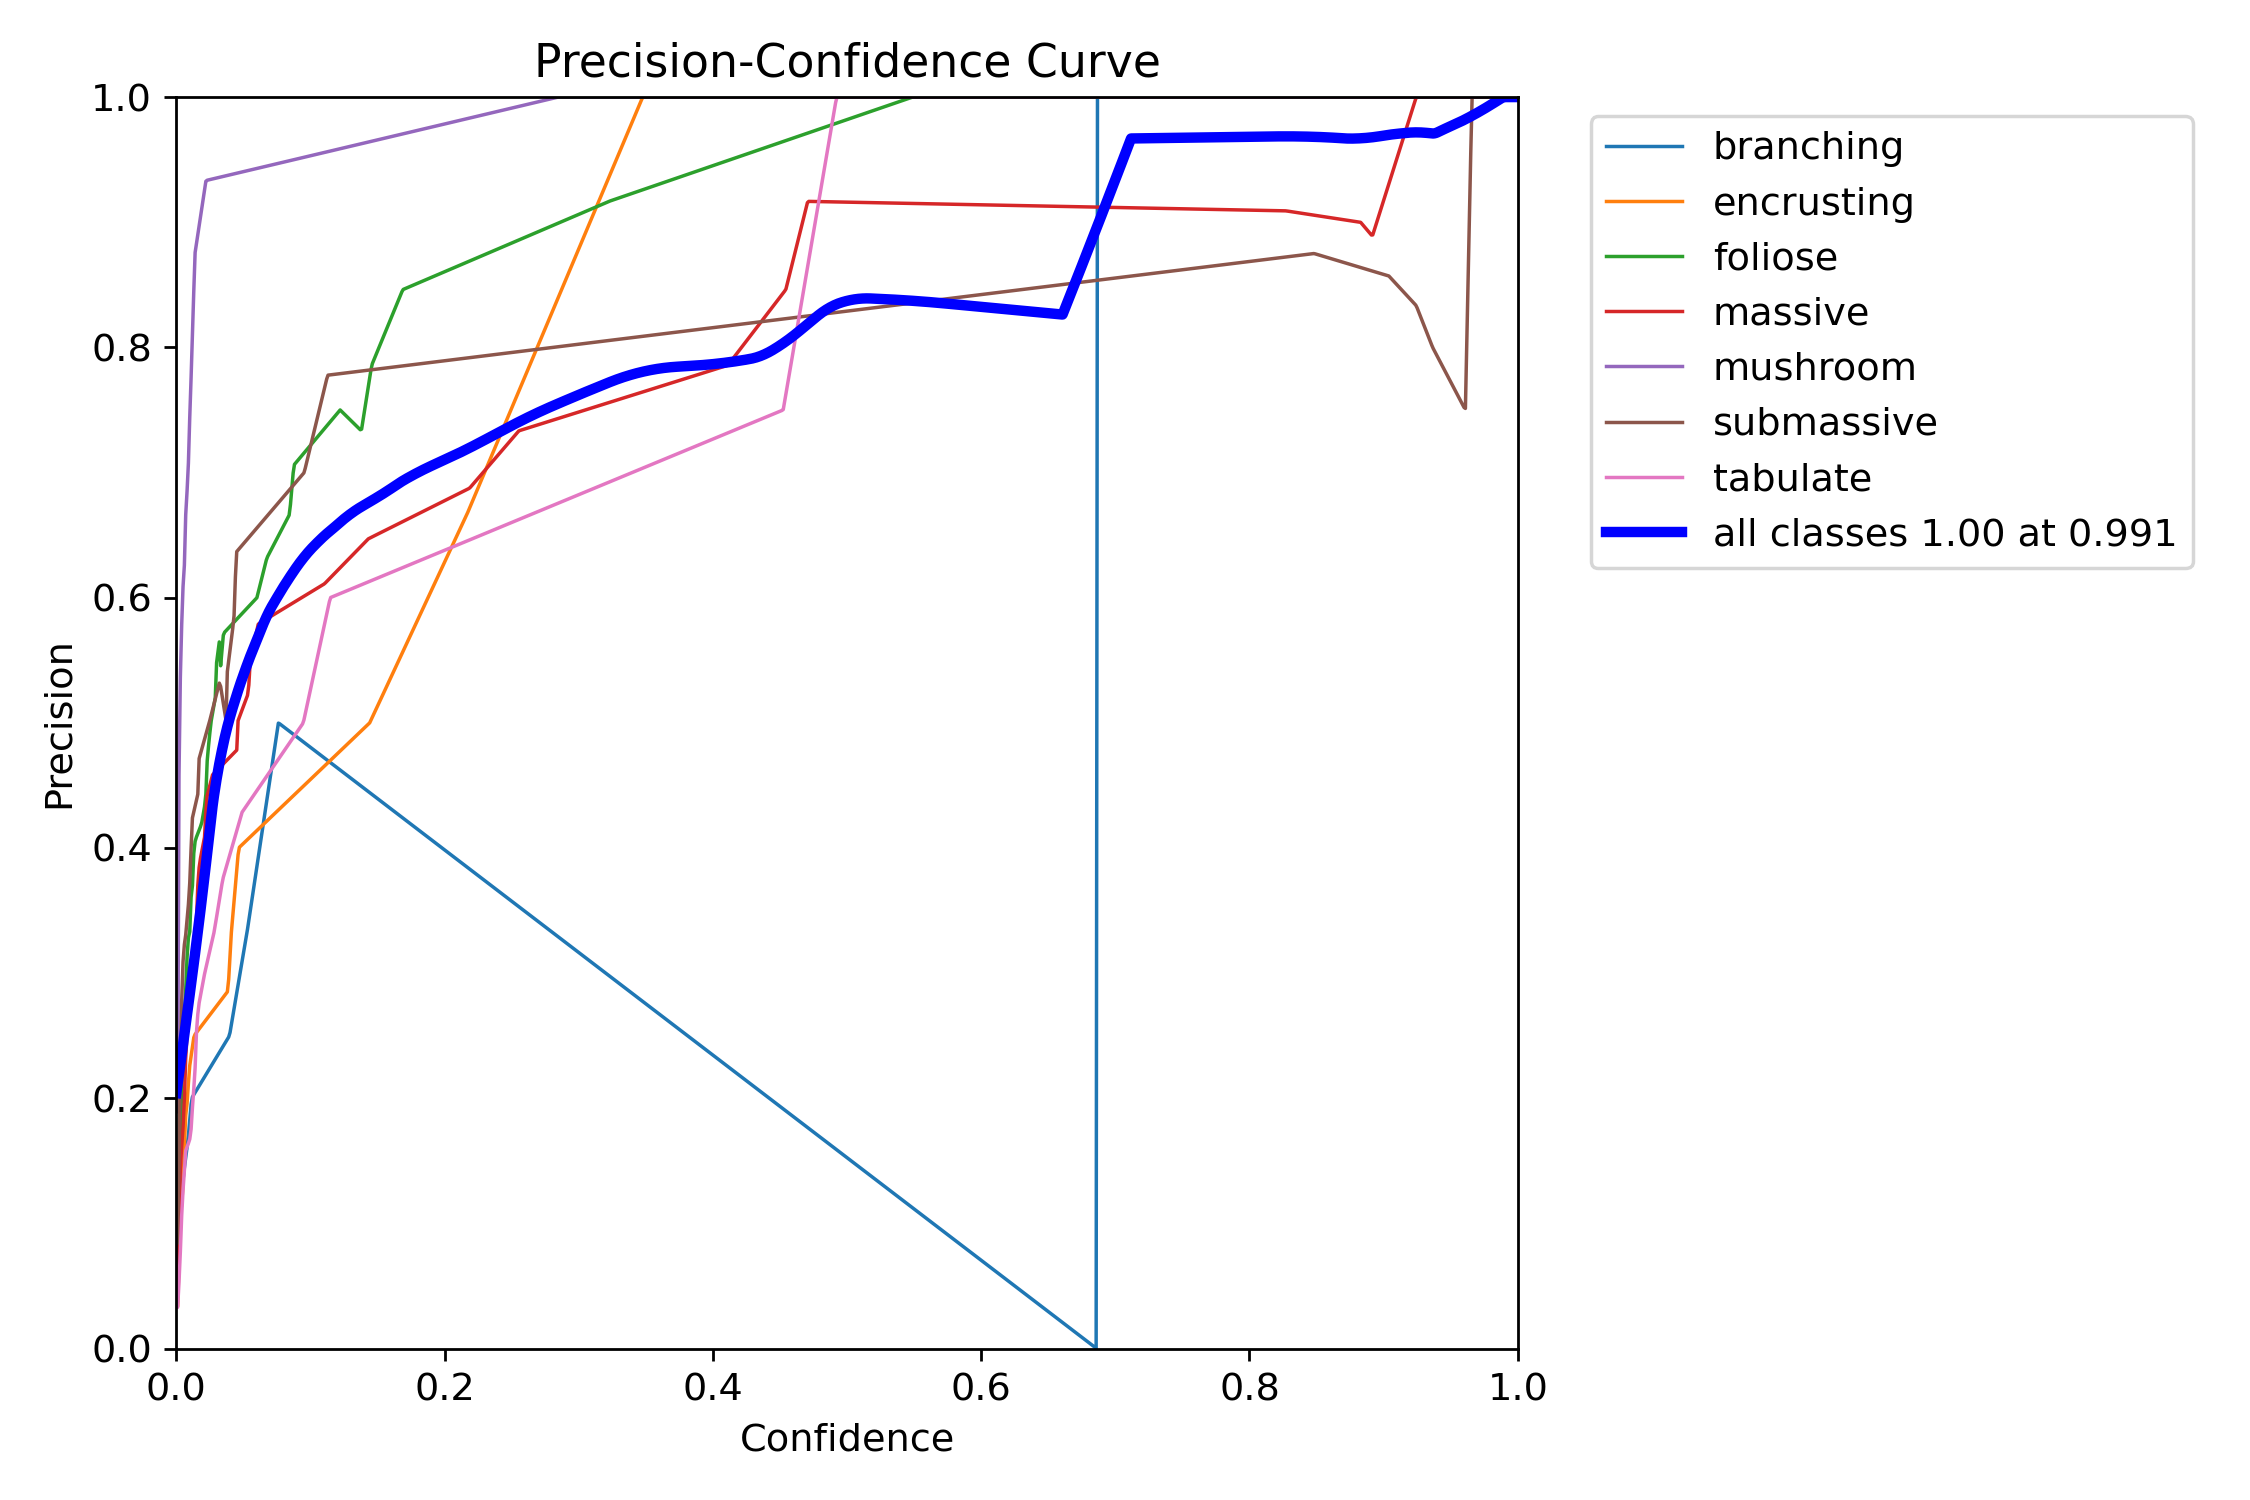

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/MaskP_curve.png', width=600)

/content


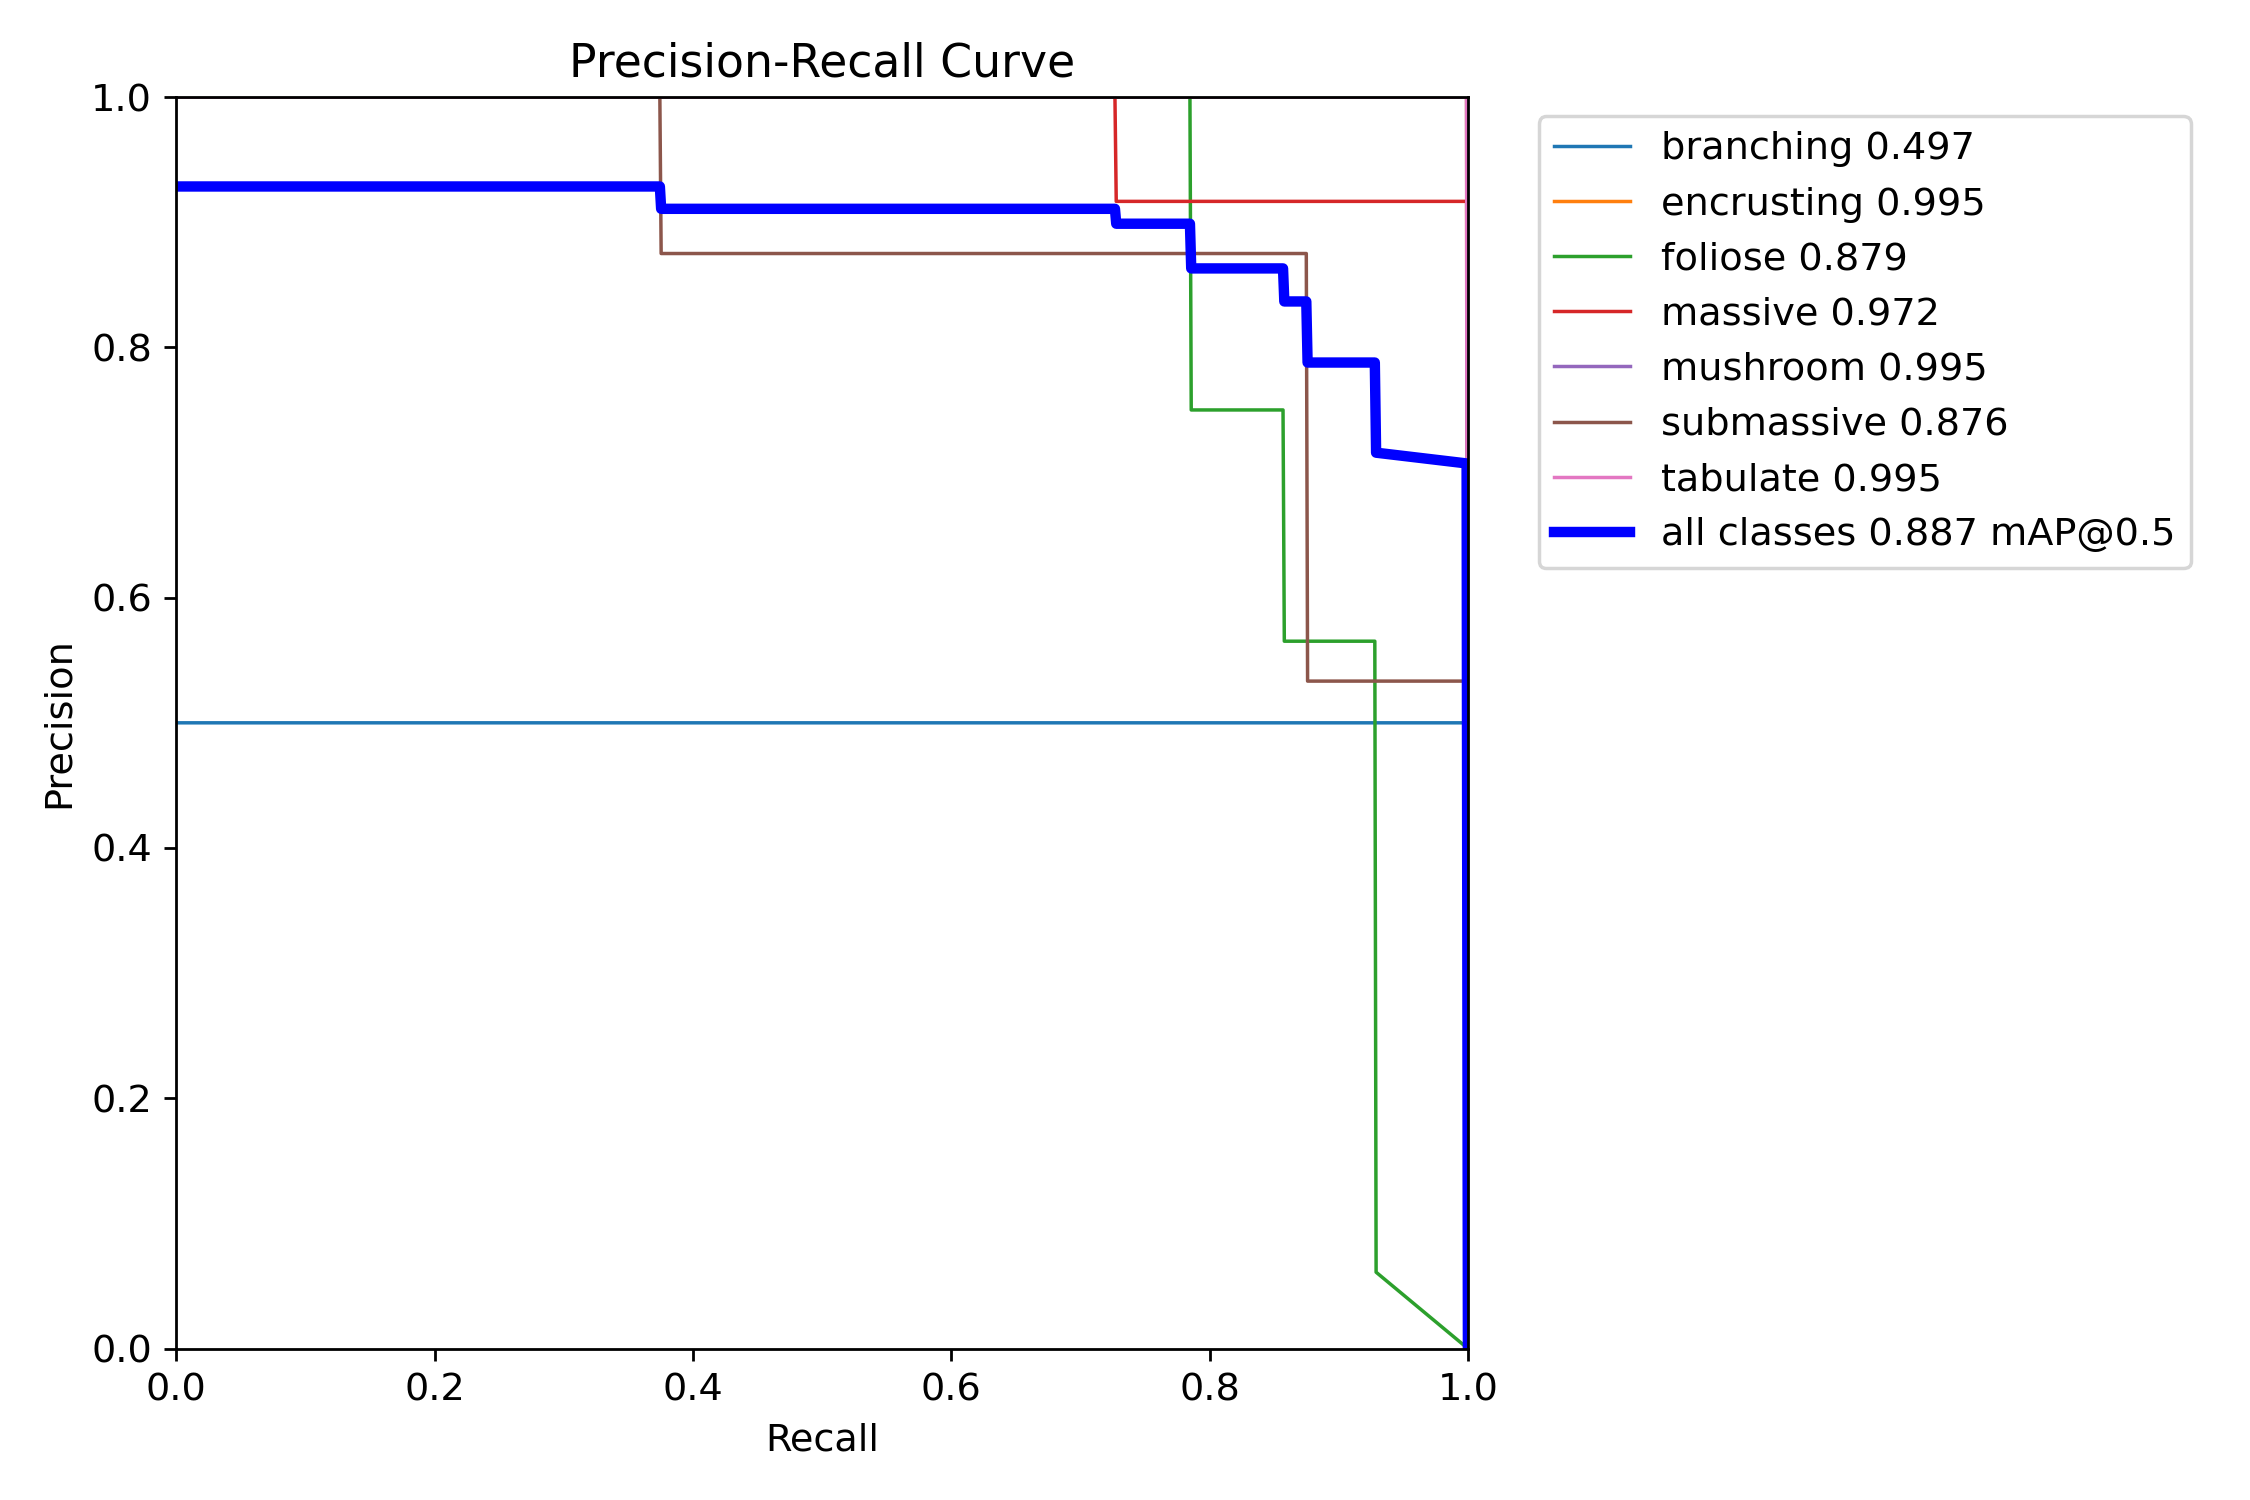

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/MaskPR_curve.png', width=600)

/content


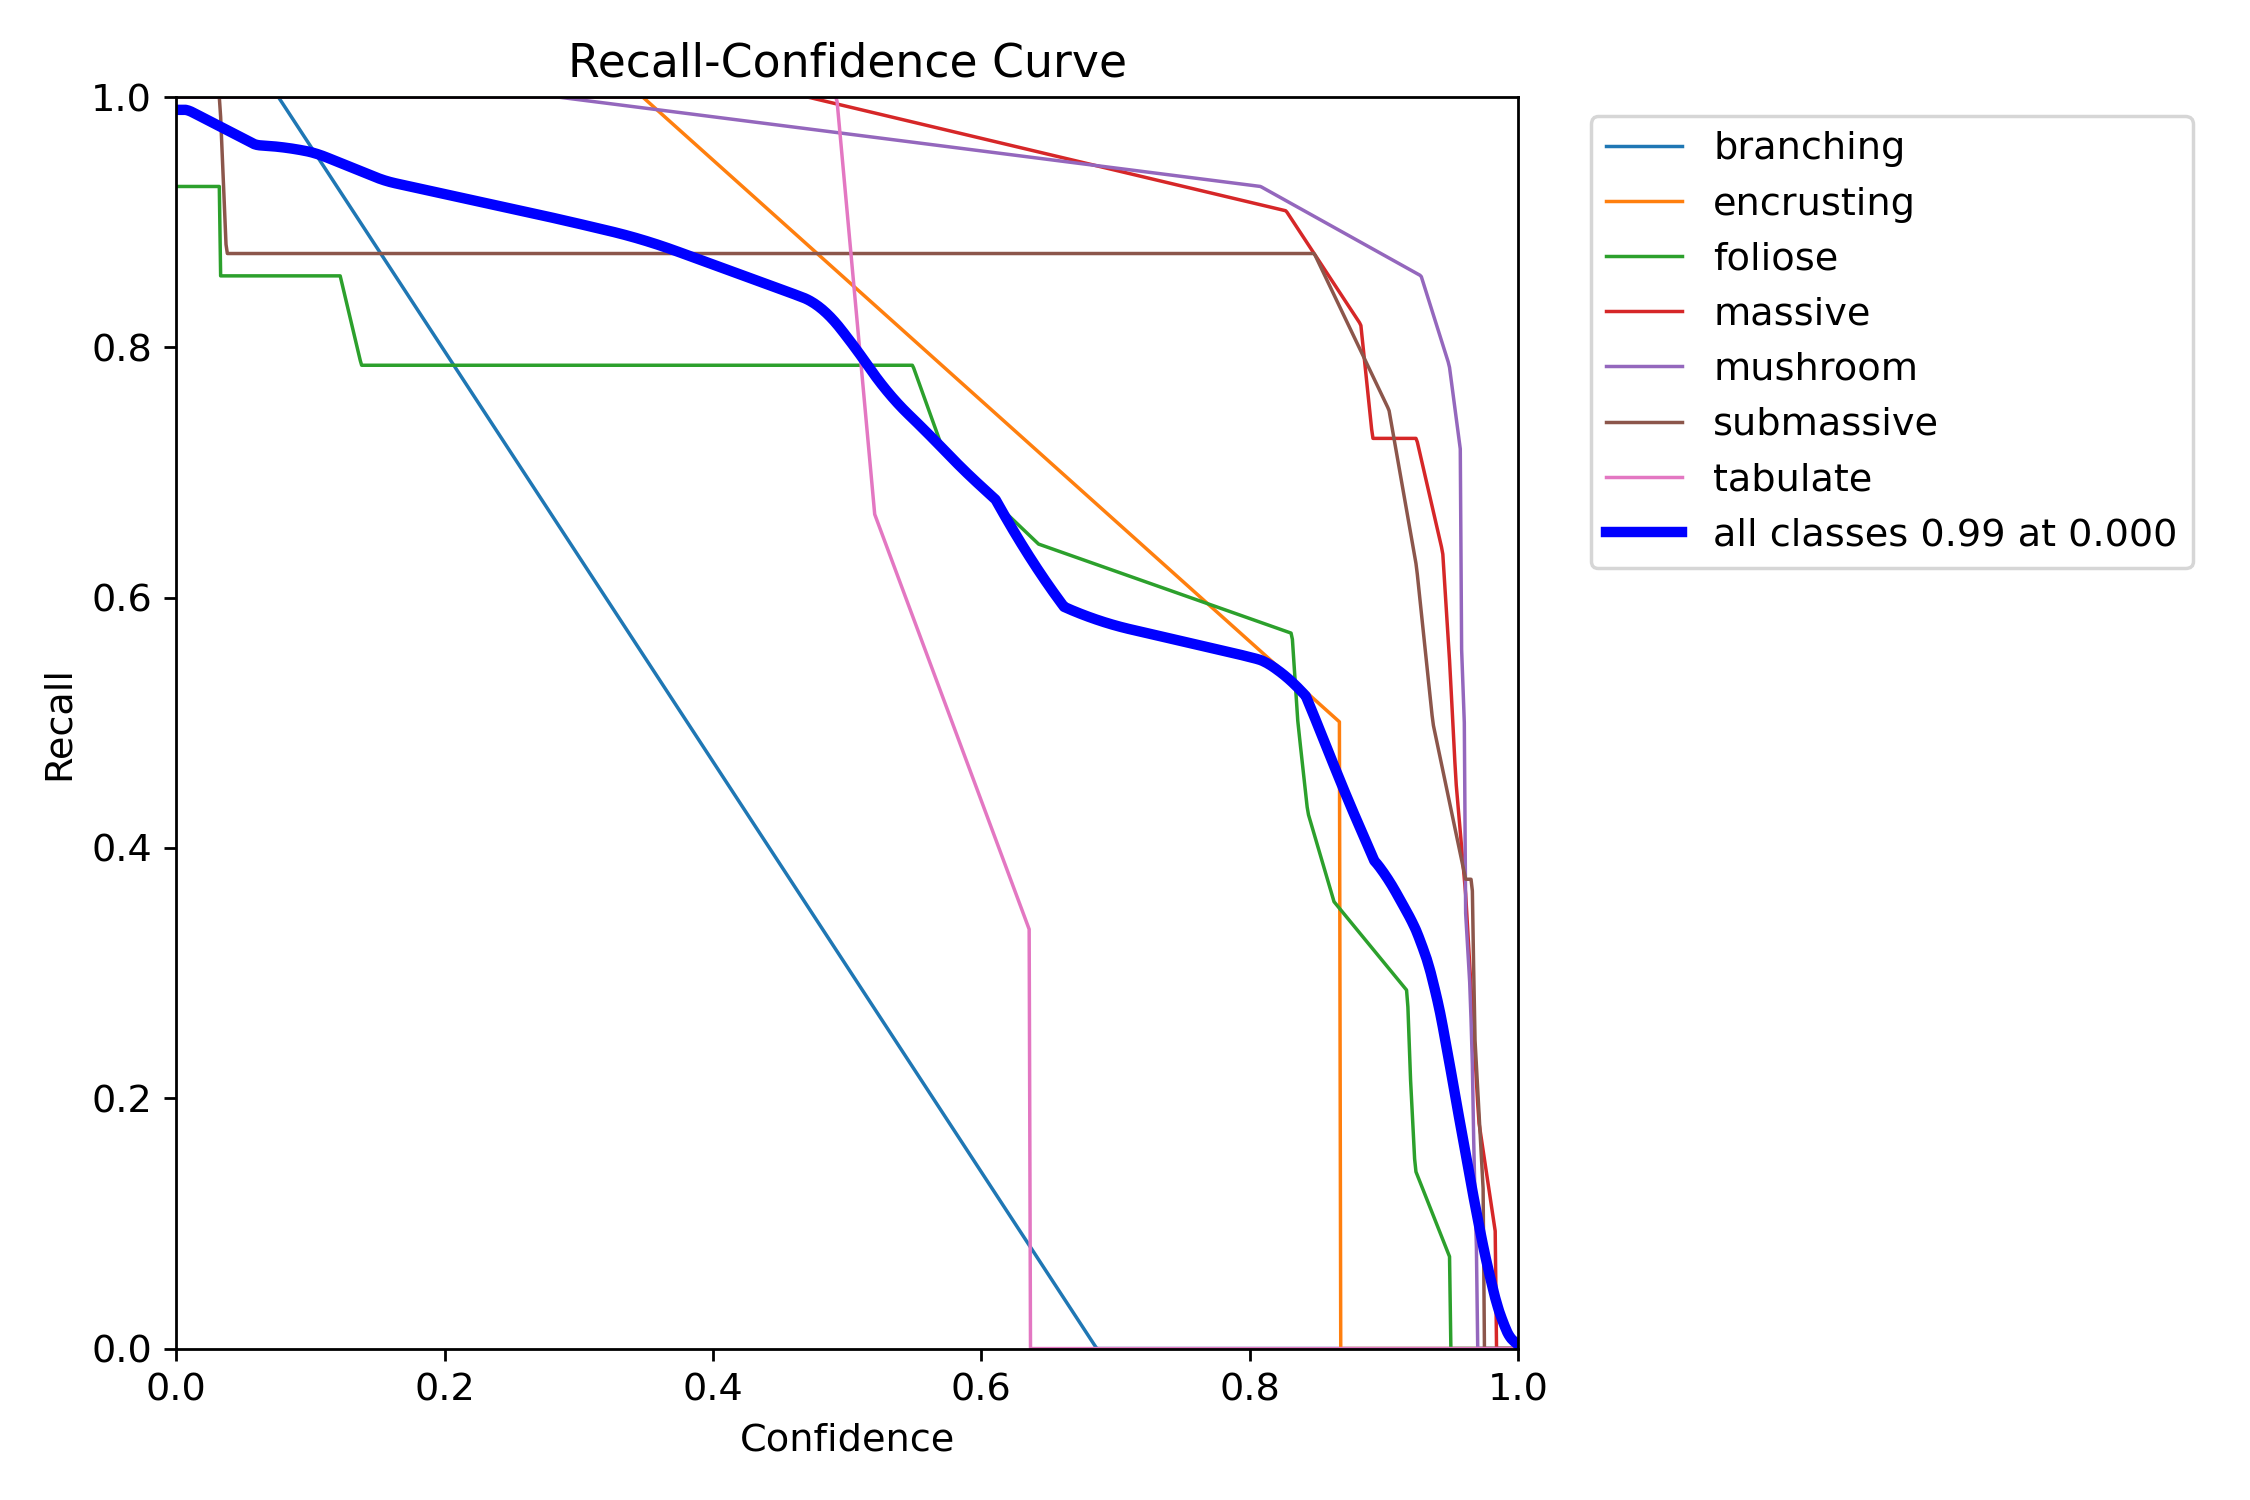

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/MaskR_curve.png', width=600)

/content


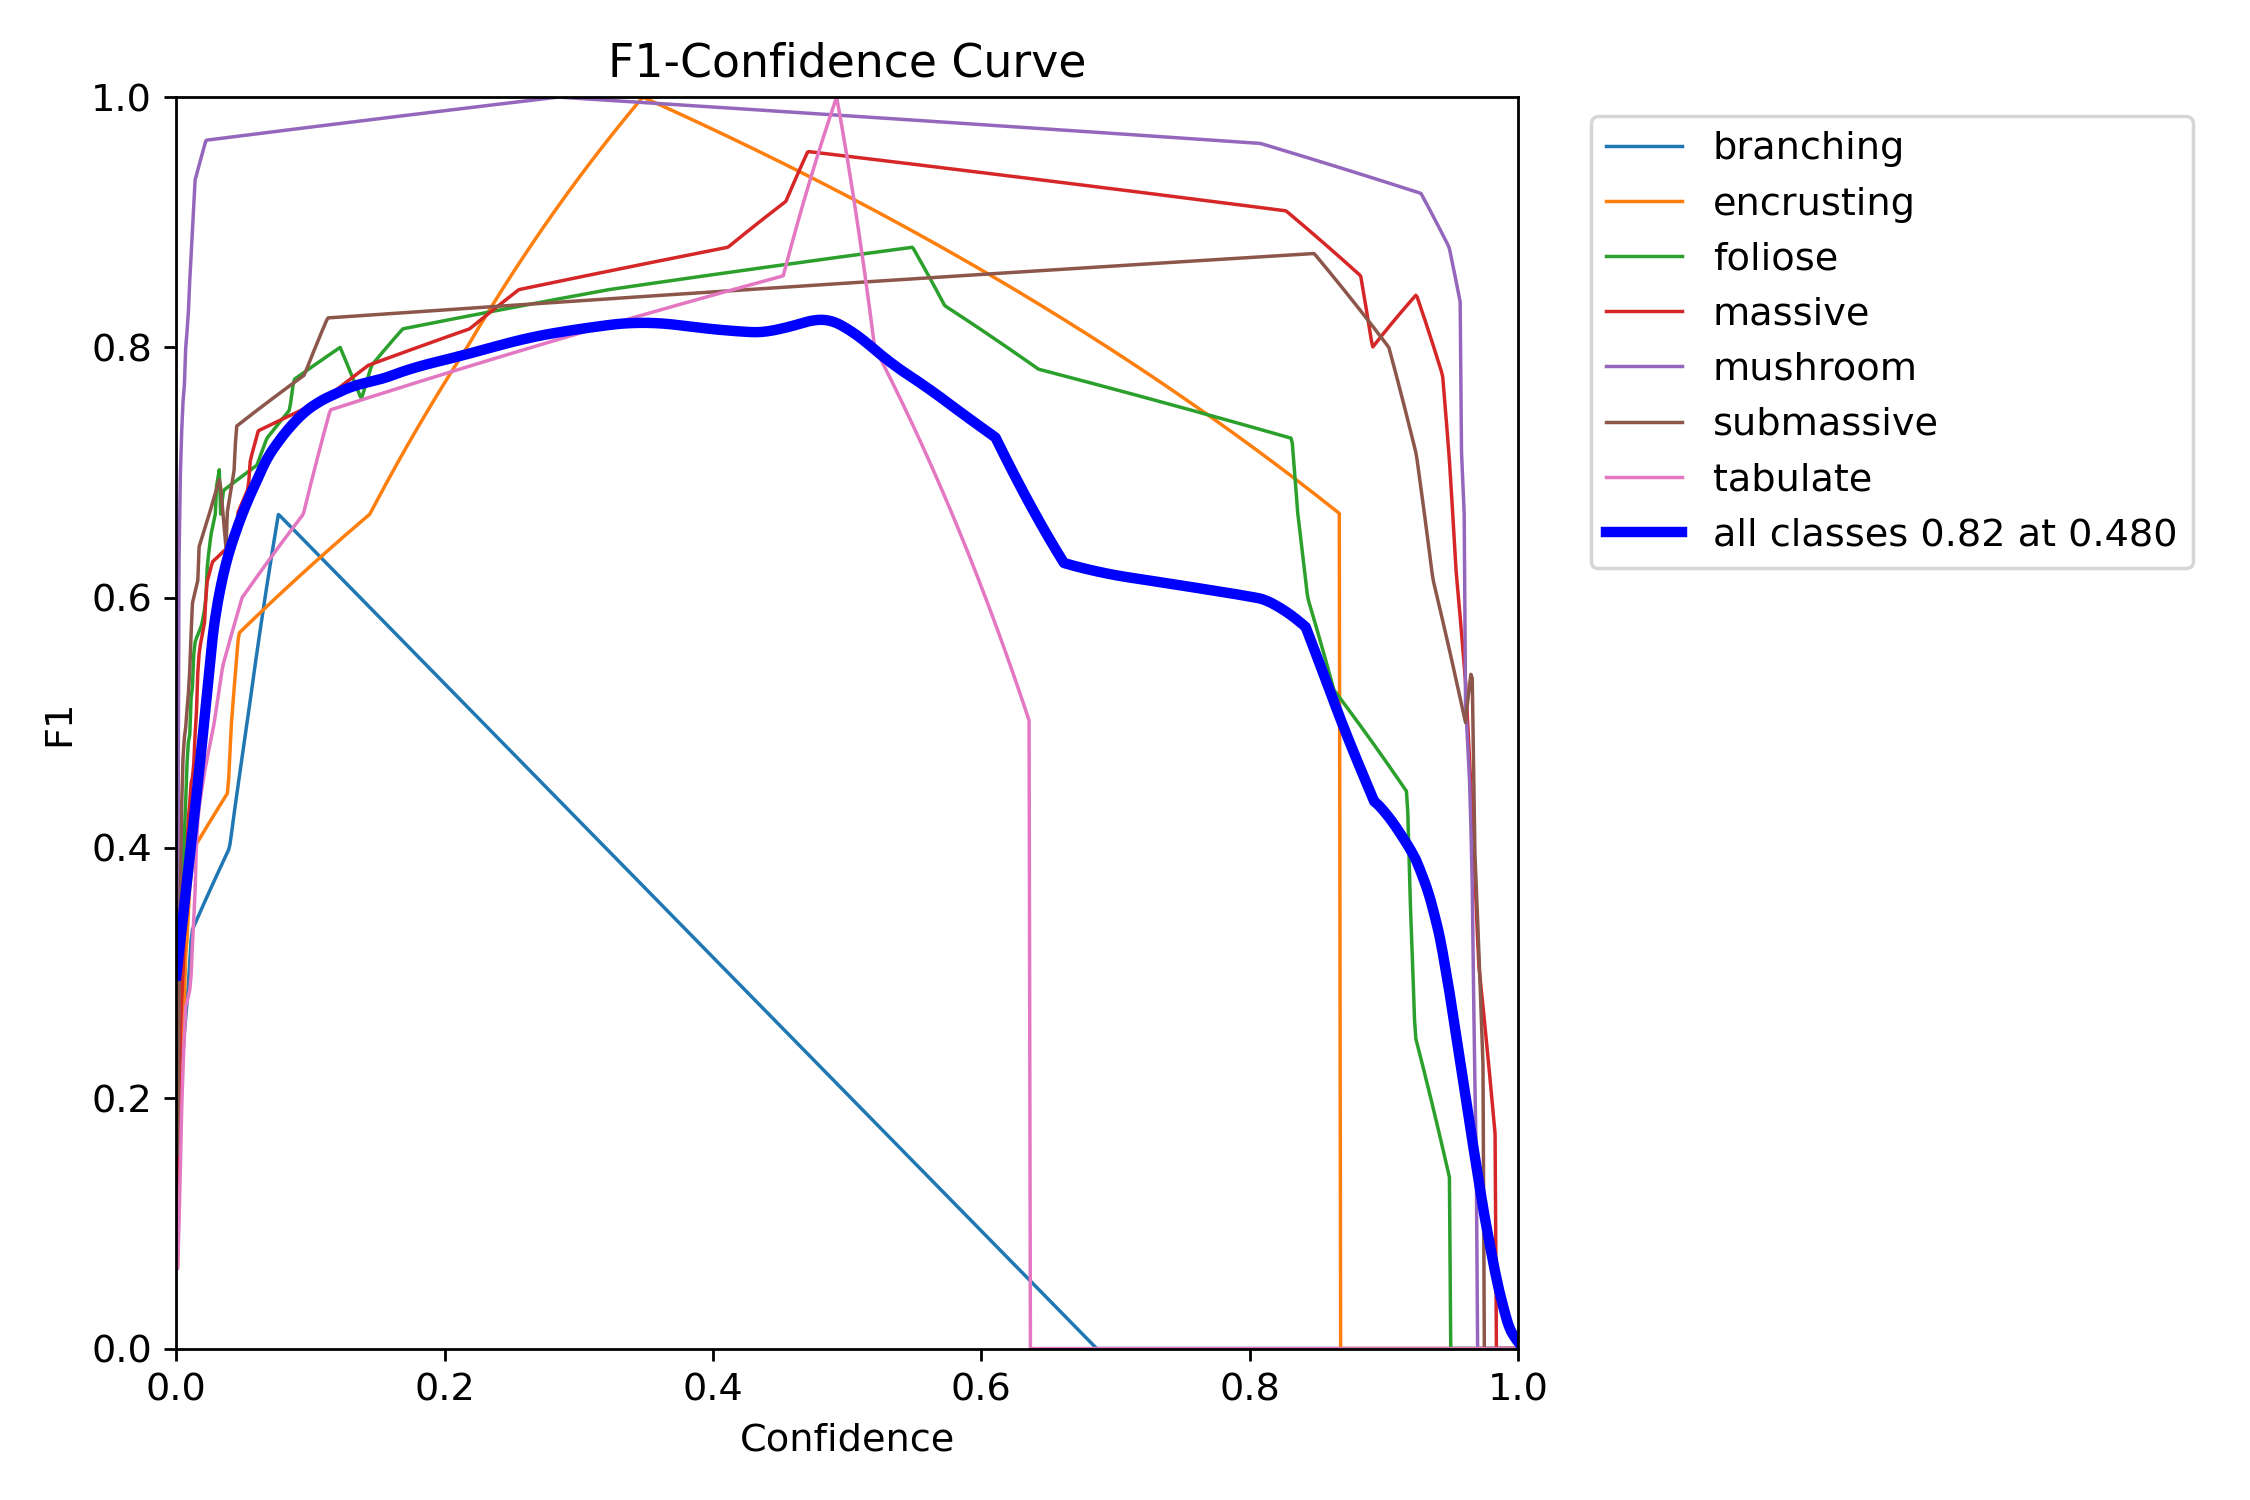

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/BoxF1_curve.png', width=600)

/content


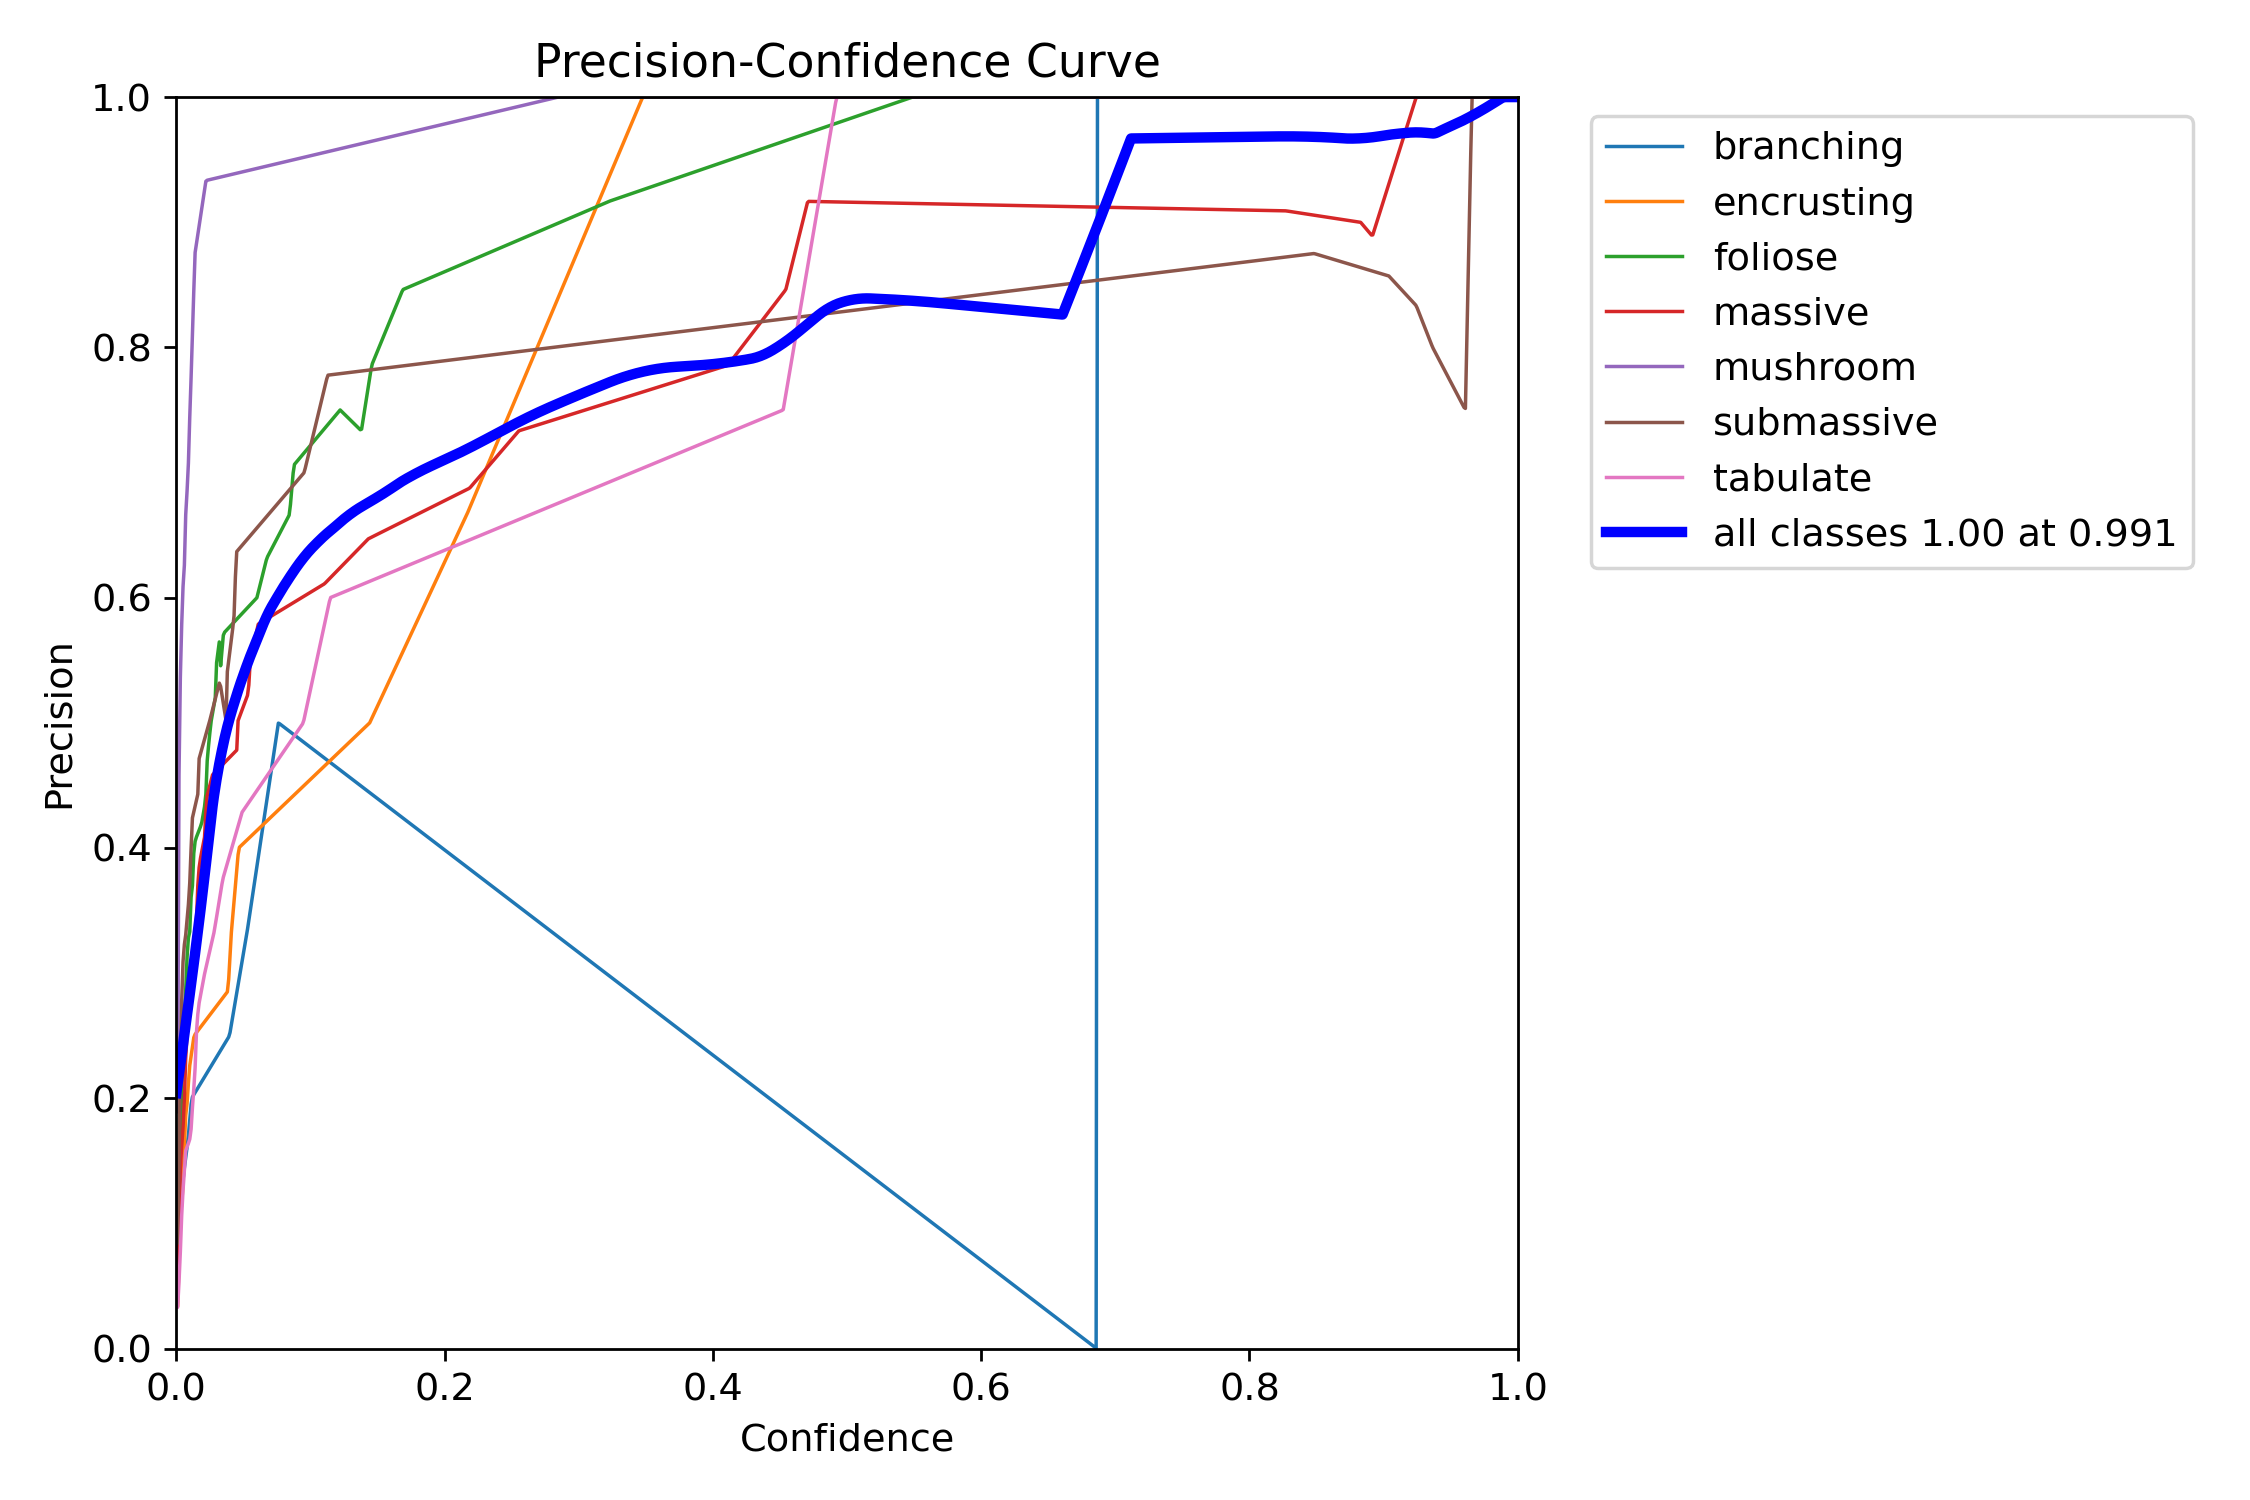

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/BoxP_curve.png', width=600)

/content


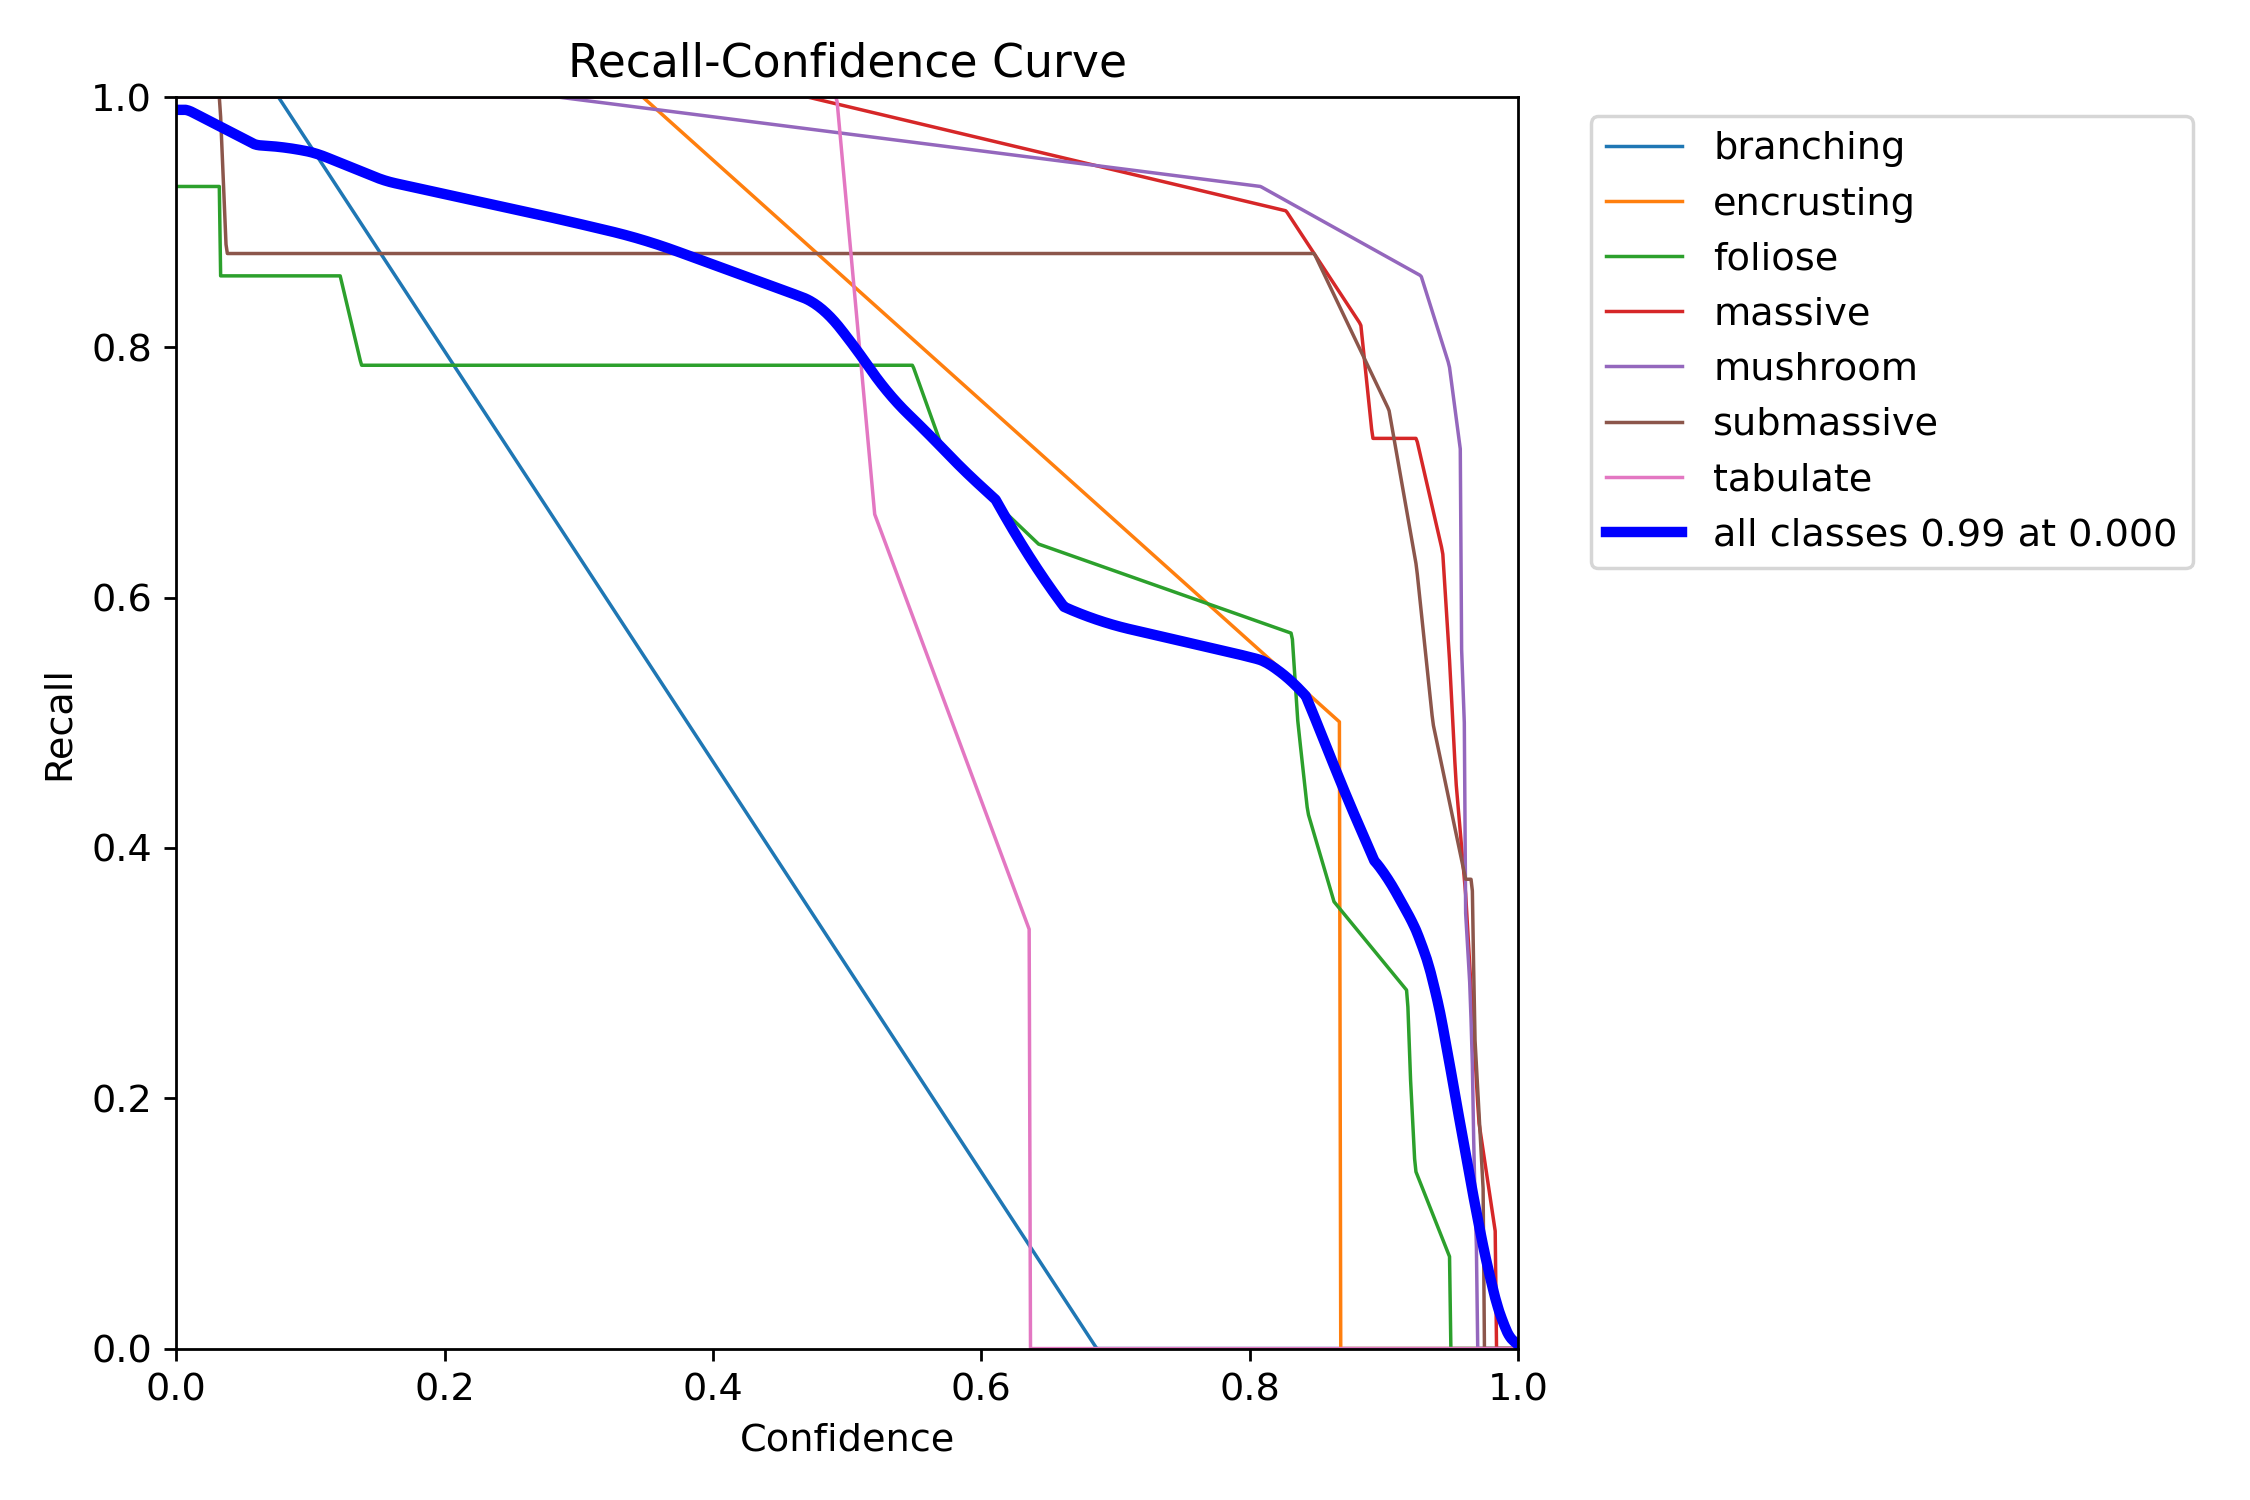

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/BoxR_curve.png', width=600)

/content


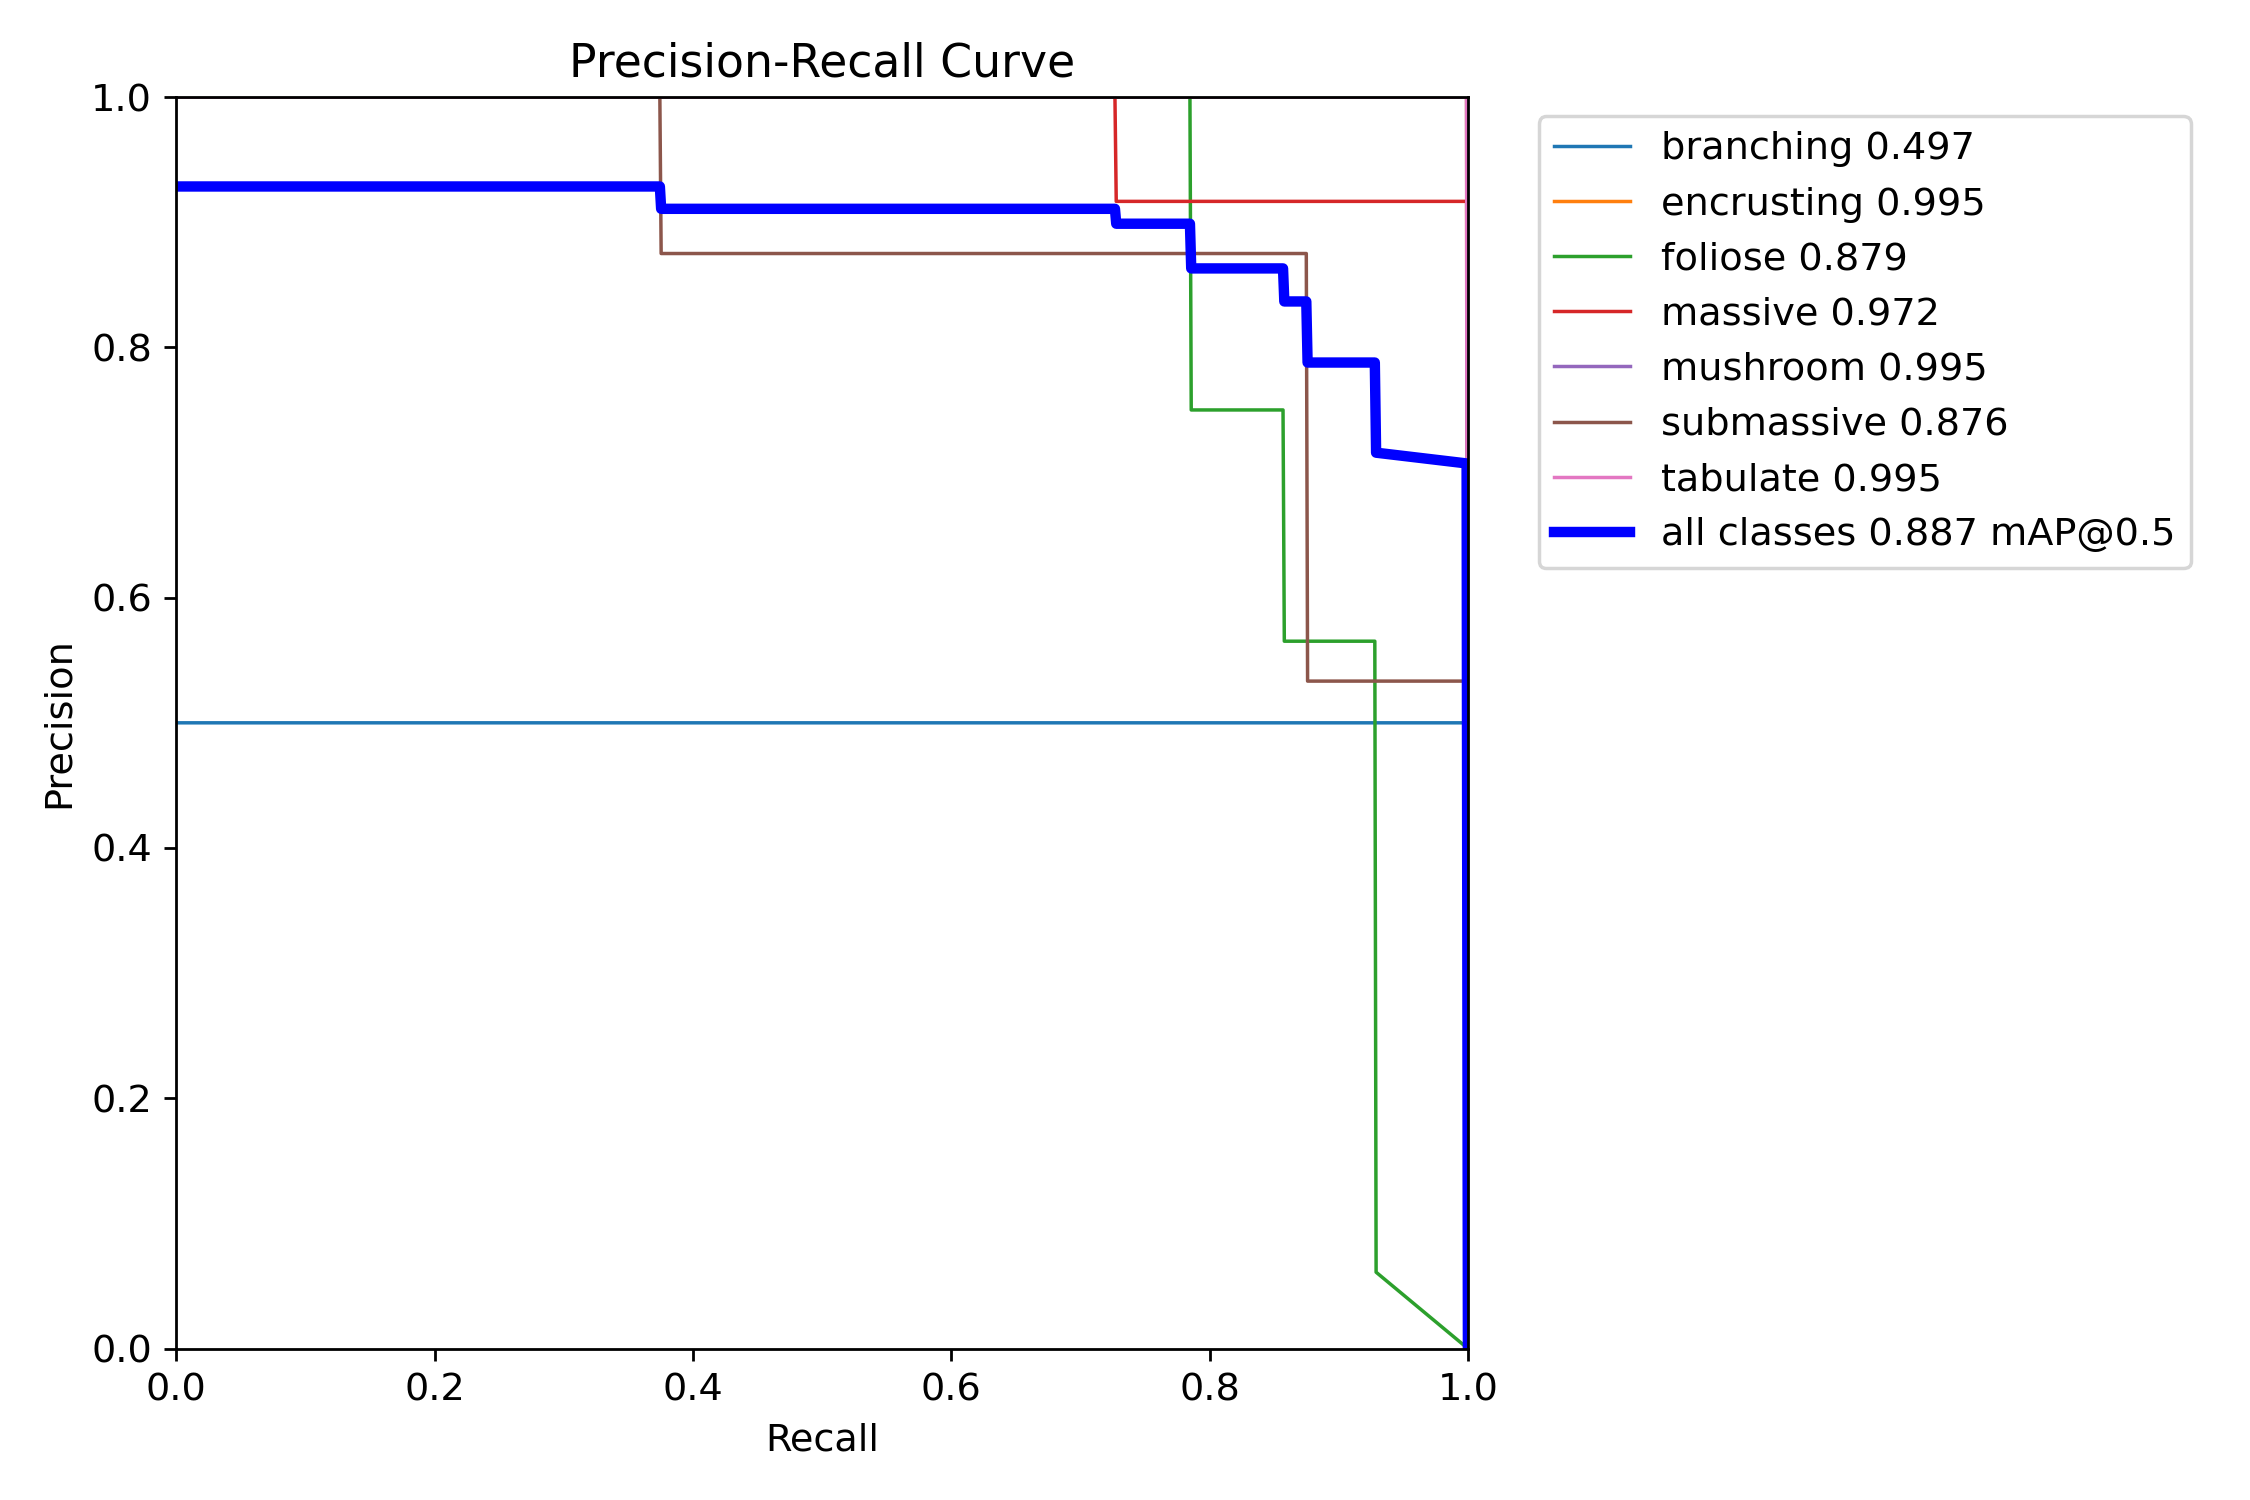

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/BoxPR_curve.png', width=600)

/content


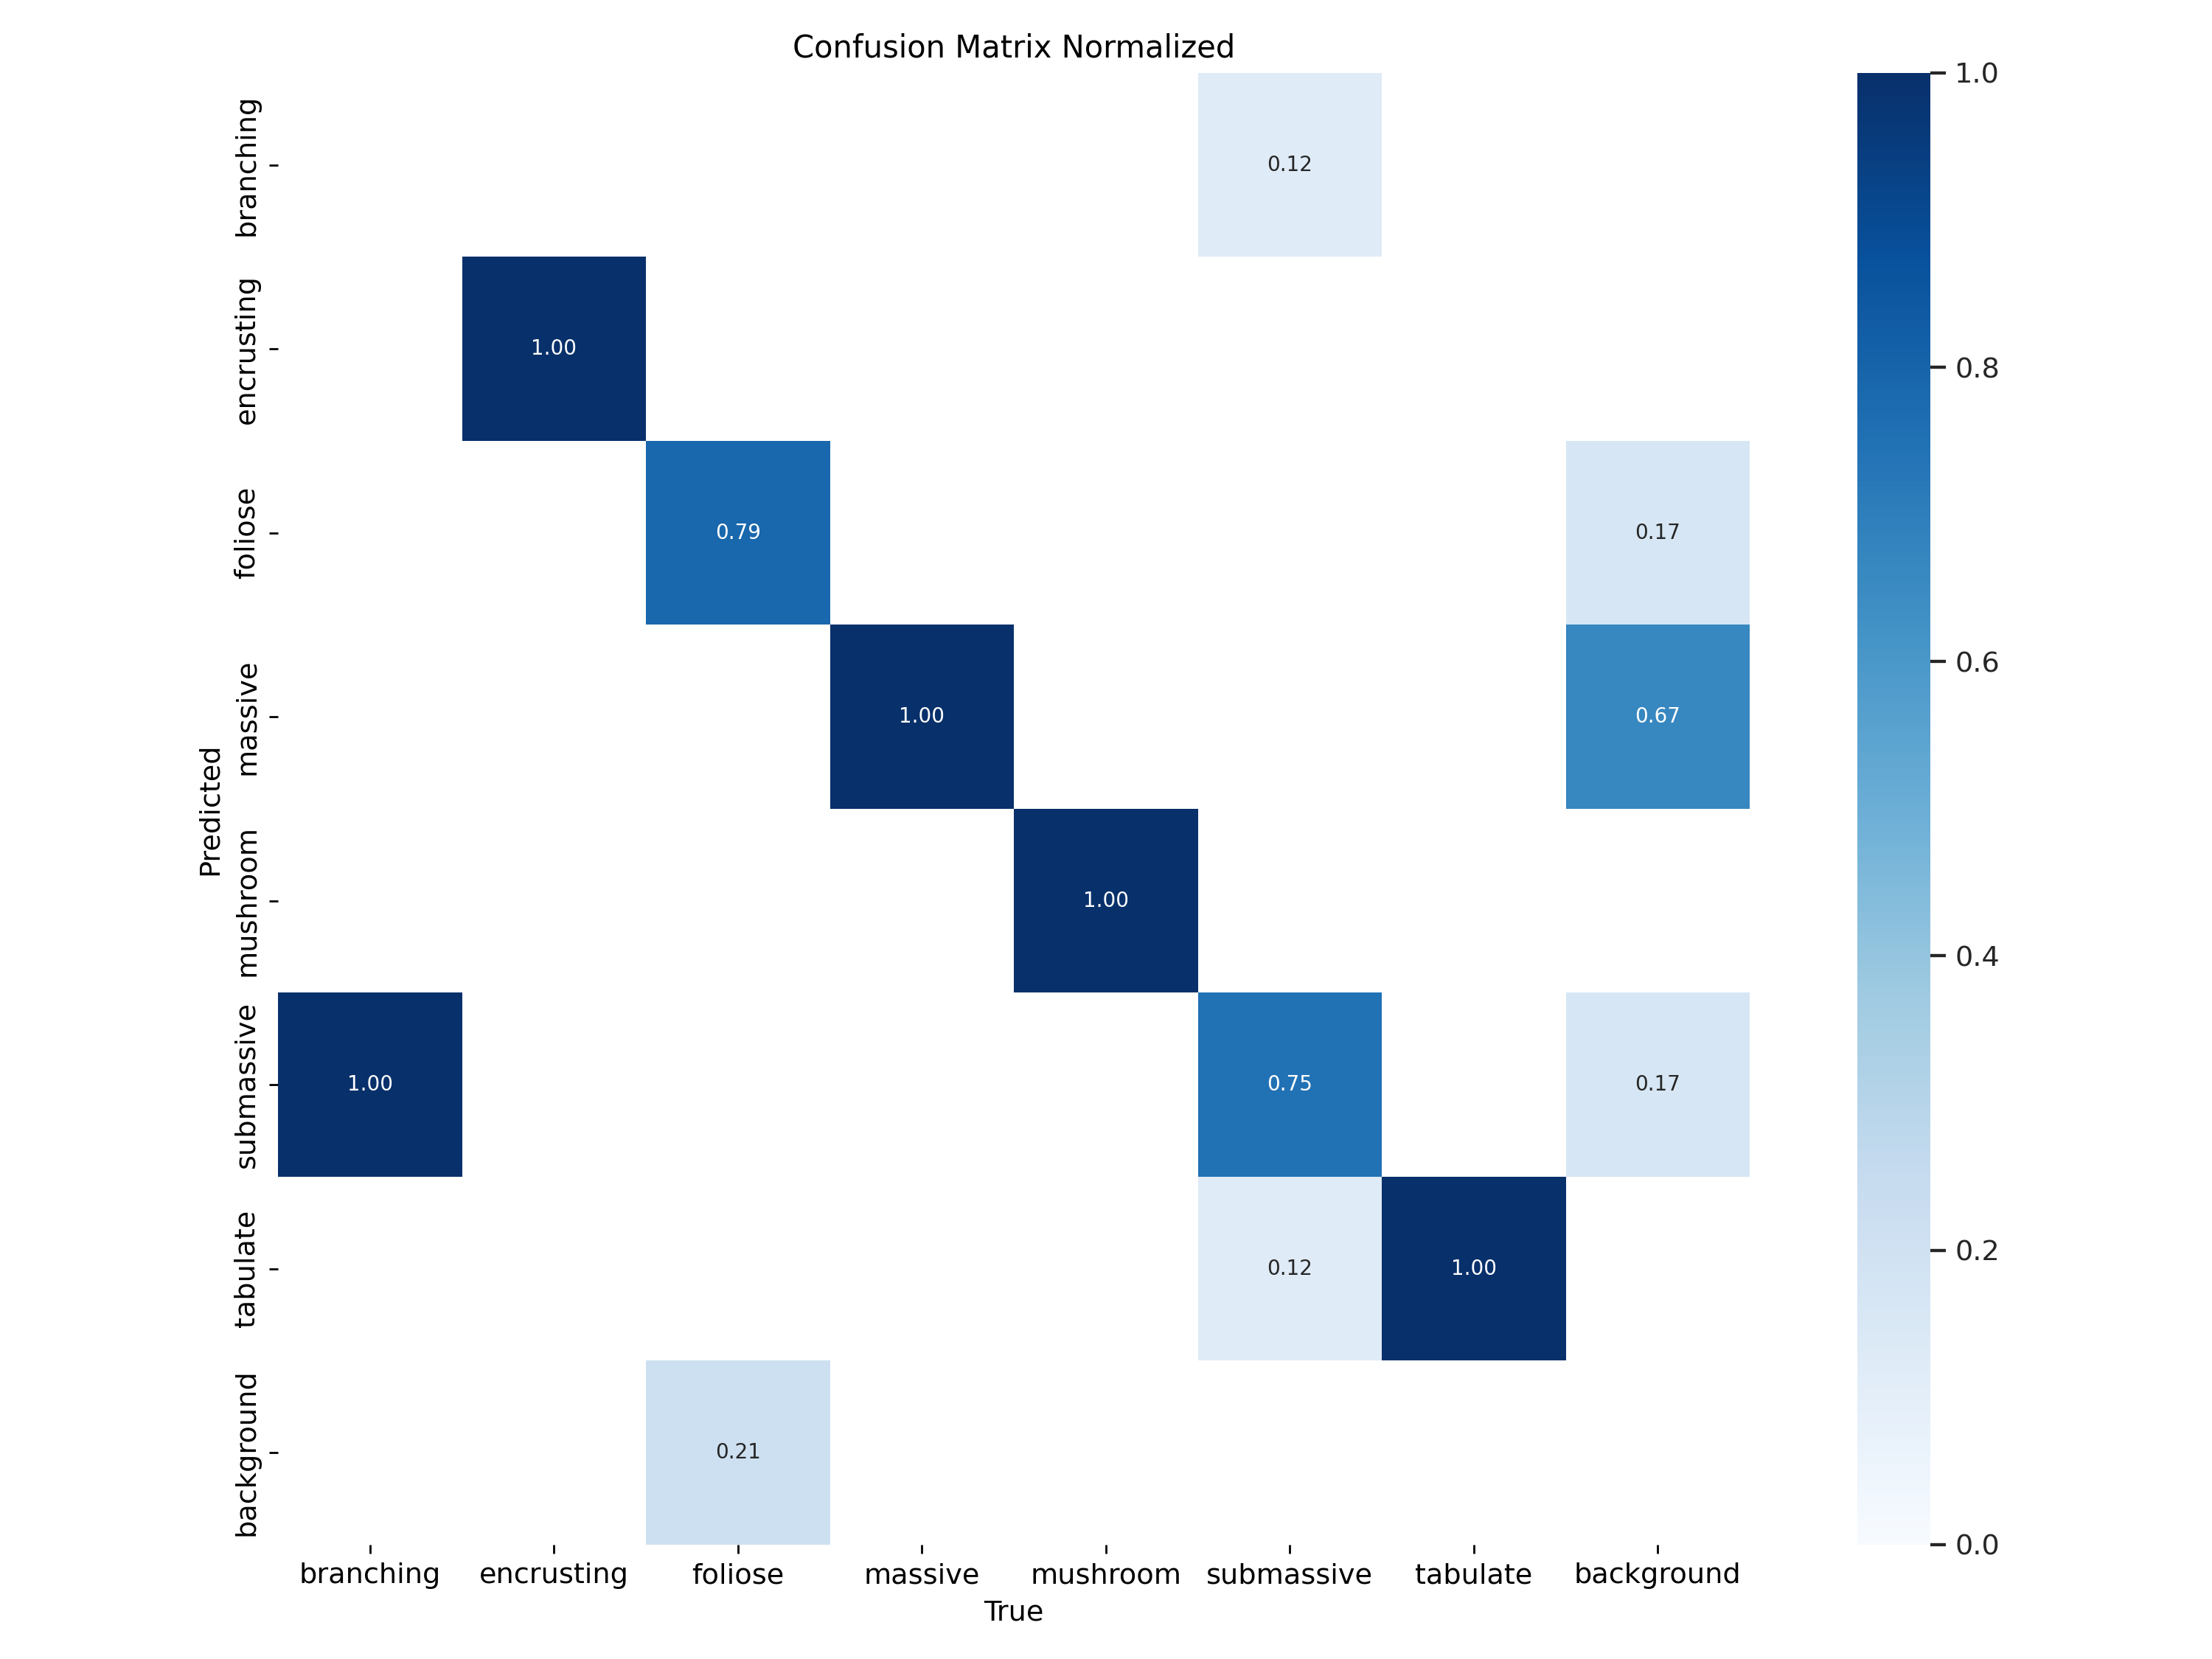

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix_normalized.png', width=600)

Note:

No albumentations performed on dataset. Dataset smol.

/content


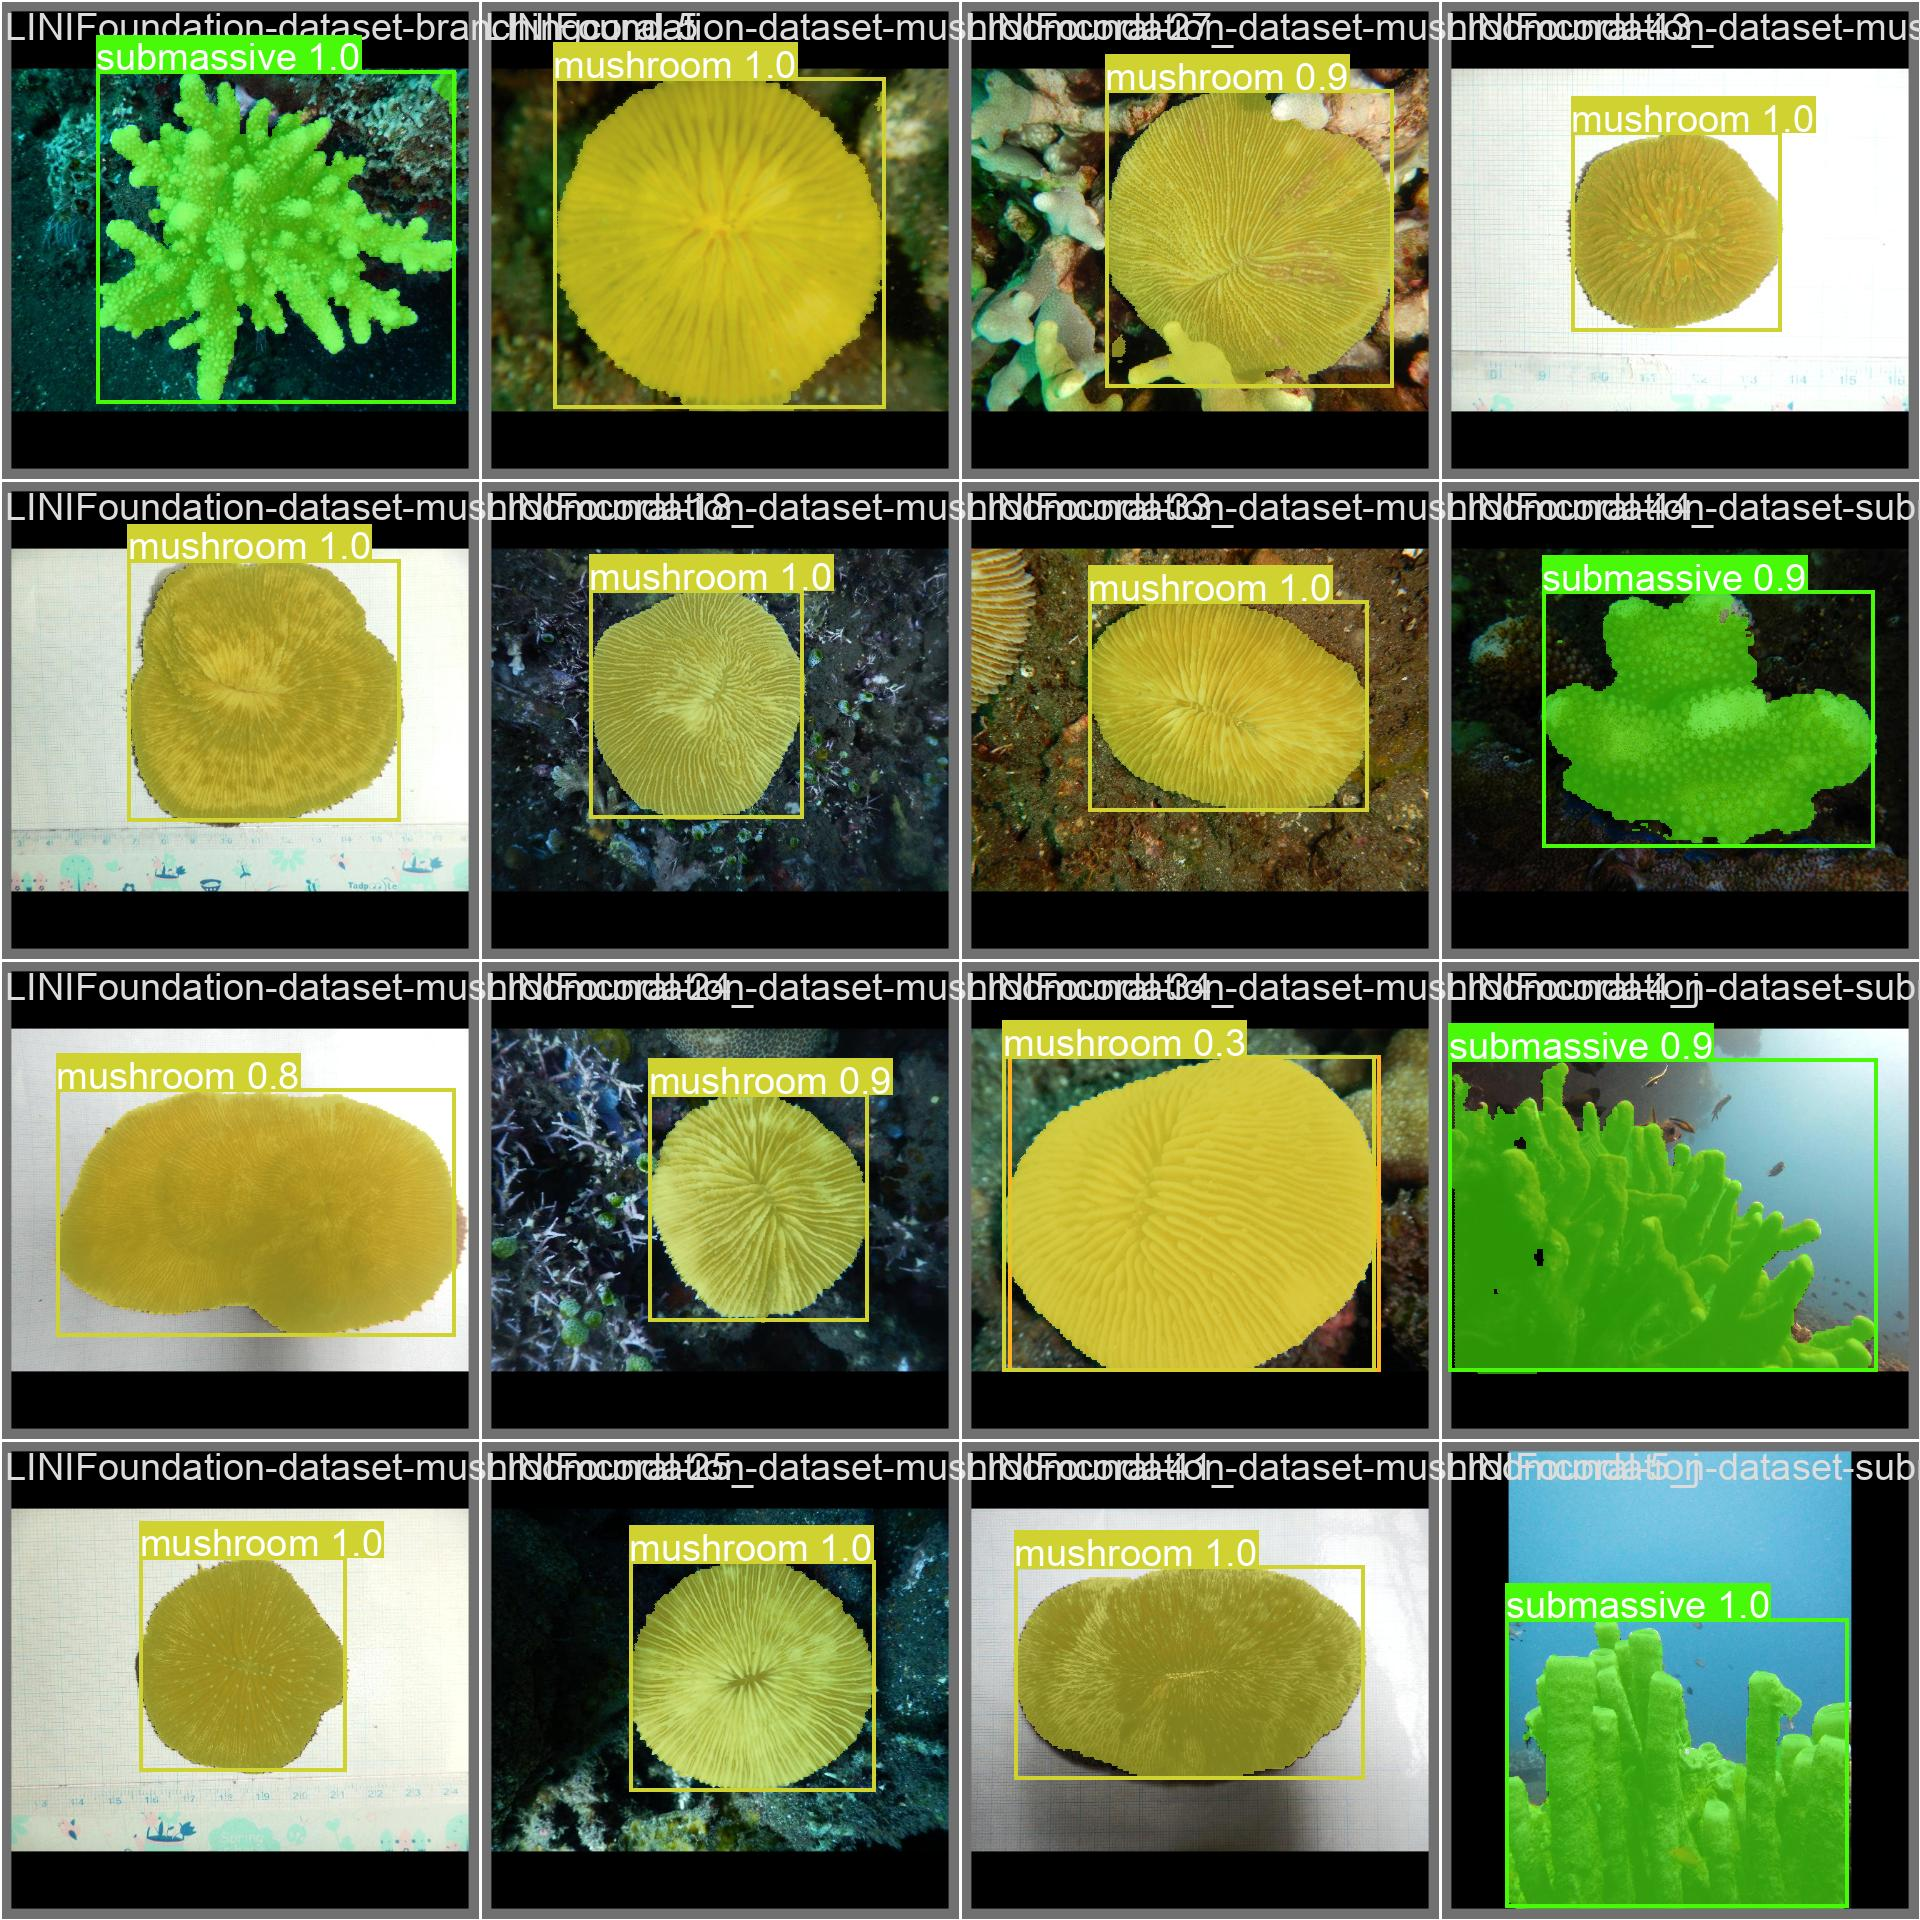

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg', width=600)

In [20]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27226437 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/LINI-Coral-Forms-3.0-10/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.22s/it]
                   all         50         53      0.783      0.886      0.887      0.809      0.783      0.886      0.887      0.782
             branching         50          1      0.277      0.554      0.497      0.497      0.277      0.554      0.497      0.497
            encrusting         50          2          1      0.998      0.995      0.846          1      0.998      0.995      0.846
               foliose         50         14      0.926      0.786      0.879      0.654      0.926      

In [22]:
!ls {HOME}/runs/segment/val/

BoxF1_curve.png  confusion_matrix_normalized.png  MaskPR_curve.png	 val_batch1_labels.jpg
BoxP_curve.png	 confusion_matrix.png		  MaskR_curve.png	 val_batch1_pred.jpg
BoxPR_curve.png  MaskF1_curve.png		  val_batch0_labels.jpg  val_batch2_labels.jpg
BoxR_curve.png	 MaskP_curve.png		  val_batch0_pred.jpg	 val_batch2_pred.jpg


/content


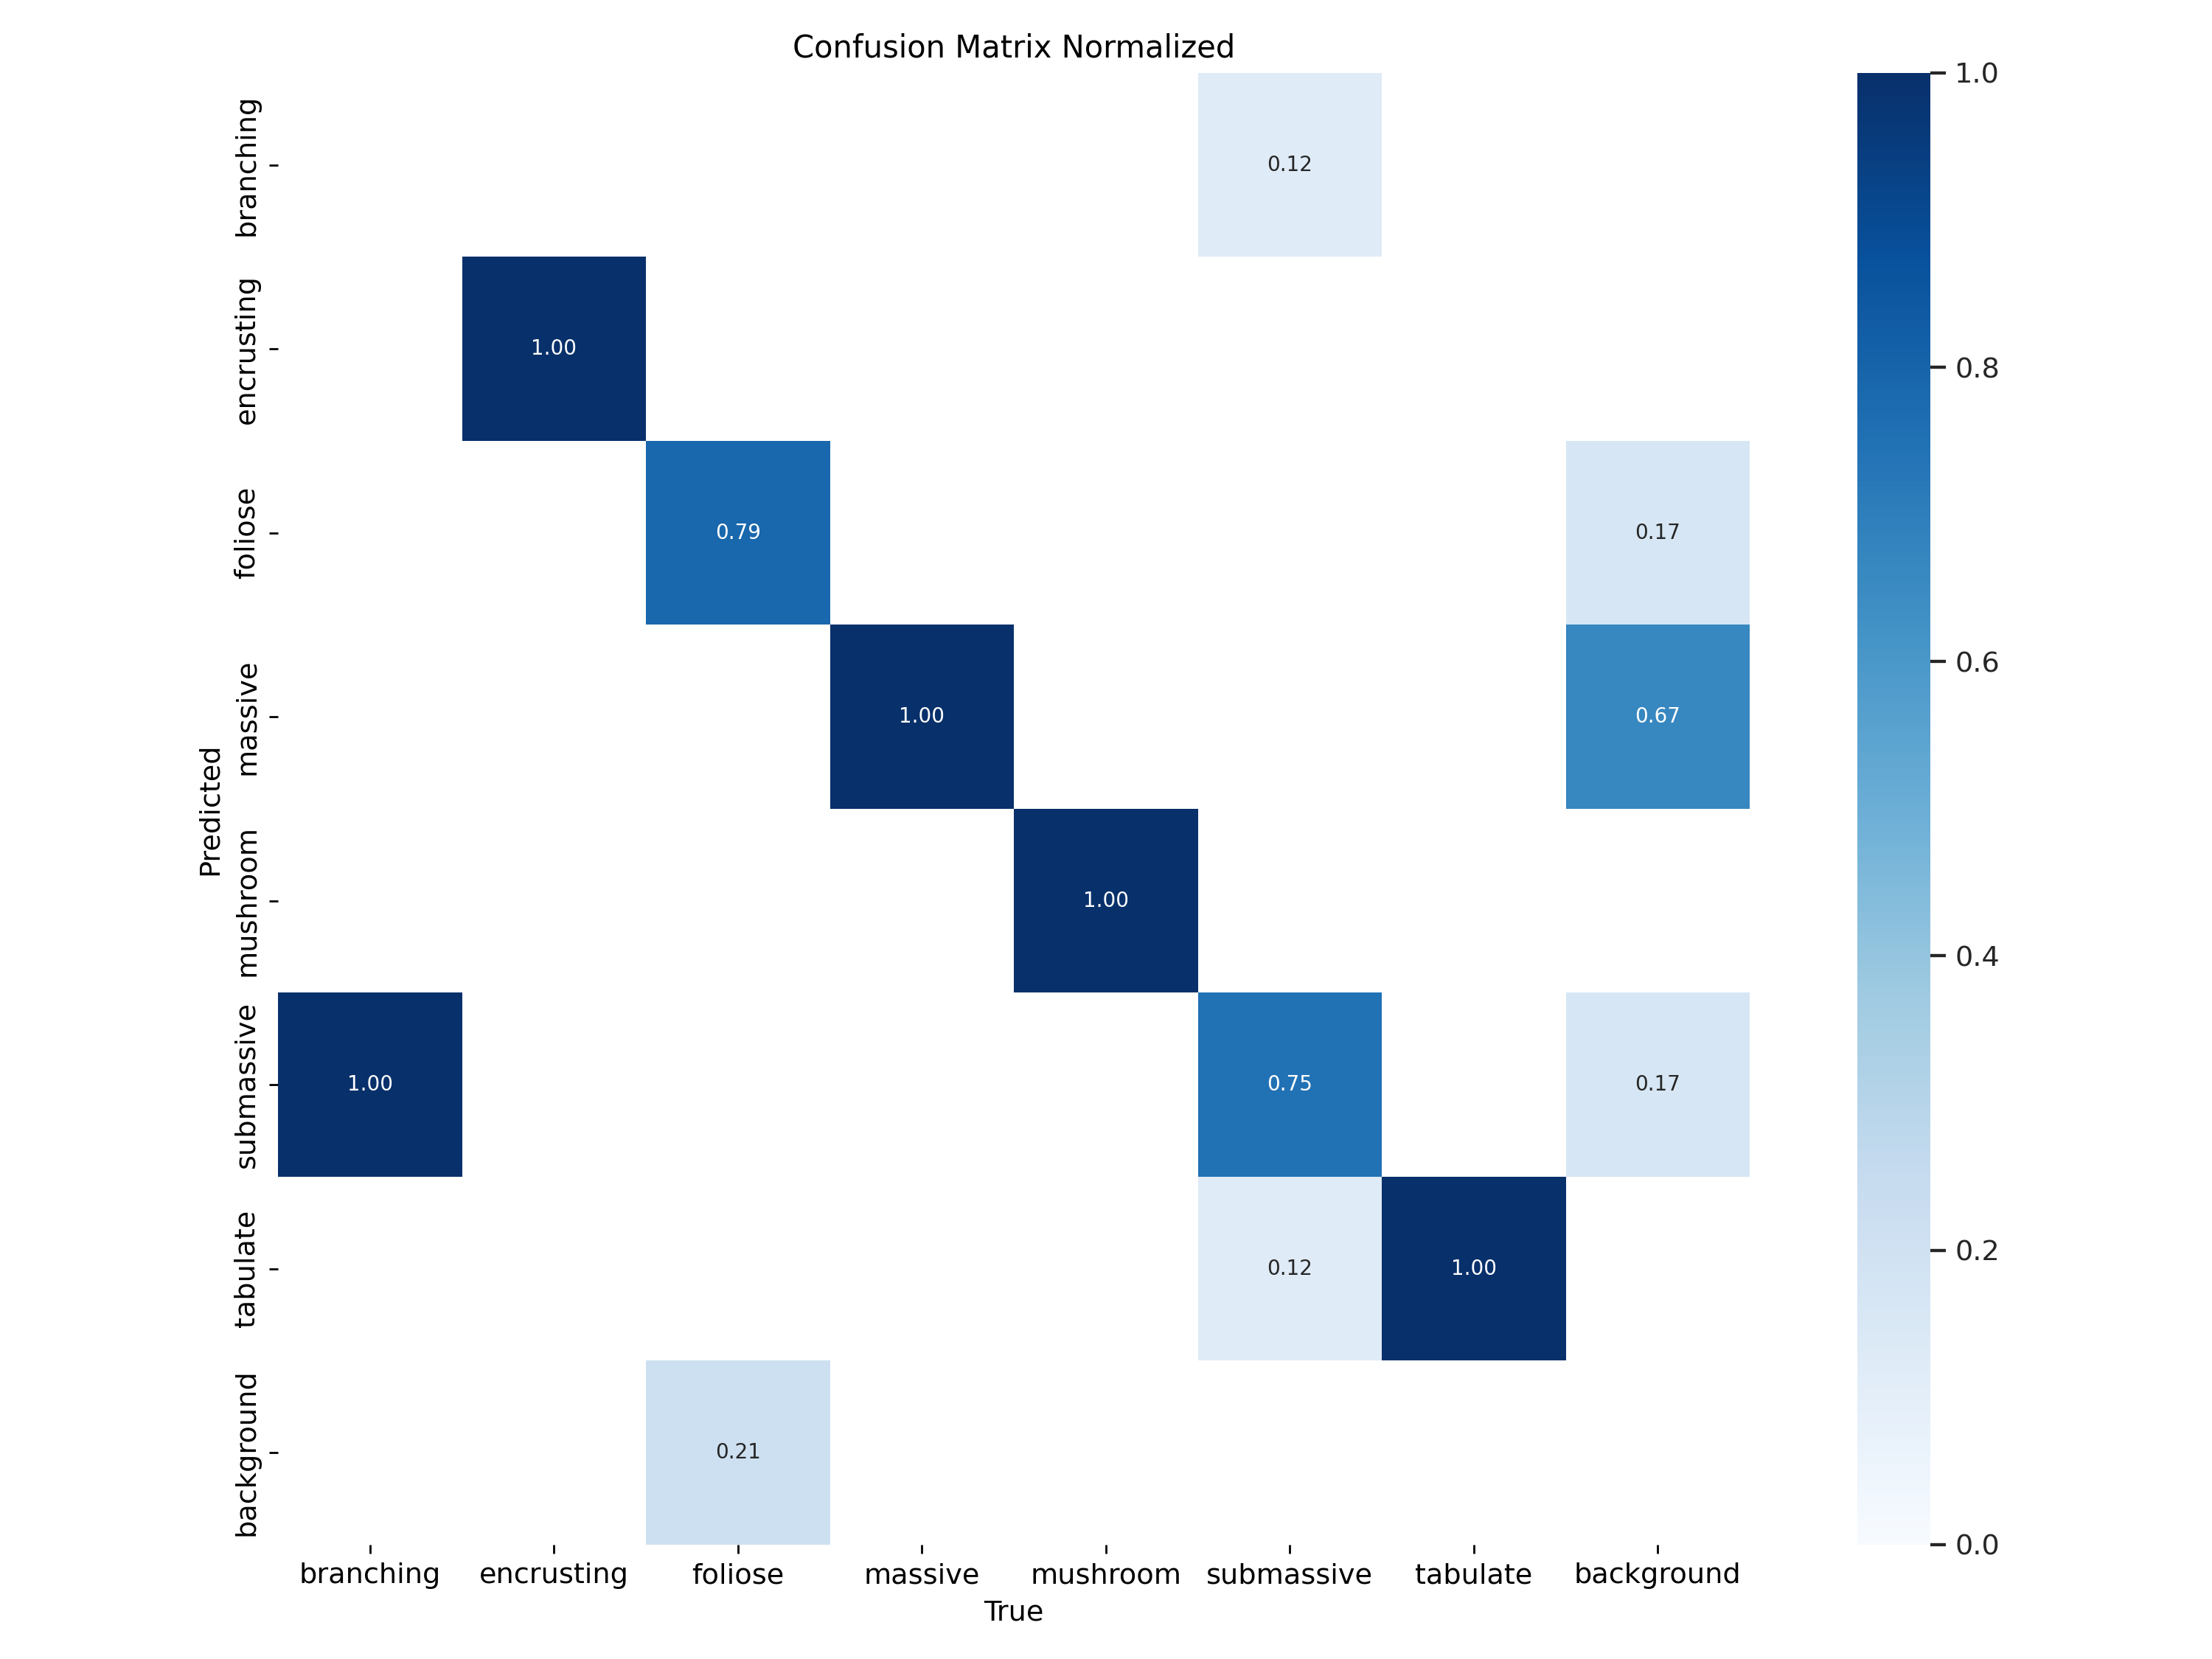

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/val/confusion_matrix_normalized.png', width=600)

/content


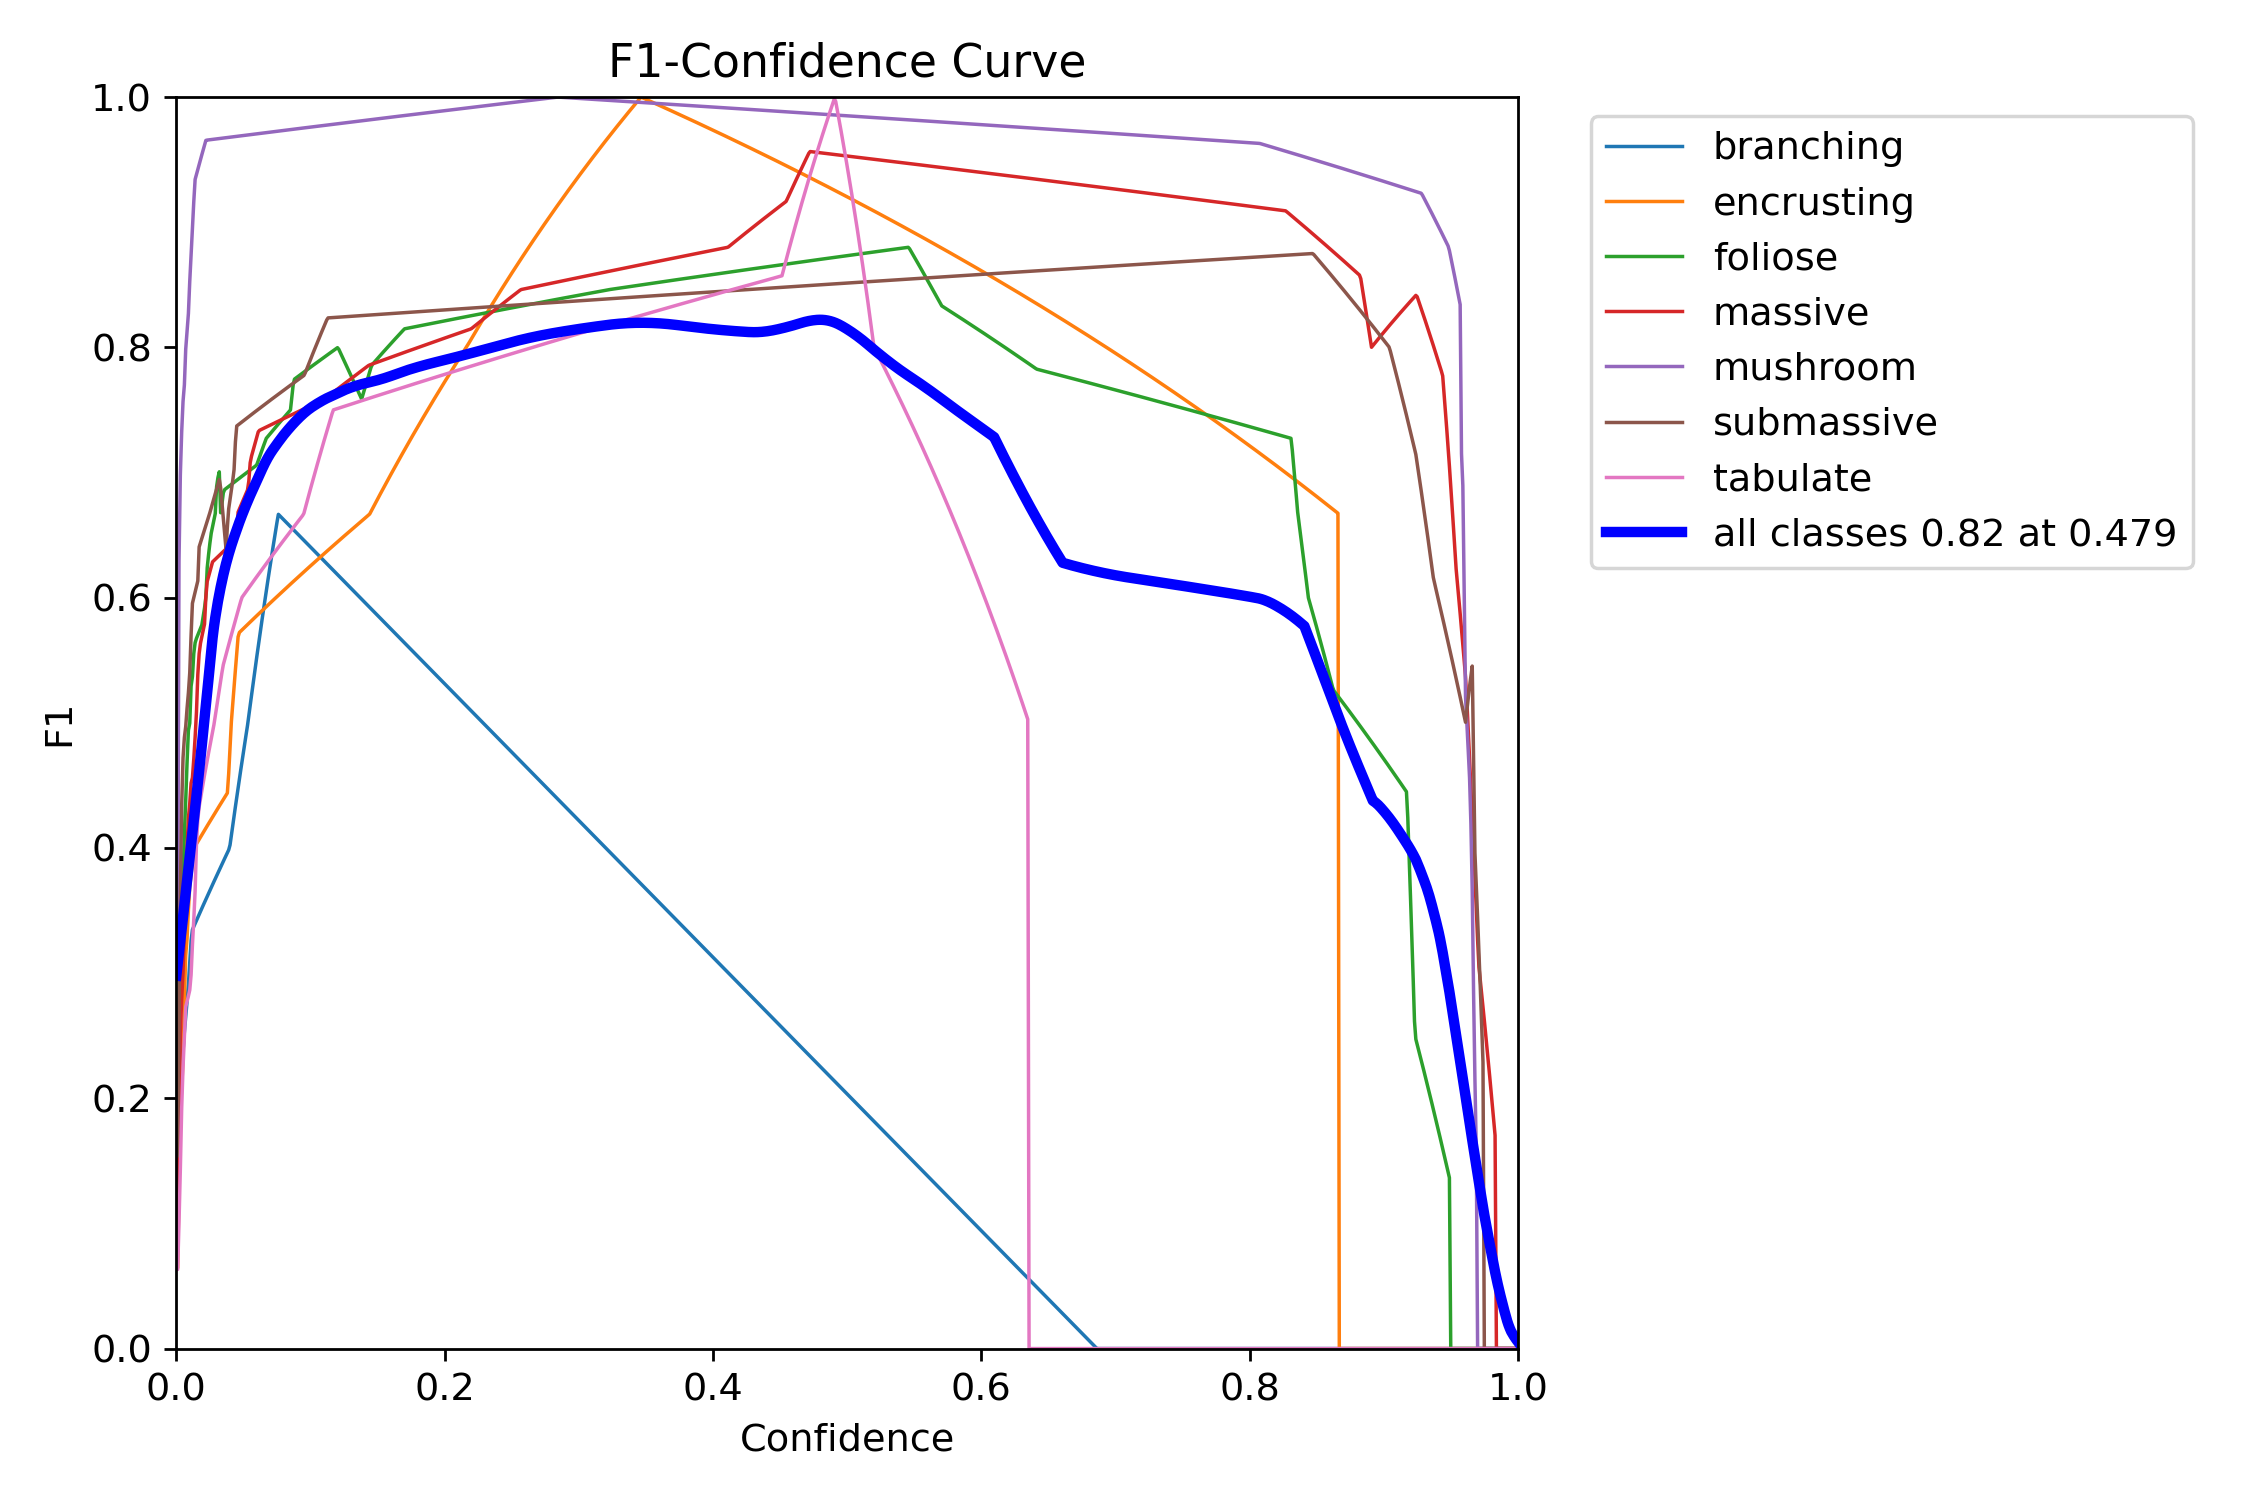

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/val/BoxF1_curve.png', width=600)

/content


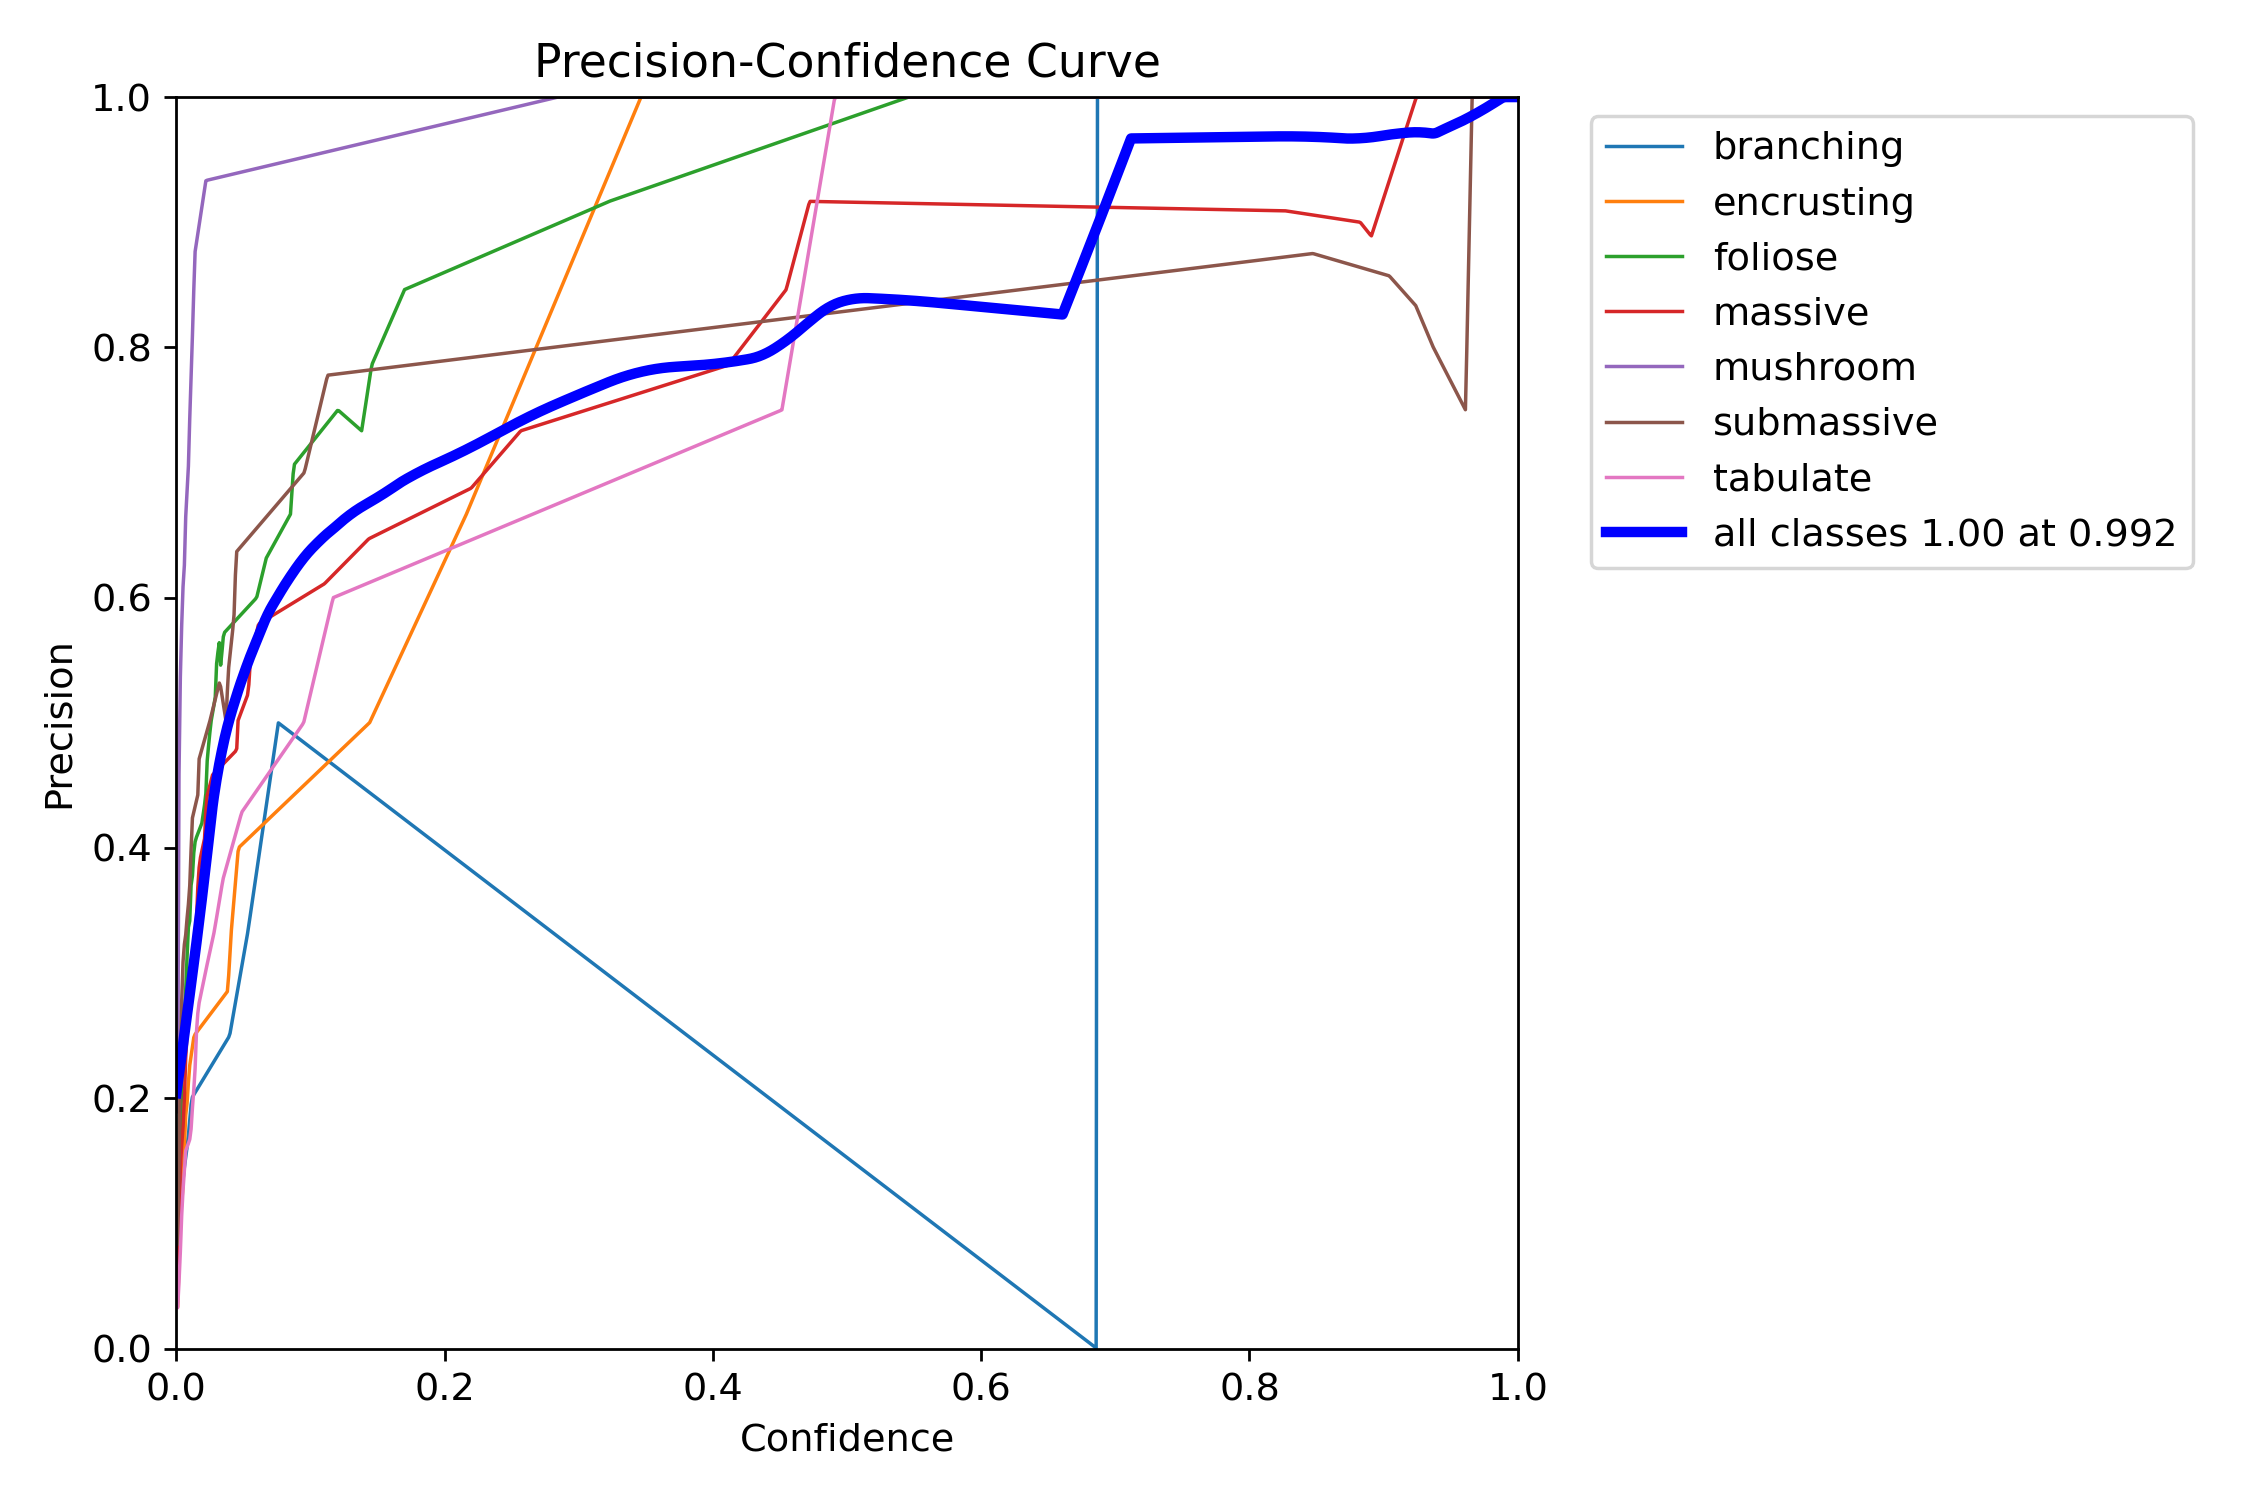

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/val/BoxP_curve.png', width=600)

/content


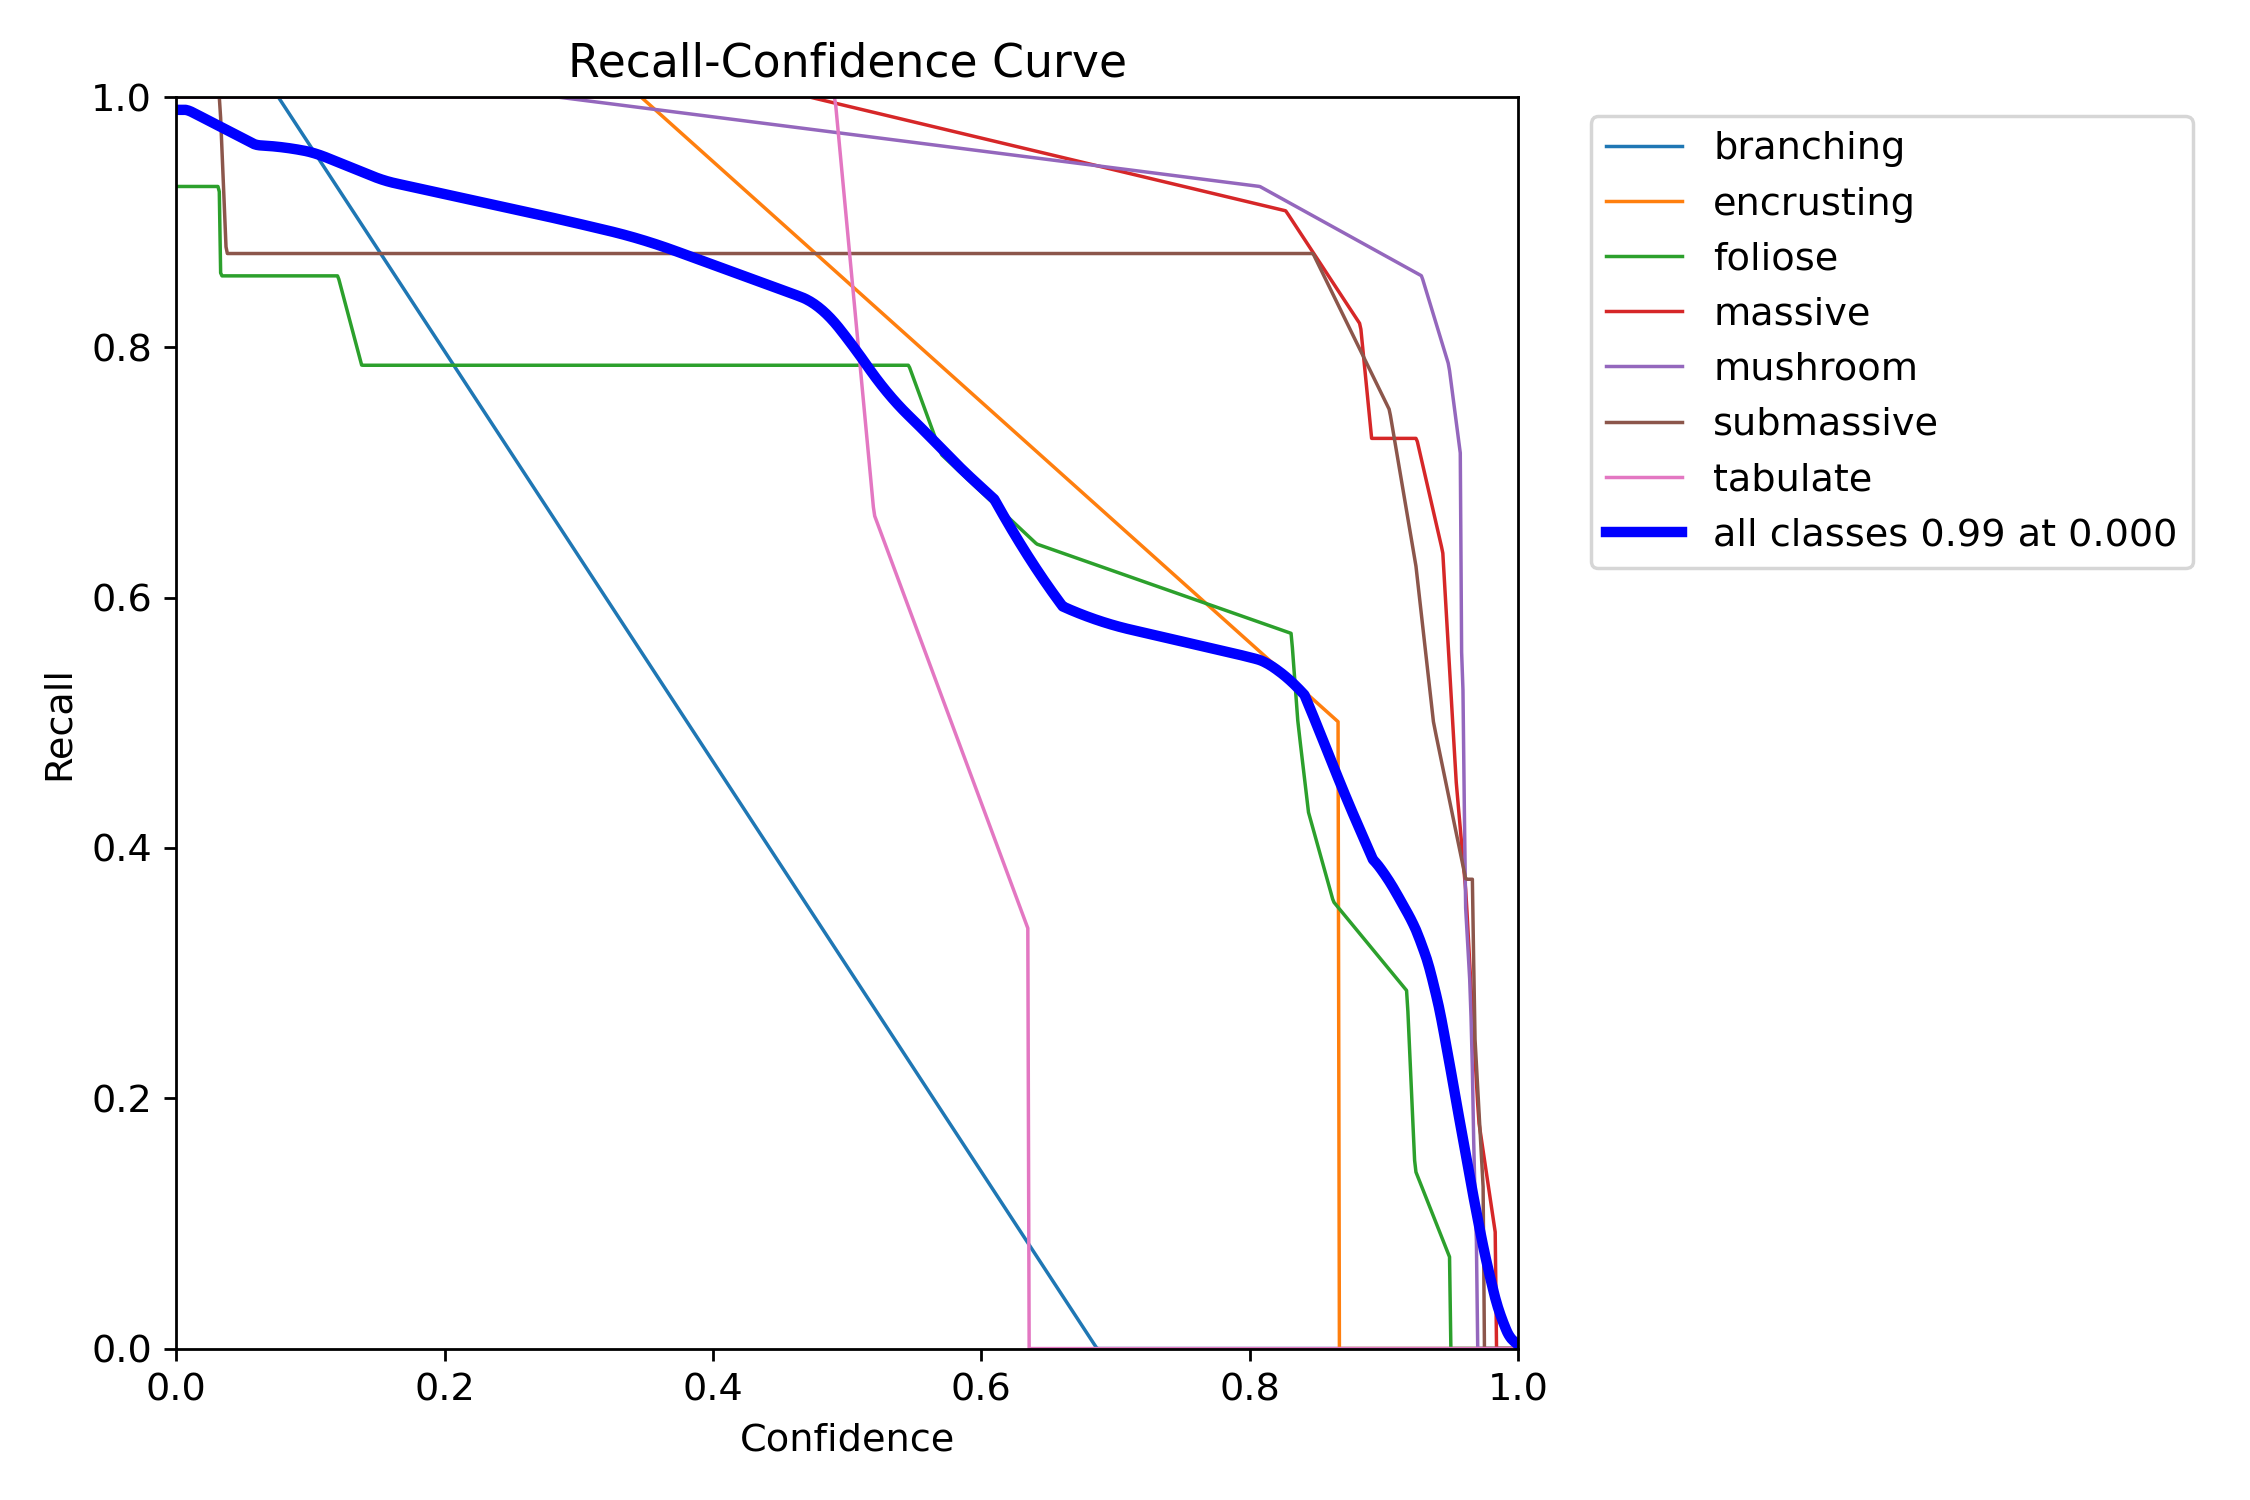

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/val/BoxR_curve.png', width=600)

/content


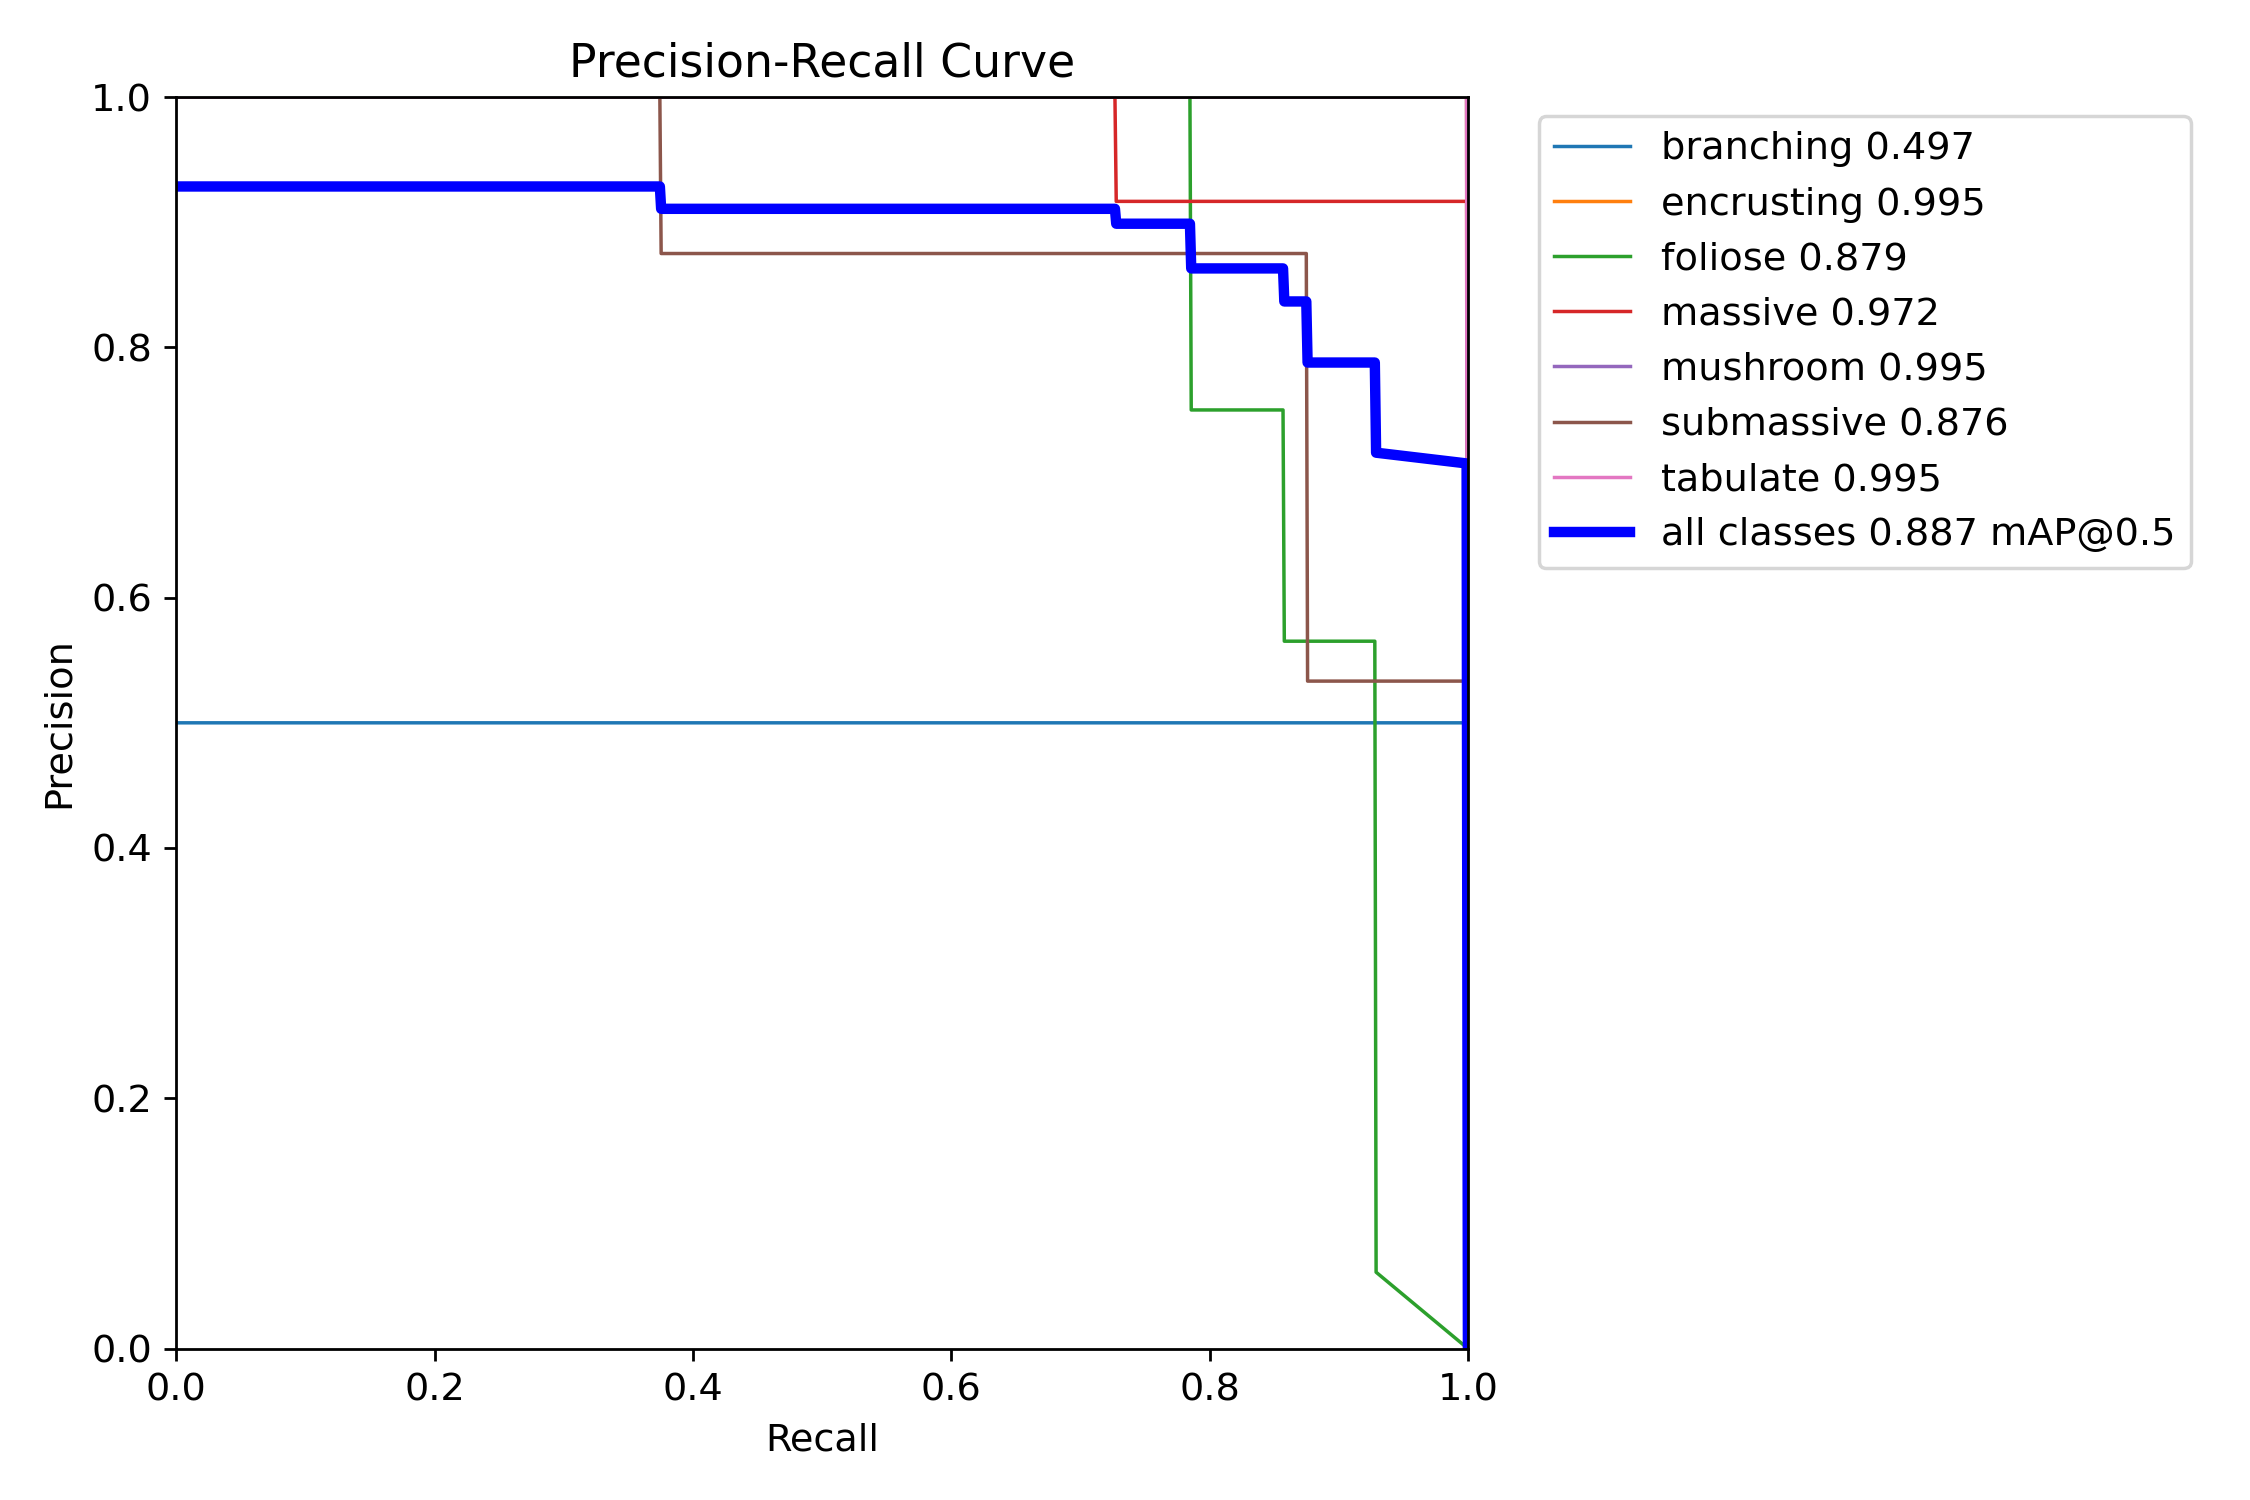

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/val/BoxPR_curve.png', width=600)

/content


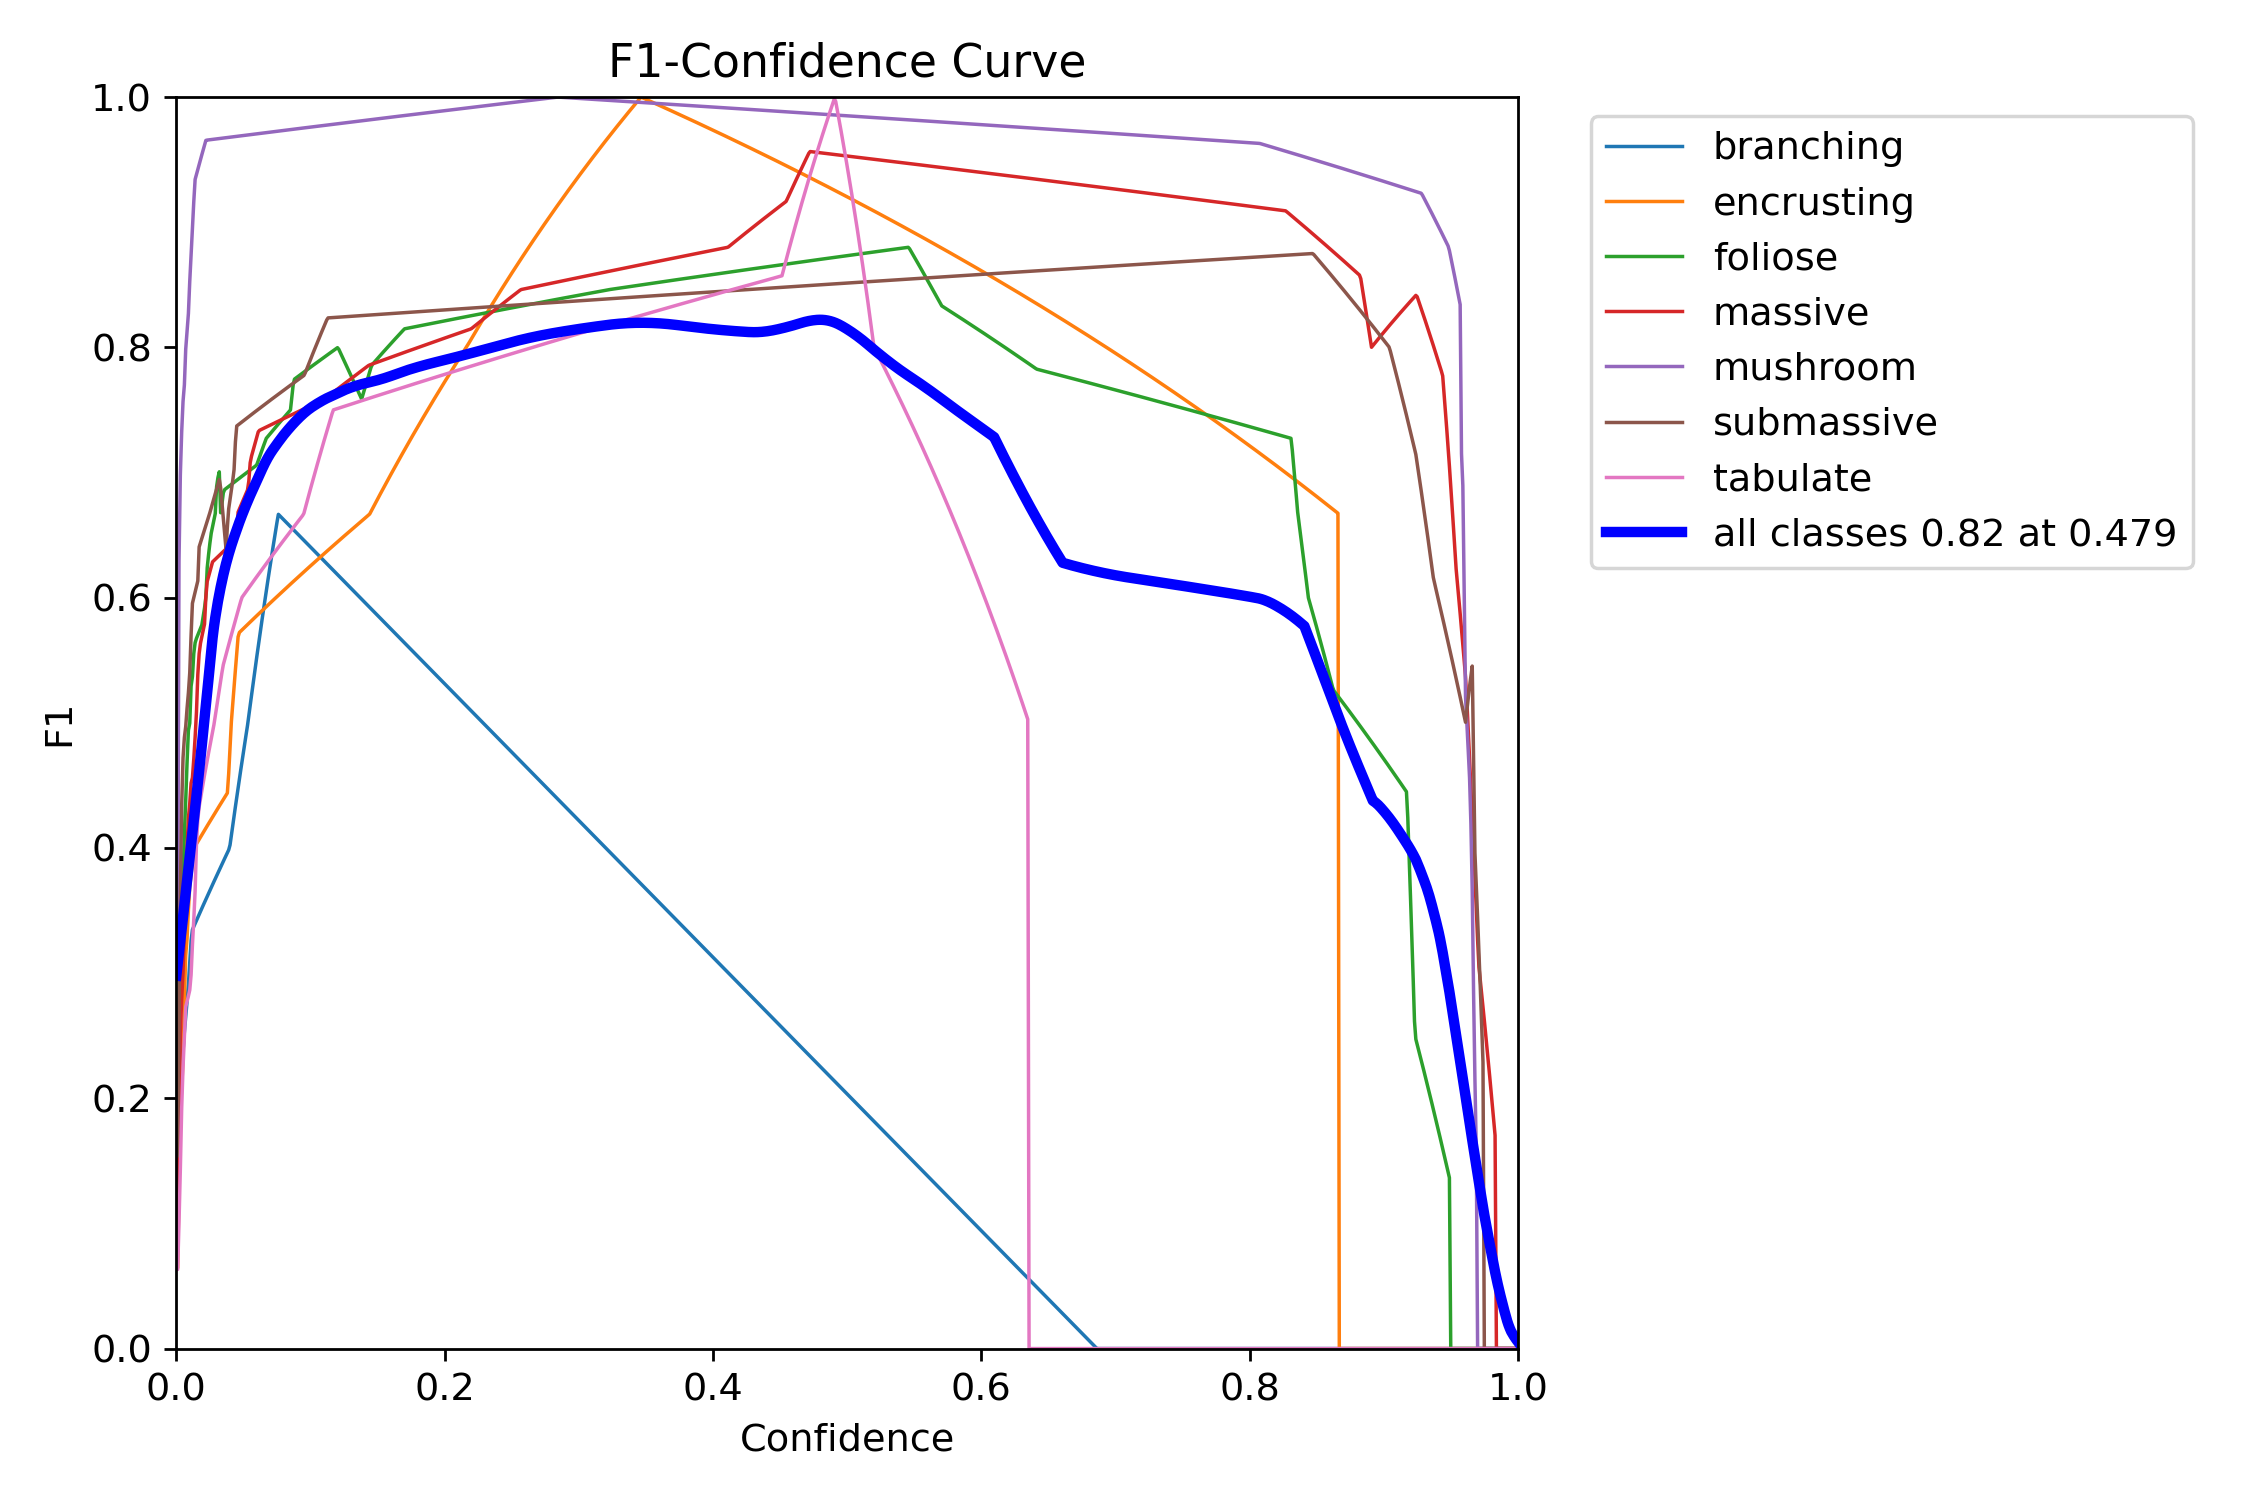

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/val/MaskF1_curve.png', width=600)

/content


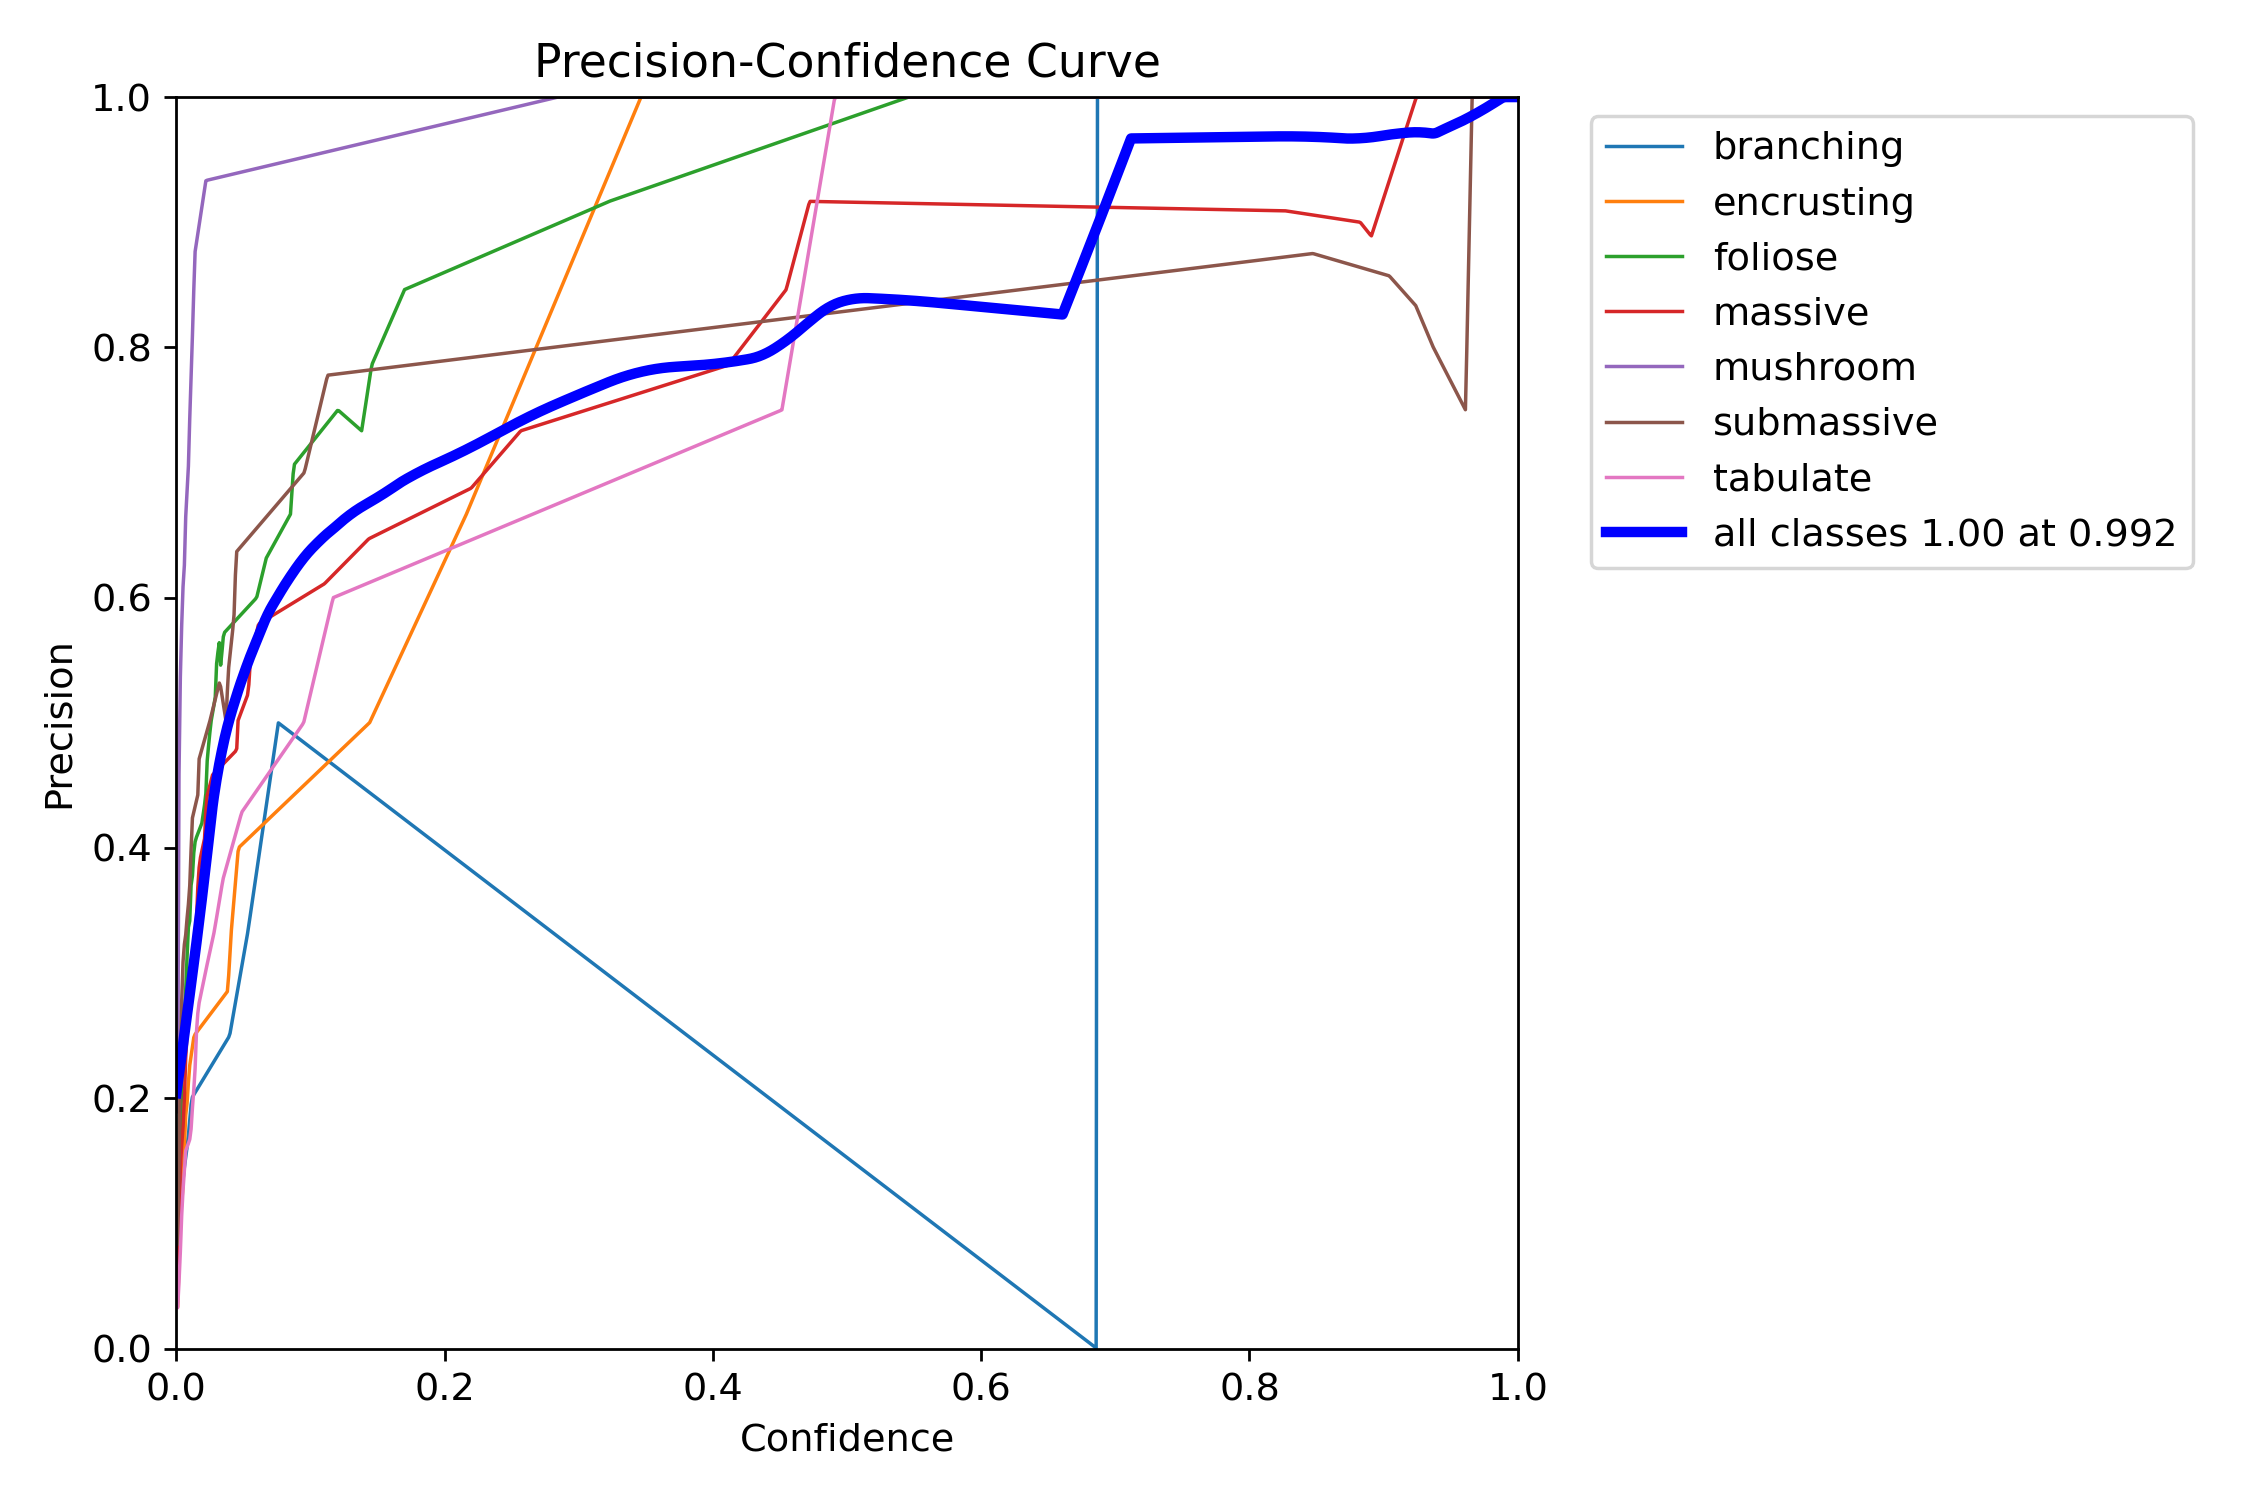

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/val/MaskP_curve.png', width=600)

/content


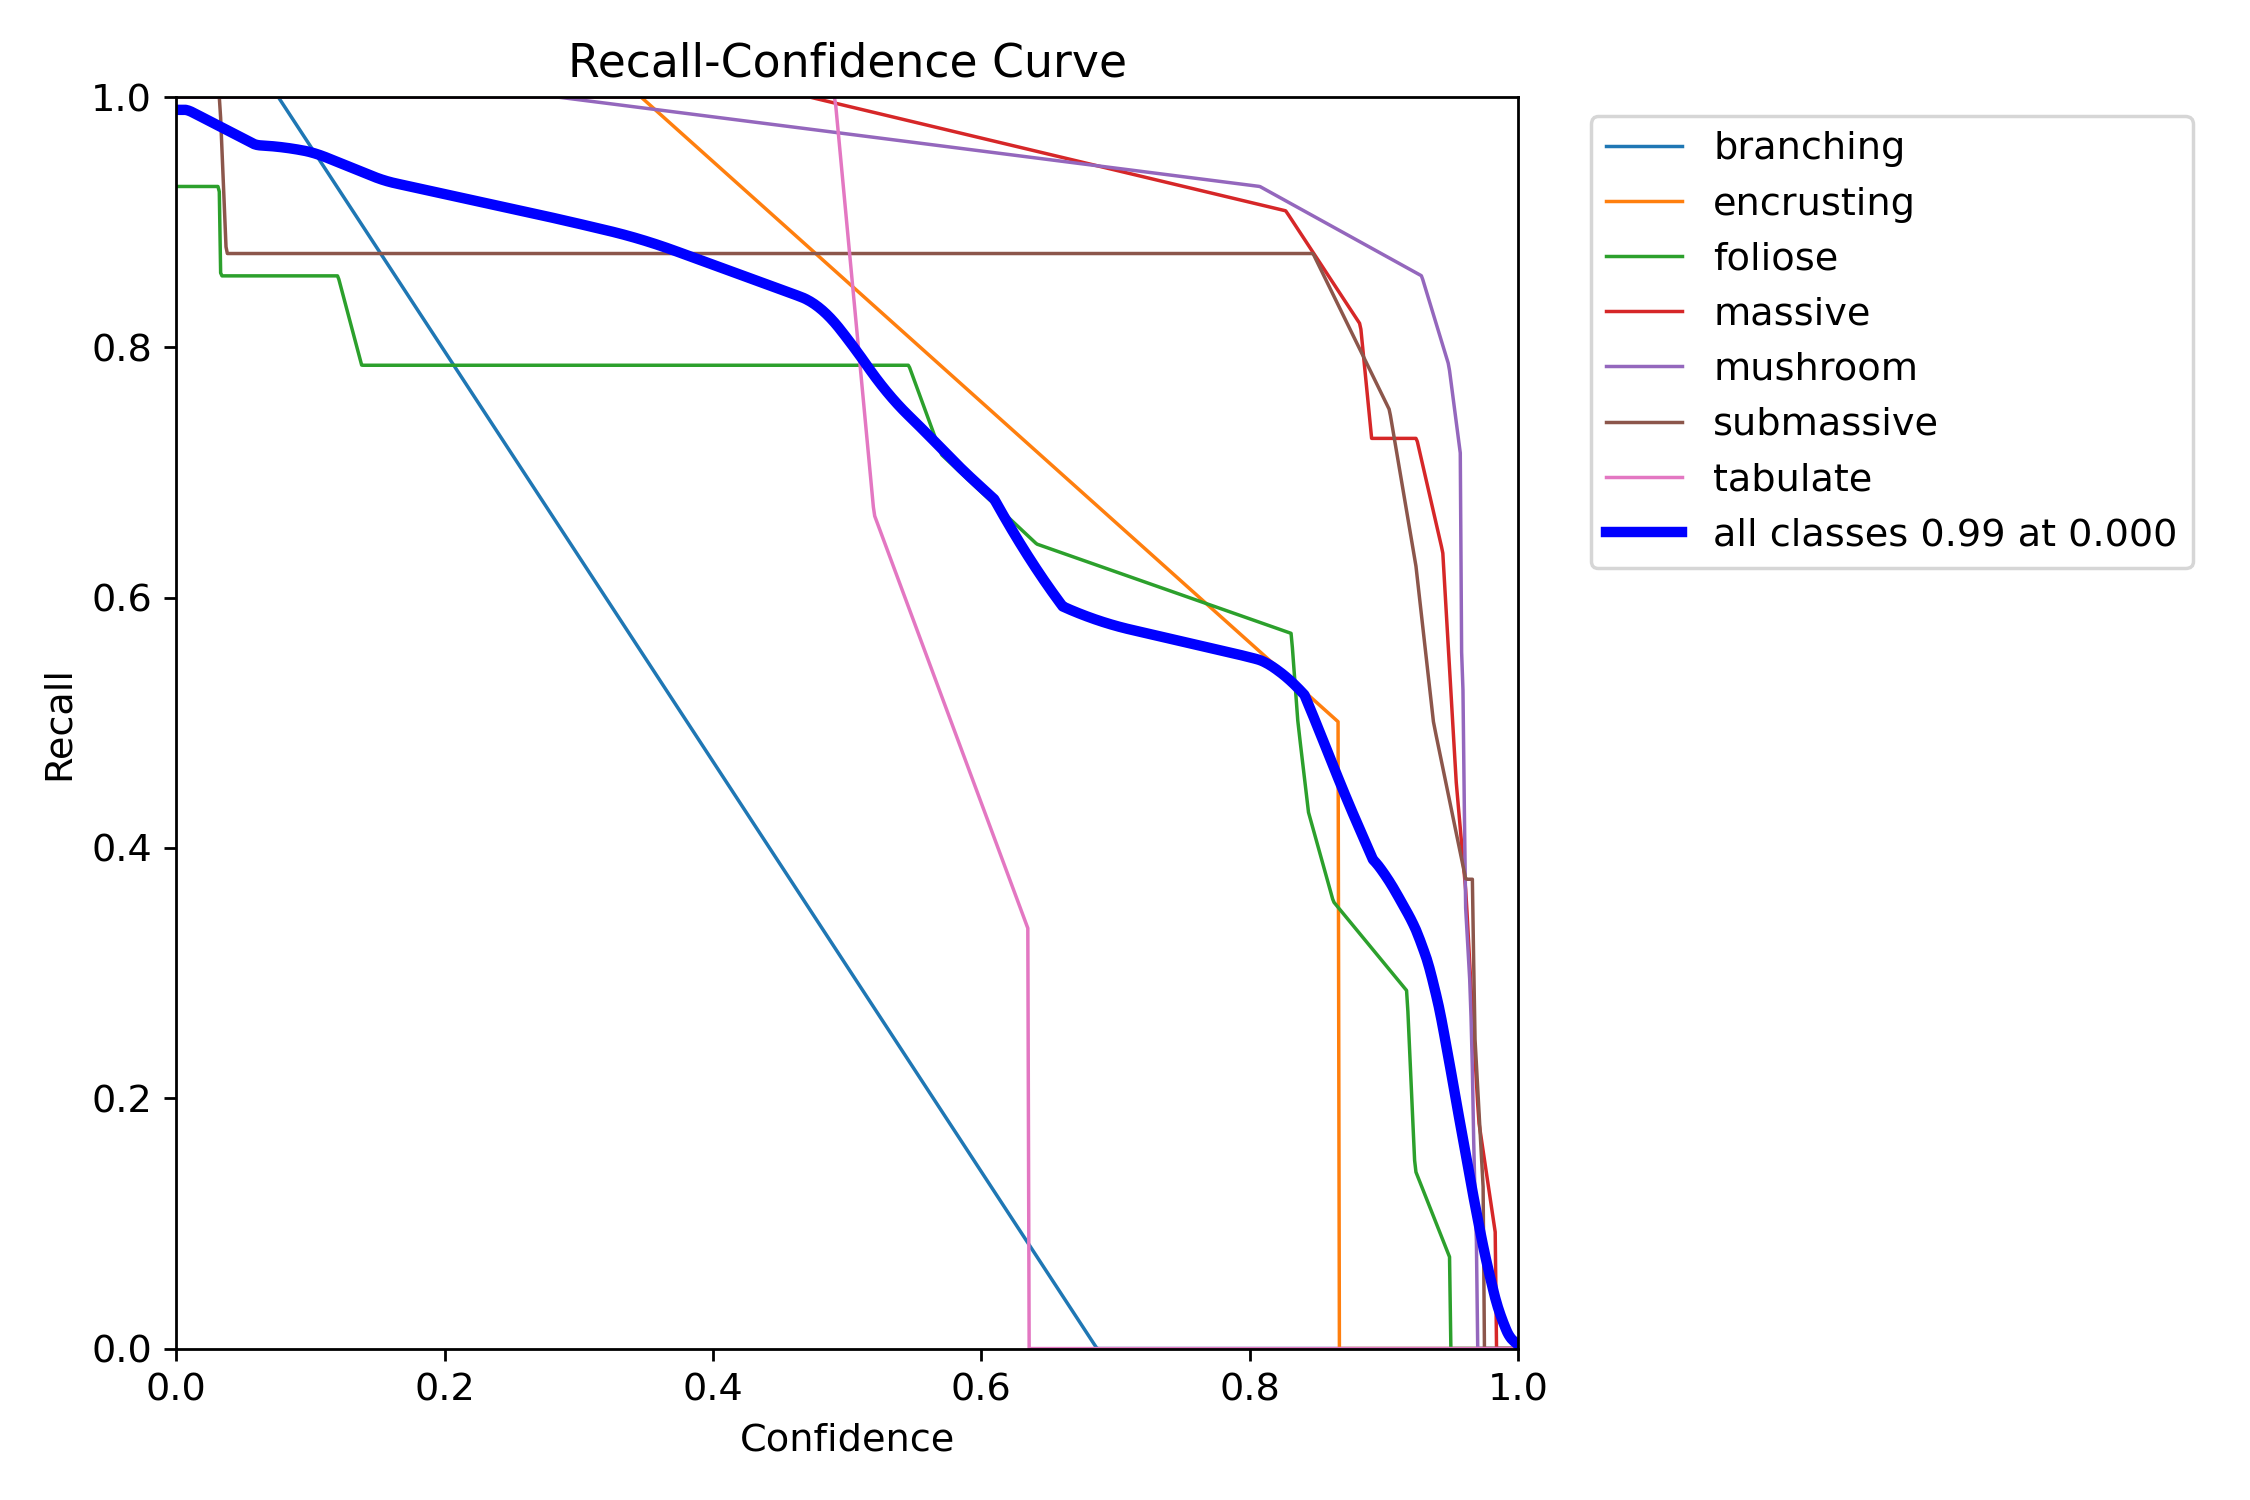

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/val/MaskR_curve.png', width=600)

/content


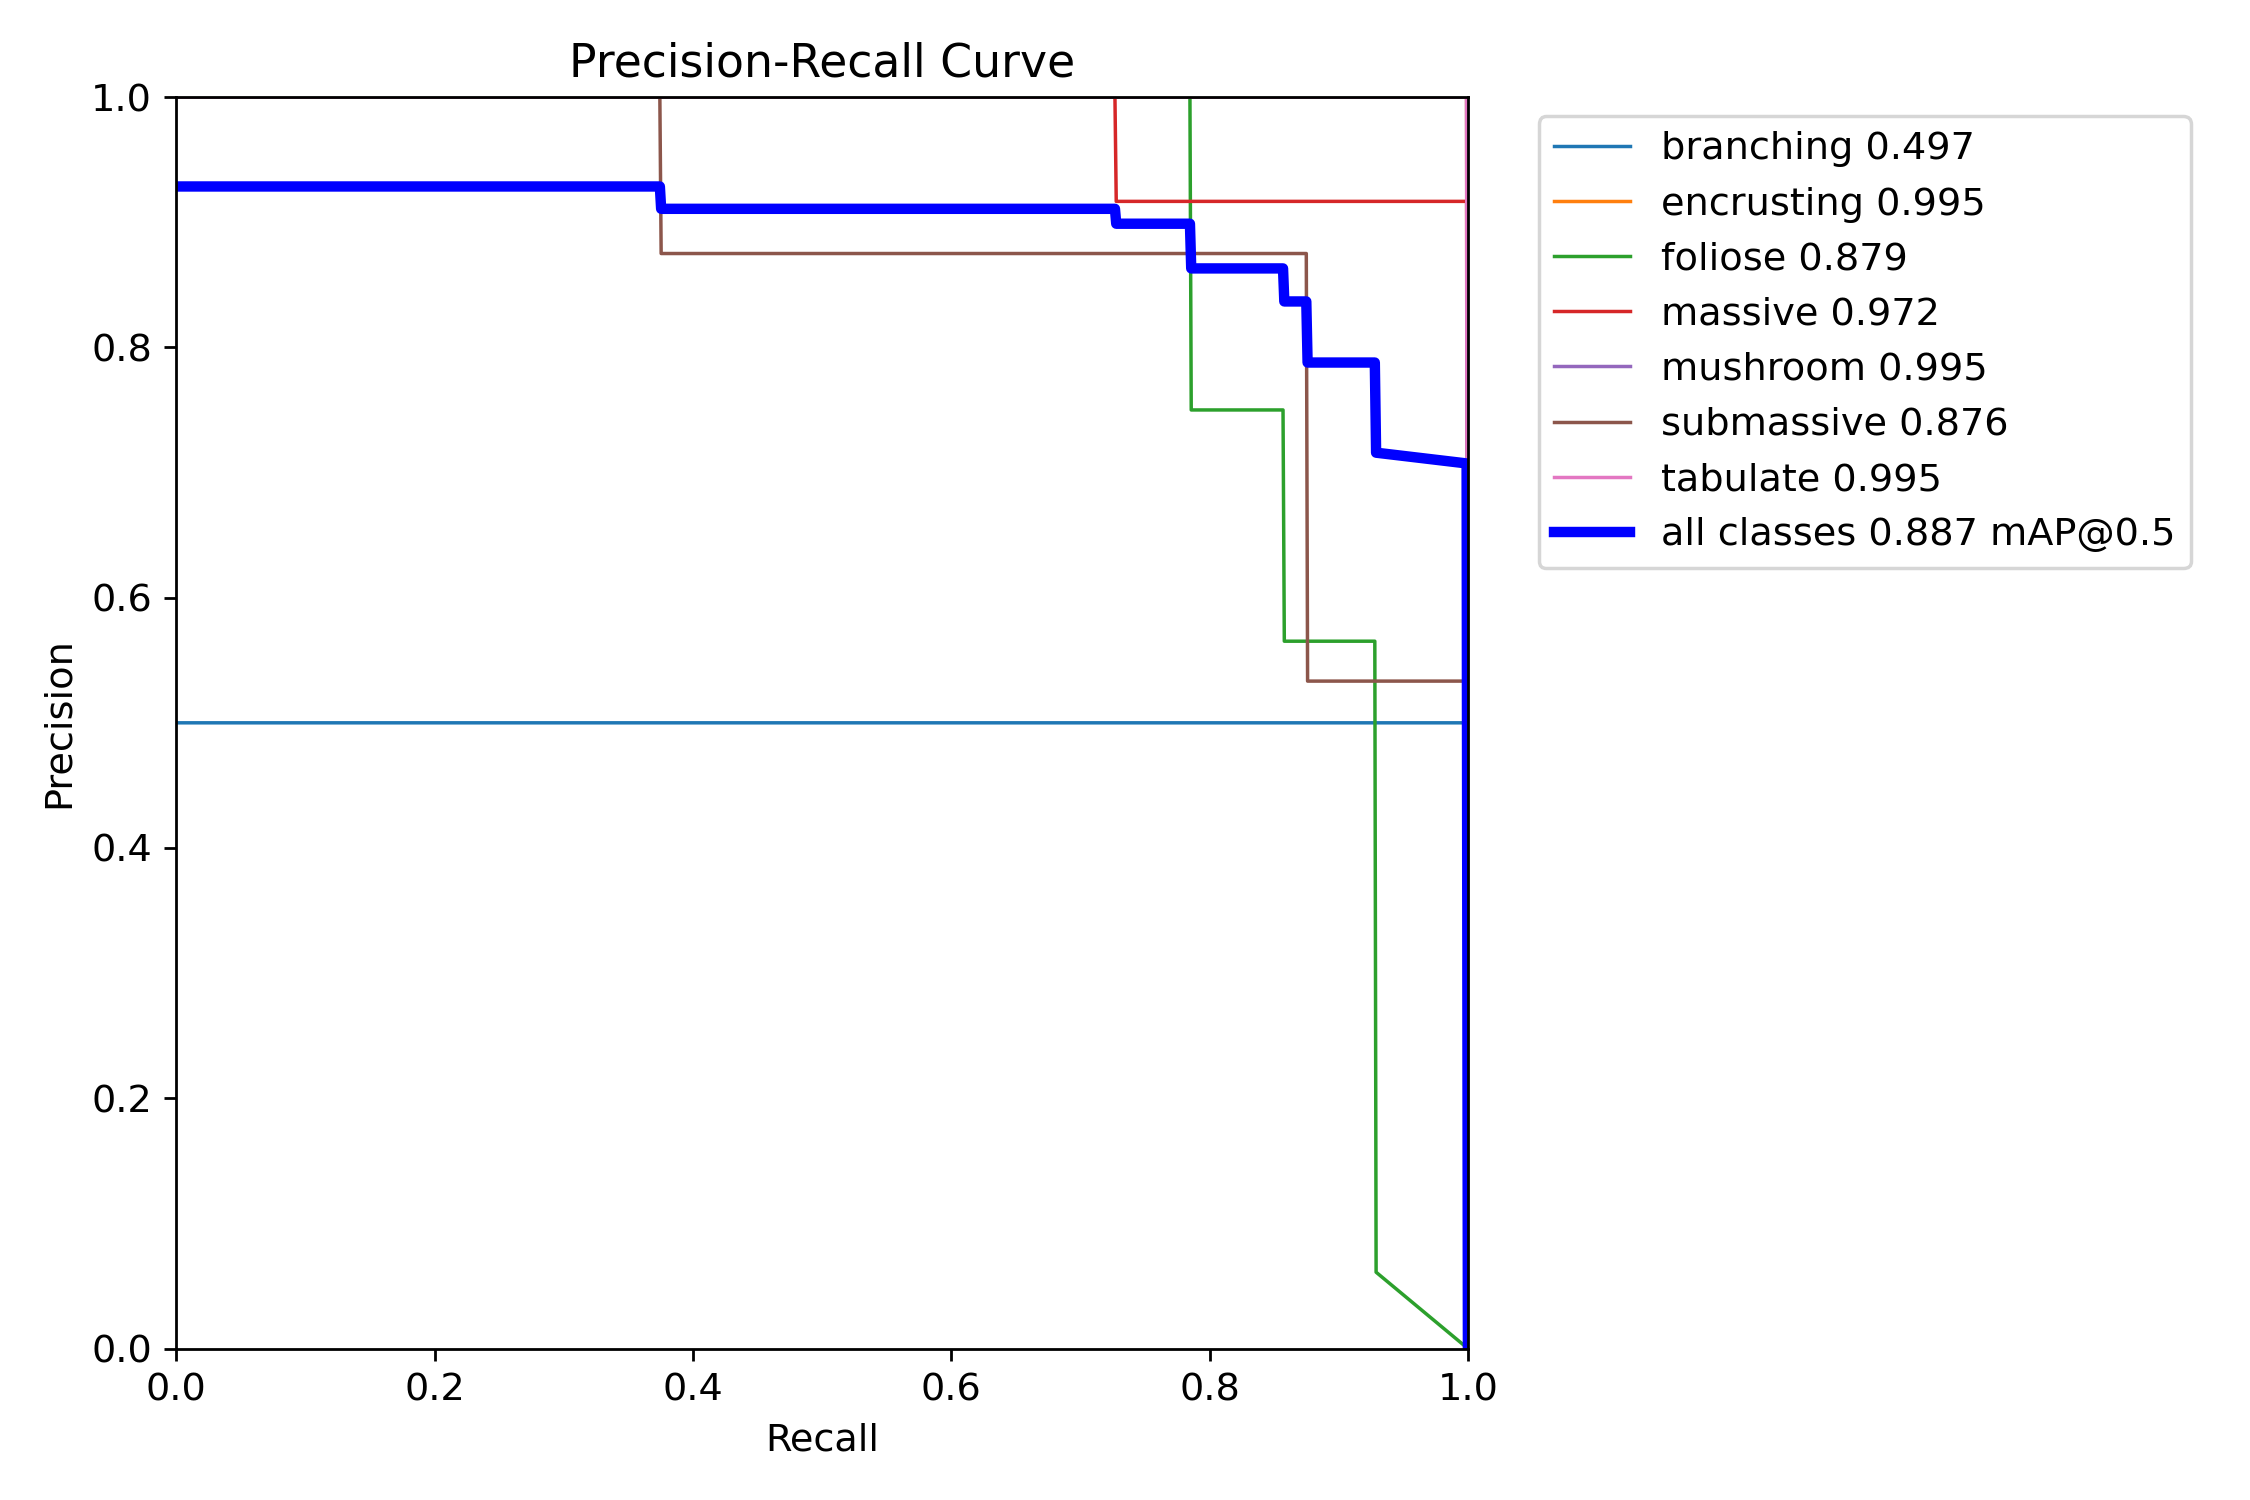

In [31]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/val/MaskPR_curve.png', width=600)

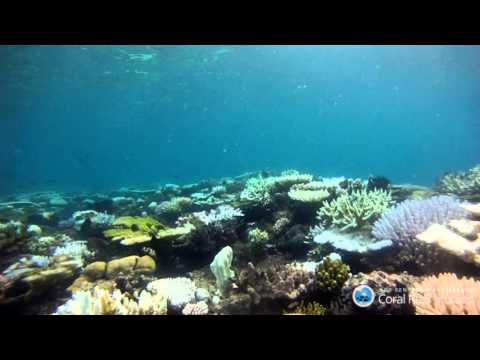

In [33]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("RRxBtL35MuU", width=500)
display(video)

In [35]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train2/weights/best.pt conf=0.25 source=/content/coralsss.mp4 save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27226437 parameters, 0 gradients, 110.0 GFLOPs

video 1/1 (1/329) /content/coralsss.mp4: 384x640 1 tabulate, 97.5ms
video 1/1 (2/329) /content/coralsss.mp4: 384x640 2 tabulates, 30.8ms
video 1/1 (3/329) /content/coralsss.mp4: 384x640 2 tabulates, 30.7ms
video 1/1 (4/329) /content/coralsss.mp4: 384x640 2 tabulates, 30.7ms
video 1/1 (5/329) /content/coralsss.mp4: 384x640 1 tabulate, 30.8ms
video 1/1 (6/329) /content/coralsss.mp4: 384x640 1 tabulate, 30.8ms
video 1/1 (7/329) /content/coralsss.mp4: 384x640 2 tabulates, 20.7ms
video 1/1 (8/329) /content/coralsss.mp4: 384x640 2 tabulates, 20.7ms
video 1/1 (9/329) /content/coralsss.mp4: 384x640 1 tabulate, 20.7ms
video 1/1 (10/329) /content/coralsss.mp4: 384x640 (no detections), 20.7ms
video 1/1 (11/329) /content/coralsss.mp4: 384x640 1 tabulate, 20.7ms
video 1/1 (12/329) /content/coralsss.mp4: 384x640 1 ta

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")